<a href="https://colab.research.google.com/github/syedsajidhussain/Tract-segmentation/blob/main/draw_diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

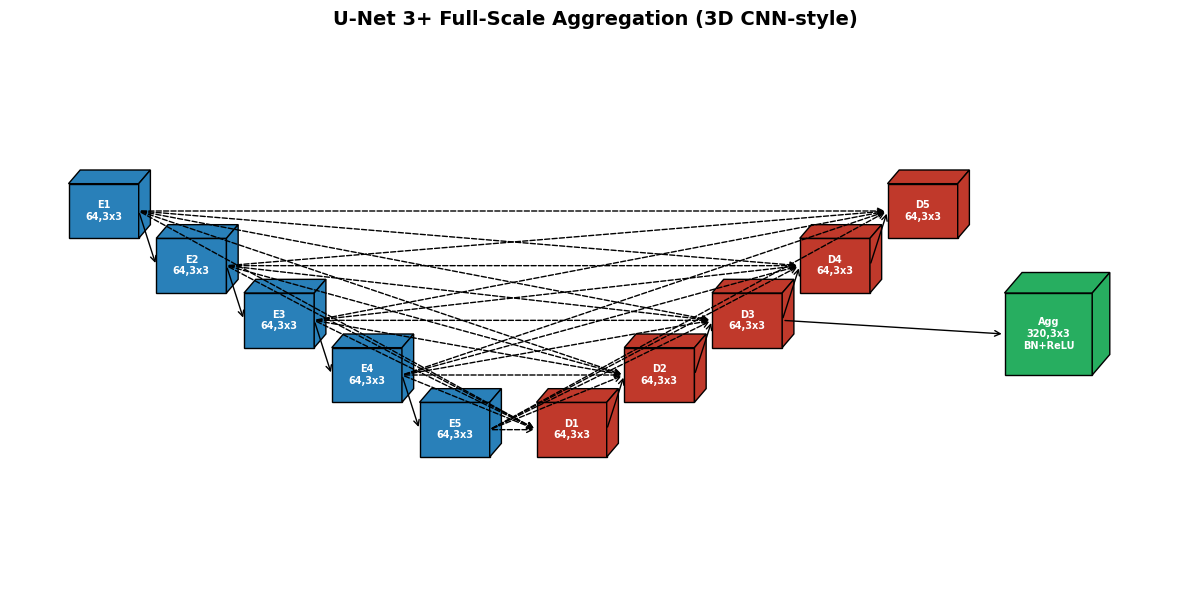

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Rectangle

def draw_3d_block(ax, x, y, w, h, depth=0.2, color="#1f77b4", label=""):
    # front face
    front = Rectangle((x, y), w, h, facecolor=color, edgecolor="black", lw=1)
    ax.add_patch(front)
    # top face
    ax.add_patch(plt.Polygon([[x,y+h],[x+depth,y+h+depth],[x+w+depth,y+h+depth],[x+w,y+h]],
                              closed=True, facecolor=color, edgecolor="black"))
    # side face
    ax.add_patch(plt.Polygon([[x+w,y],[x+w+depth,y+depth],[x+w+depth,y+h+depth],[x+w,y+h]],
                              closed=True, facecolor=color, edgecolor="black"))
    # label
    ax.text(x+w/2, y+h/2, label, ha="center", va="center", fontsize=7, color="white", weight="bold")

def draw_arrow(ax, start, end, style="-"):
    ax.add_patch(FancyArrowPatch(start, end, arrowstyle="->",
                                 mutation_scale=10, lw=1, linestyle=style))

# Create figure
fig, ax = plt.subplots(figsize=(12,6))

# Encoder blocks
enc_positions = [(0,4),(1.5,3.2),(3,2.4),(4.5,1.6),(6,0.8)]
for i,(x,y) in enumerate(enc_positions):
    draw_3d_block(ax, x, y, 1.2, 0.8, depth=0.2, color="#2980B9", label=f"E{i+1}\n64,3x3")

# Decoder blocks
dec_positions = [(8,0.8),(9.5,1.6),(11,2.4),(12.5,3.2),(14,4)]
for i,(x,y) in enumerate(dec_positions):
    draw_3d_block(ax, x, y, 1.2, 0.8, depth=0.2, color="#C0392B", label=f"D{i+1}\n64,3x3")

# Aggregation block
draw_3d_block(ax, 16, 2, 1.5, 1.2, depth=0.3, color="#27AE60", label="Agg\n320,3x3\nBN+ReLU")

# Arrows (main flow)
for (x1,y1),(x2,y2) in zip(enc_positions, enc_positions[1:]):
    draw_arrow(ax,(x1+1.2,y1+0.4),(x2,y2+0.4))
for (x1,y1),(x2,y2) in zip(dec_positions, dec_positions[1:]):
    draw_arrow(ax,(x1+1.2,y1+0.4),(x2,y2+0.4))

# Skip connections (dashed)
for (x1,y1) in enc_positions:
    for (x2,y2) in dec_positions:
        draw_arrow(ax,(x1+1.2,y1+0.4),(x2,y2+0.4),style="--")

# Final arrow to aggregation
draw_arrow(ax,(dec_positions[2][0]+1.2,dec_positions[2][1]+0.4),(16,2.6))

ax.set_xlim(-1,19)
ax.set_ylim(-1,7)
ax.axis("off")
plt.title("U-Net 3+ Full-Scale Aggregation (3D CNN-style)", fontsize=14, weight="bold")
plt.tight_layout()

# Save PNG
plt.savefig("unet3p_fig2.png", dpi=300)
plt.show()


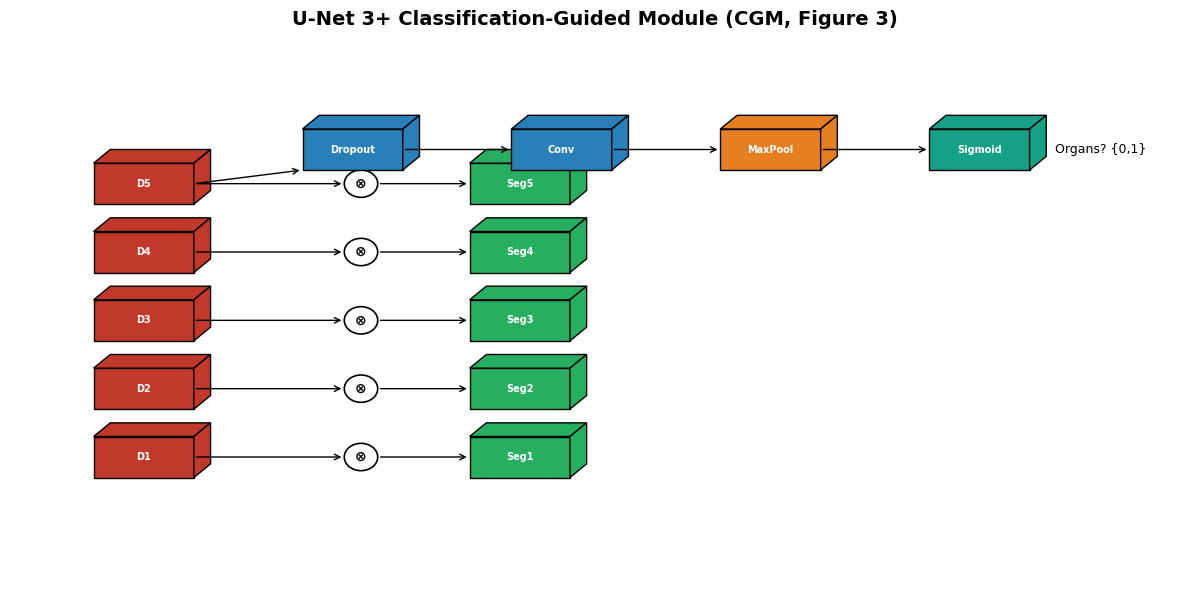

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Rectangle, Circle

def draw_3d_block(ax, x, y, w, h, depth=0.2, color="#1f77b4", label=""):
    front = Rectangle((x, y), w, h, facecolor=color, edgecolor="black", lw=1)
    ax.add_patch(front)
    ax.add_patch(plt.Polygon([[x,y+h],[x+depth,y+h+depth],[x+w+depth,y+h+depth],[x+w,y+h]],
                              closed=True, facecolor=color, edgecolor="black"))
    ax.add_patch(plt.Polygon([[x+w,y],[x+w+depth,y+depth],[x+w+depth,y+h+depth],[x+w,y+h]],
                              closed=True, facecolor=color, edgecolor="black"))
    ax.text(x+w/2, y+h/2, label, ha="center", va="center", fontsize=7, color="white", weight="bold")

def draw_arrow(ax, start, end, style="-"):
    ax.add_patch(FancyArrowPatch(start, end, arrowstyle="->",
                                 mutation_scale=10, lw=1, linestyle=style))

def draw_gate(ax, x, y):
    circ = Circle((x,y), 0.2, facecolor="white", edgecolor="black", lw=1.2)
    ax.add_patch(circ)
    ax.text(x, y, "⊗", ha="center", va="center", fontsize=10, weight="bold")

# Create figure
fig, ax = plt.subplots(figsize=(12,6))

# Decoder side outputs
dec_y_positions = [0.5, 1.5, 2.5, 3.5, 4.5]
for i,y in enumerate(dec_y_positions):
    draw_3d_block(ax, 0, y, 1.2, 0.6, depth=0.2, color="#C0392B", label=f"D{i+1}")

    # arrows to segmentation output
    draw_arrow(ax, (1.2,y+0.3), (3,y+0.3))
    # gate multiplication
    draw_gate(ax, 3.2, y+0.3)
    draw_arrow(ax, (3.4,y+0.3), (4.5,y+0.3))
    # segmentation outputs
    draw_3d_block(ax, 4.5, y, 1.2, 0.6, depth=0.2, color="#27AE60", label=f"Seg{i+1}")

# Classification branch (from deepest decoder feature)
draw_arrow(ax, (1.2, dec_y_positions[-1]+0.3), (2.5, 5))
draw_3d_block(ax, 2.5, 5, 1.2, 0.6, depth=0.2, color="#2980B9", label="Dropout")
draw_arrow(ax, (3.7,5.3), (5,5.3))
draw_3d_block(ax, 5, 5, 1.2, 0.6, depth=0.2, color="#2980B9", label="Conv")
draw_arrow(ax, (6.2,5.3), (7.5,5.3))
draw_3d_block(ax, 7.5, 5, 1.2, 0.6, depth=0.2, color="#E67E22", label="MaxPool")
draw_arrow(ax, (8.7,5.3), (10,5.3))
draw_3d_block(ax, 10, 5, 1.2, 0.6, depth=0.2, color="#16A085", label="Sigmoid")

# Classification output
ax.text(11.5, 5.3, "Organs? {0,1}", fontsize=9, va="center")

ax.set_xlim(-1,13)
ax.set_ylim(-1,7)
ax.axis("off")
plt.title("U-Net 3+ Classification-Guided Module (CGM, Figure 3)", fontsize=14, weight="bold")
plt.tight_layout()

# Save PNG
plt.savefig("unet3p_fig3.png", dpi=300)
plt.show()


In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Rectangle, Circle

# ===== Helper functions =====
def draw_3d_block(ax, x, y, w, h, depth=0.2, color="#1f77b4", label=""):
    # front face
    front = Rectangle((x, y), w, h, facecolor=color, edgecolor="black", lw=1)
    ax.add_patch(front)
    # top face
    ax.add_patch(plt.Polygon([[x,y+h],[x+depth,y+h+depth],[x+w+depth,y+h+depth],[x+w,y+h]],
                              closed=True, facecolor=color, edgecolor="black"))
    # side face
    ax.add_patch(plt.Polygon([[x+w,y],[x+w+depth,y+depth],[x+w+depth,y+h+depth],[x+w,y+h]],
                              closed=True, facecolor=color, edgecolor="black"))
    # label
    ax.text(x+w/2, y+h/2, label, ha="center", va="center", fontsize=7, color="white", weight="bold")

def draw_arrow(ax, start, end, style="-"):
    ax.add_patch(FancyArrowPatch(start, end, arrowstyle="->",
                                 mutation_scale=10, lw=1, linestyle=style))

def draw_gate(ax, x, y):
    circ = Circle((x,y), 0.2, facecolor="white", edgecolor="black", lw=1.2)
    ax.add_patch(circ)
    ax.text(x, y, "⊗", ha="center", va="center", fontsize=10, weight="bold")

# ===== Figure 2: U-Net 3+ Full-Scale Aggregation =====
fig, ax = plt.subplots(figsize=(12,6))

# Encoder blocks
enc_positions = [(0,4),(1.5,3.2),(3,2.4),(4.5,1.6),(6,0.8)]
for i,(x,y) in enumerate(enc_positions):
    draw_3d_block(ax, x, y, 1.2, 0.8, depth=0.2, color="#2980B9", label=f"E{i+1}\n64,3x3")

# Decoder blocks
dec_positions = [(8,0.8),(9.5,1.6),(11,2.4),(12.5,3.2),(14,4)]
for i,(x,y) in enumerate(dec_positions):
    draw_3d_block(ax, x, y, 1.2, 0.8, depth=0.2, color="#C0392B", label=f"D{i+1}\n64,3x3")

# Aggregation block
draw_3d_block(ax, 16, 2, 1.5, 1.2, depth=0.3, color="#27AE60", label="Agg\n320,3x3\nBN+ReLU")

# Arrows (main flow)
for (x1,y1),(x2,y2) in zip(enc_positions, enc_positions[1:]):
    draw_arrow(ax,(x1+1.2,y1+0.4),(x2,y2+0.4))
for (x1,y1),(x2,y2) in zip(dec_positions, dec_positions[1:]):
    draw_arrow(ax,(x1+1.2,y1+0.4),(x2,y2+0.4))

# Skip connections (dashed)
for (x1,y1) in enc_positions:
    for (x2,y2) in dec_positions:
        draw_arrow(ax,(x1+1.2,y1+0.4),(x2,y2+0.4),style="--")

# Final arrow to aggregation
draw_arrow(ax,(dec_positions[2][0]+1.2,dec_positions[2][1]+0.4),(16,2.6))

ax.set_xlim(-1,19)
ax.set_ylim(-1,7)
ax.axis("off")
plt.title("U-Net 3+ Full-Scale Aggregation (3D CNN-style, Fig. 2)", fontsize=14, weight="bold")
plt.tight_layout()
plt.savefig("unet3p_fig2.png", dpi=300)
plt.close()

# ===== Figure 3: U-Net 3+ Classification-Guided Module (CGM) =====
fig, ax = plt.subplots(figsize=(12,6))

# Decoder side outputs
dec_y_positions = [0.5, 1.5, 2.5, 3.5, 4.5]
for i,y in enumerate(dec_y_positions):
    draw_3d_block(ax, 0, y, 1.2, 0.6, depth=0.2, color="#C0392B", label=f"D{i+1}")

    # arrows to segmentation output
    draw_arrow(ax, (1.2,y+0.3), (3,y+0.3))
    # gate multiplication
    draw_gate(ax, 3.2, y+0.3)
    draw_arrow(ax, (3.4,y+0.3), (4.5,y+0.3))
    # segmentation outputs
    draw_3d_block(ax, 4.5, y, 1.2, 0.6, depth=0.2, color="#27AE60", label=f"Seg{i+1}")

# Classification branch (from deepest decoder feature)
draw_arrow(ax, (1.2, dec_y_positions[-1]+0.3), (2.5, 5))
draw_3d_block(ax, 2.5, 5, 1.2, 0.6, depth=0.2, color="#2980B9", label="Dropout")
draw_arrow(ax, (3.7,5.3), (5,5.3))
draw_3d_block(ax, 5, 5, 1.2, 0.6, depth=0.2, color="#2980B9", label="Conv")
draw_arrow(ax, (6.2,5.3), (7.5,5.3))
draw_3d_block(ax, 7.5, 5, 1.2, 0.6, depth=0.2, color="#E67E22", label="MaxPool")
draw_arrow(ax, (8.7,5.3), (10,5.3))
draw_3d_block(ax, 10, 5, 1.2, 0.6, depth=0.2, color="#16A085", label="Sigmoid")

# Classification output - Modified label for white matter tracts
ax.text(11.5, 5.3, "Tract Present? {0,1}", fontsize=9, va="center") # Changed label

ax.set_xlim(-1,13)
ax.set_ylim(-1,7)
ax.axis("off")
plt.title("U-Net 3+ Classification-Guided Module (CGM, Fig. 3 - TractSeg Adaptation)", fontsize=14, weight="bold") # Added adaptation note
plt.tight_layout()
plt.savefig("unet3p_fig3_tractseg.png", dpi=300) # Changed filename
plt.close()

print("✅ Figure 3 adapted for TractSeg saved as 'unet3p_fig3_tractseg.png'")
# Optionally regenerate Figure 2 as well if needed, but the request was only for Figure 3.
# If Figure 2 was also needed with modifications, add the code here.
# For now, only Figure 3 is modified and saved with a new name.

✅ Figure 3 adapted for TractSeg saved as 'unet3p_fig3_tractseg.png'


Figure 2: U-Net 3+ Full-Scale Aggregation


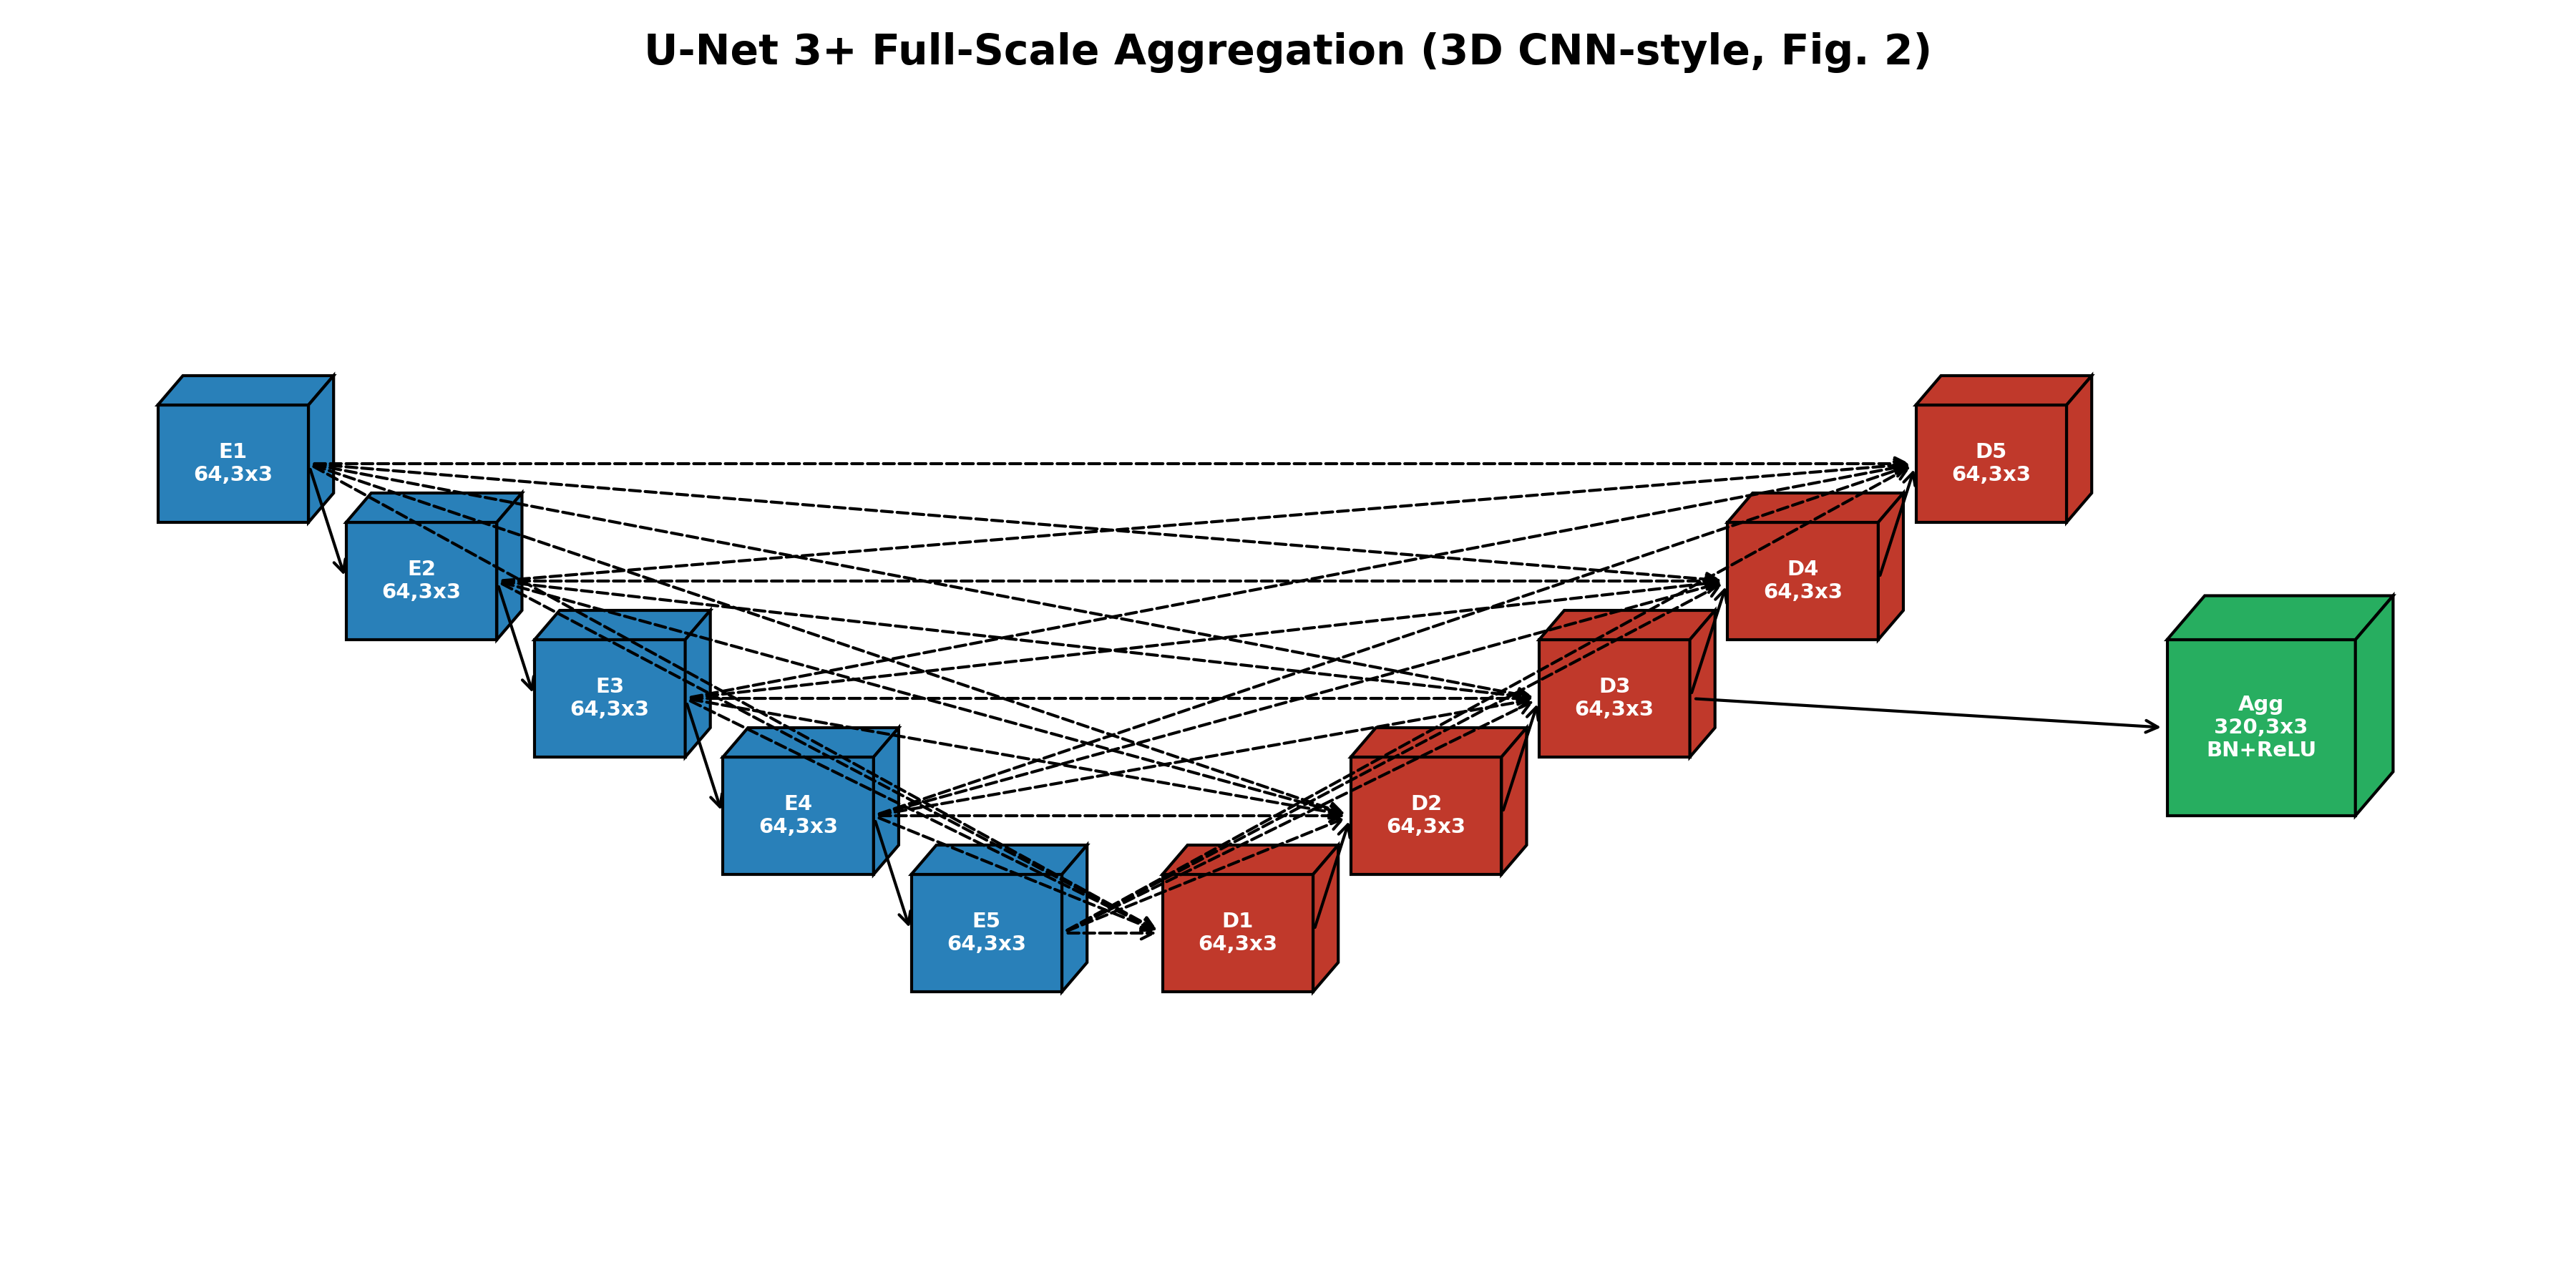


Figure 3: U-Net 3+ Classification-Guided Module (CGM)


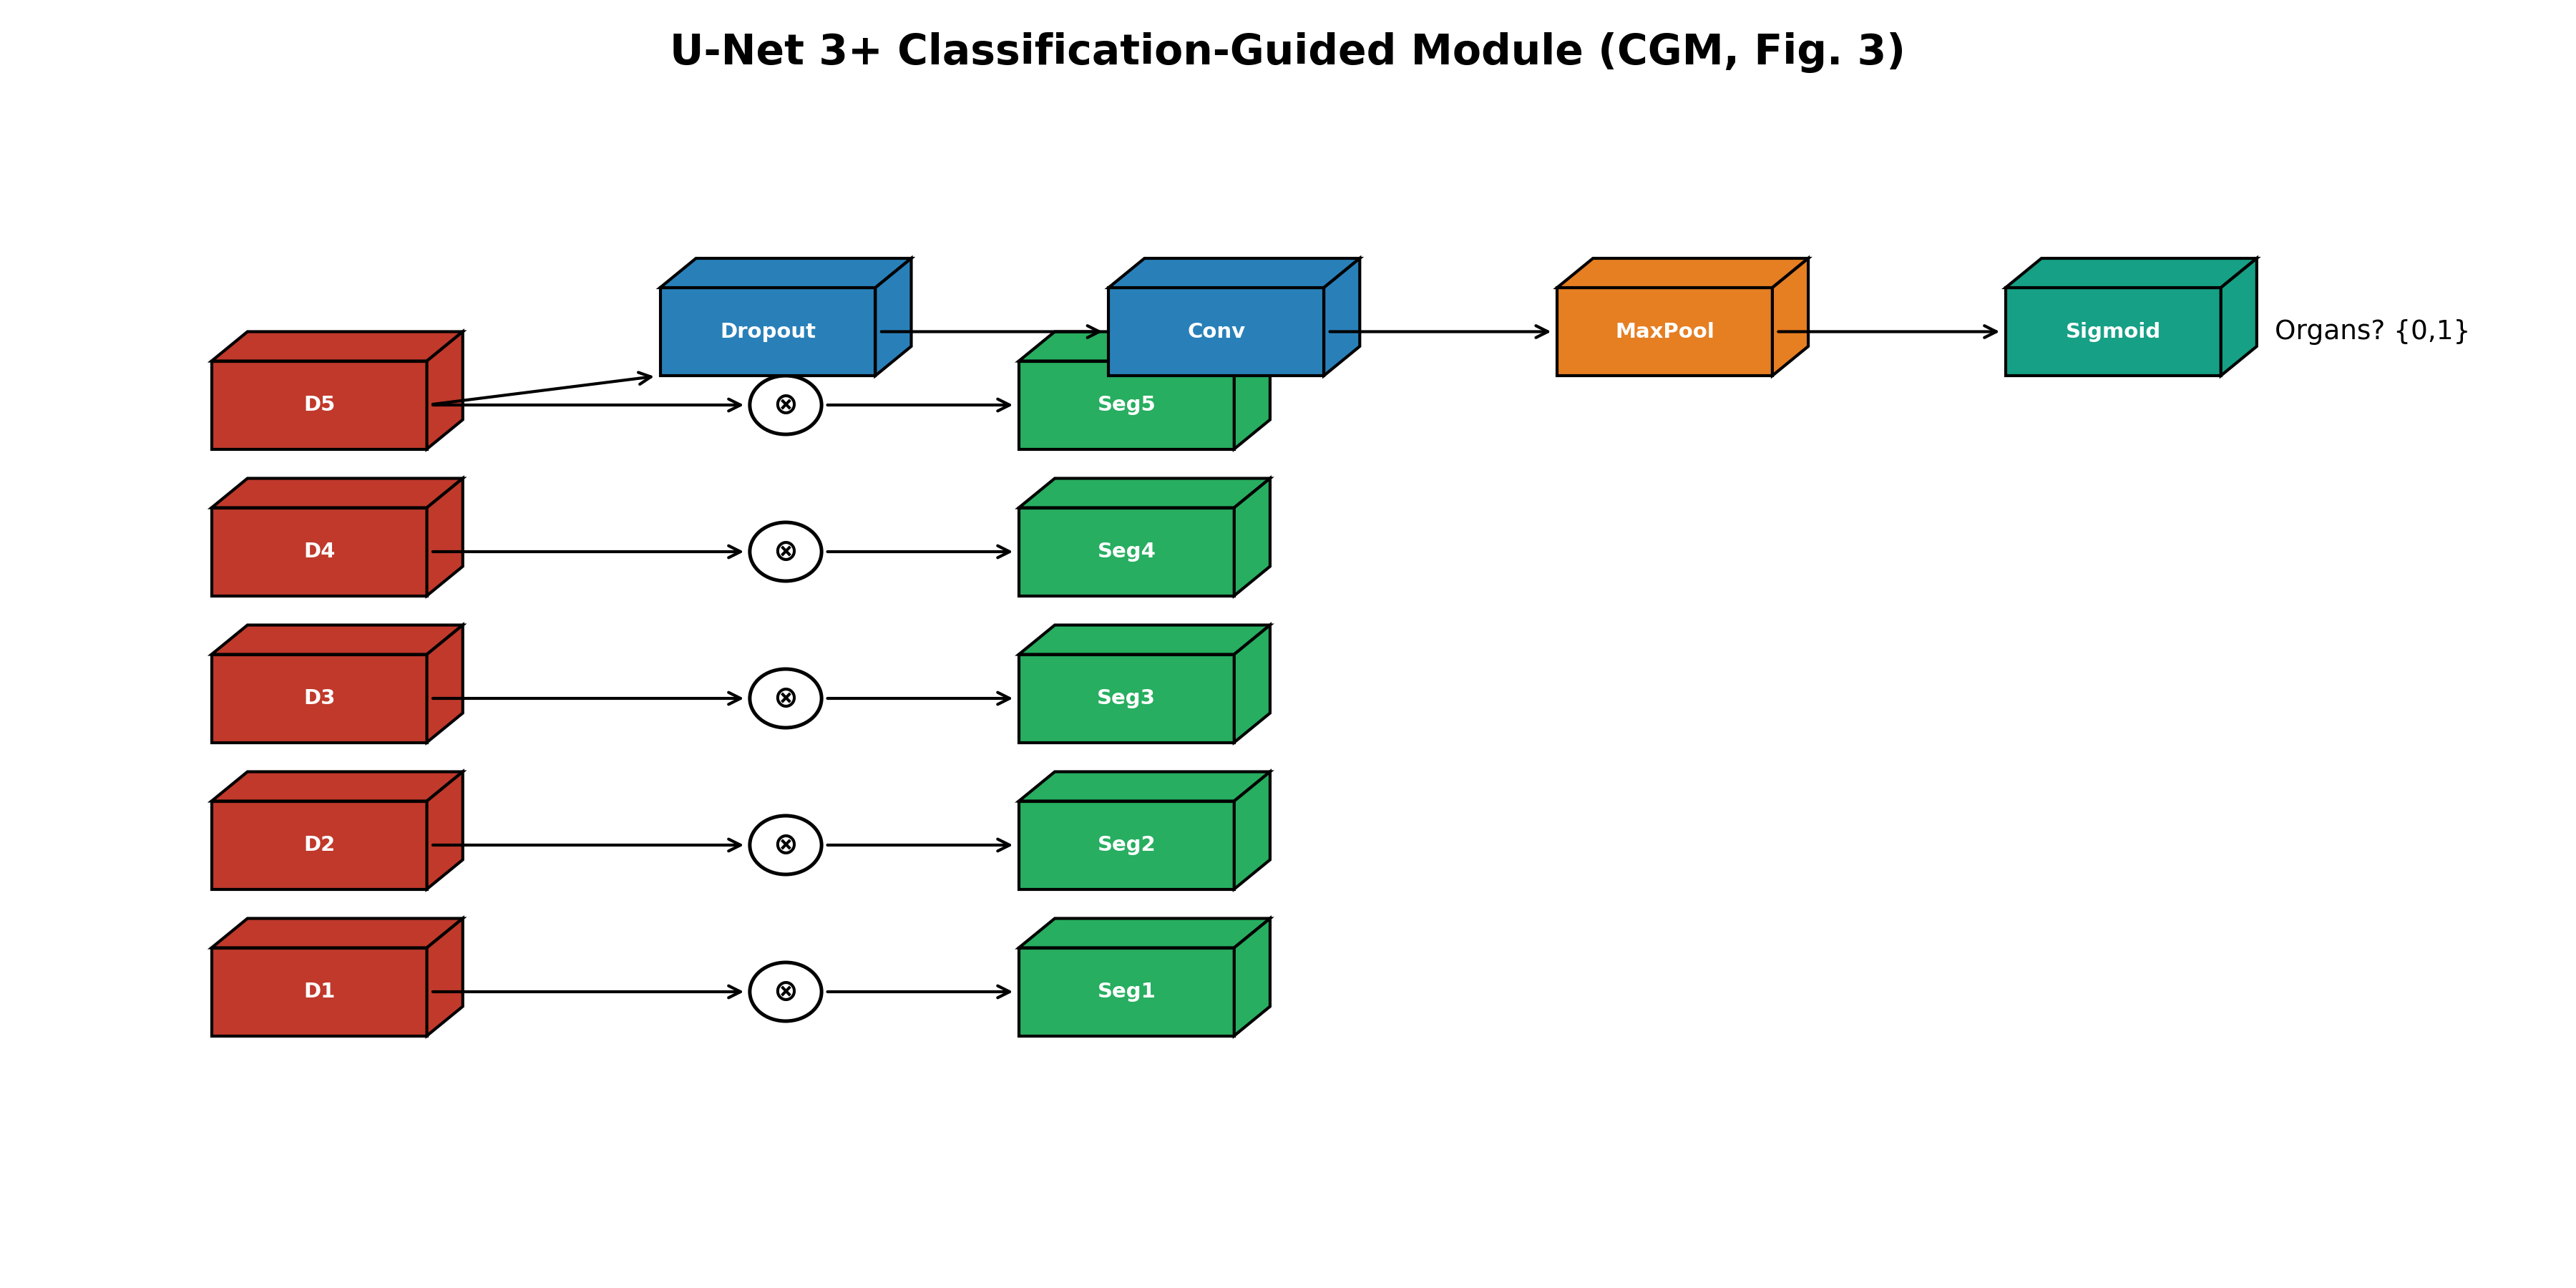

In [ ]:
from IPython.display import display, Image

print("Figure 2: U-Net 3+ Full-Scale Aggregation")
display(Image("unet3p_fig2.png"))

print("\nFigure 3: U-Net 3+ Classification-Guided Module (CGM)")
display(Image("unet3p_fig3.png"))

# Task
Implement a modified TractSeg model using the U-Net 3+ architecture for white matter tract segmentation on DWI MR images, incorporating data preparation, model implementation, adaptation of TractSeg components, training setup, evaluation, and inference. Use the provided files "/content/unet3p_fig3.png" and "/content/UNet_3_A_Full-Scale_Connected_UNet_for_Medical_Image_Segmentation.pdf" as references.

## Understand the tractseg paper

### Subtask:
Review the TractSeg paper to understand its data processing pipeline, network architecture (the original U-Net), loss functions, and training procedures.


## Data preparation

### Subtask:
Explain how to prepare your DWI MR images for input into the U-Net 3+ model. This may involve steps like data loading, preprocessing (e.g., normalization, resampling), and splitting into training, validation, and testing sets.


## Implement the u-net 3+ architecture

### Subtask:
Provide code for the U-Net 3+ model, incorporating the full-scale skip connections and the classification-guided module as described in the U-Net 3+ paper. We'll adapt it for 3D DWI data.


**Reasoning**:
Implement the U-Net 3+ architecture for 3D data, including the encoder, decoder with full-scale skip connections, and the classification-guided module, based on the provided figures and paper. This involves defining the convolutional blocks, the downsampling and upsampling steps, the concatenation of feature maps with appropriate resizing, and the structure of the CGM.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

def conv3d_block(inputs, filters, kernel_size=(3, 3, 3), activation='relu',
                 padding='same', strides=(1, 1, 1), use_batchnorm=True):
    """3D Convolutional Block."""
    x = layers.Conv3D(filters, kernel_size, padding=padding, strides=strides)(inputs)
    if use_batchnorm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    return x

def upsample_block(inputs, filters, size=(2, 2, 2)):
    """3D Upsampling block followed by convolution."""
    x = layers.UpSampling3D(size=size)(inputs)
    x = conv3d_block(x, filters, kernel_size=(1, 1, 1), use_batchnorm=False) # Use 1x1x1 conv after upsampling
    return x

def unet3plus_3d(input_shape=(None, 128, 128, 128, 6), num_classes=20):
    """
    U-Net 3+ architecture for 3D data.

    Args:
        input_shape: Tuple specifying the input shape (depth, height, width, channels).
                     Using None for the first dimension to allow variable batch size.
        num_classes: Number of output segmentation classes (tracts).

    Returns:
        A Keras Model representing the U-Net 3+ architecture.
    """
    inputs = layers.Input(shape=input_shape[1:]) # Exclude the batch dimension

    # Encoder
    e1 = conv3d_block(inputs, 64)
    e1_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e1)

    e2 = conv3d_block(e1_pool, 128)
    e2_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e2)

    e3 = conv3d_block(e2_pool, 256)
    e3_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e3)

    e4 = conv3d_block(e3_pool, 512)
    e4_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e4)

    e5 = conv3d_block(e4_pool, 1024) # Bottleneck

    # Decoder
    # D1: from E5, E4, E3, E2, E1
    d1_up = upsample_block(e5, 64, size=(16, 16, 16))
    d1_e4 = upsample_block(e4, 64, size=(8, 8, 8))
    d1_e3 = upsample_block(e3, 64, size=(4, 4, 4))
    d1_e2 = upsample_block(e2, 64, size=(2, 2, 2))
    d1_e1 = conv3d_block(e1, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels

    d1 = layers.concatenate([d1_up, d1_e4, d1_e3, d1_e2, d1_e1])
    d1 = conv3d_block(d1, 640) # 5 * 64 + 320 (Agg output size from Fig 2) - Let's match Fig 2 agg output size for now
    d1_out = conv3d_block(d1, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu') # Final D1 output matching D1 label in Fig 2

    # D2: from E5, E4, E3, E2, D1
    d2_up = upsample_block(e5, 64, size=(8, 8, 8))
    d2_e4 = upsample_block(e4, 64, size=(4, 4, 4))
    d2_e3 = upsample_block(e3, 64, size=(2, 2, 2))
    d2_e2 = conv3d_block(e2, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d2_d1 = upsample_block(d1_out, 64, size=(2, 2, 2)) # Upsample D1 output

    d2 = layers.concatenate([d2_up, d2_e4, d2_e3, d2_e2, d2_d1])
    d2 = conv3d_block(d2, 640)
    d2_out = conv3d_block(d2, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D3: from E5, E4, E3, D2, D1
    d3_up = upsample_block(e5, 64, size=(4, 4, 4))
    d3_e4 = upsample_block(e4, 64, size=(2, 2, 2))
    d3_e3 = conv3d_block(e3, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d3_d2 = upsample_block(d2_out, 64, size=(2, 2, 2))
    d3_d1 = upsample_block(d1_out, 64, size=(4, 4, 4))

    d3 = layers.concatenate([d3_up, d3_e4, d3_e3, d3_d2, d3_d1])
    d3 = conv3d_block(d3, 640)
    d3_out = conv3d_block(d3, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D4: from E5, E4, D3, D2, D1
    d4_up = upsample_block(e5, 64, size=(2, 2, 2))
    d4_e4 = conv3d_block(e4, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d4_d3 = upsample_block(d3_out, 64, size=(2, 2, 2))
    d4_d2 = upsample_block(d2_out, 64, size=(4, 4, 4))
    d4_d1 = upsample_block(d1_out, 64, size=(8, 8, 8))

    d4 = layers.concatenate([d4_up, d4_e4, d4_d3, d4_d2, d4_d1])
    d4 = conv3d_block(d4, 640)
    d4_out = conv3d_block(d4, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D5: from E5, D4, D3, D2, D1
    d5_e5 = conv3d_block(e5, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d5_d4 = upsample_block(d4_out, 64, size=(2, 2, 2))
    d5_d3 = upsample_block(d3_out, 64, size=(4, 4, 4))
    d5_d2 = upsample_block(d2_out, 64, size=(8, 8, 8))
    d5_d1 = upsample_block(d1_out, 64, size=(16, 16, 16))

    d5 = layers.concatenate([d5_e5, d5_d4, d5_d3, d5_d2, d5_d1])
    d5 = conv3d_block(d5, 640)
    d5_out = conv3d_block(d5, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # Classification-Guided Module (CGM)
    # Classification branch from D5_out (deepest decoder feature)
    cgm_branch = layers.Dropout(0.5)(d5_out)
    cgm_branch = conv3d_block(cgm_branch, 128, kernel_size=(3, 3, 3)) # Example filter size
    cgm_branch = layers.MaxPooling3D(pool_size=(2, 2, 2))(cgm_branch) # Example pooling
    cgm_branch = layers.Flatten()(cgm_branch)
    cgm_branch = layers.Dense(64, activation='relu')(cgm_branch) # Example Dense layer
    classification_output = layers.Dense(1, activation='sigmoid', name='classification_output')(cgm_branch) # Binary classification for presence of any organ/tract

    # Gating mechanism using the classification output
    # Resize classification output to match spatial dimensions of decoder outputs
    # This gating needs careful consideration for 3D and batching.
    # A simple way is element-wise multiplication after broadcasting/resizing.
    # Let's use a Lambda layer for resizing and multiplication.
    def apply_gating(decoder_output, gate_output):
        # Assuming gate_output shape is (batch_size, 1)
        # We need to broadcast it to the spatial dimensions of the decoder_output
        shape = tf.shape(decoder_output)
        # Reshape gate_output to (batch_size, 1, 1, 1, 1)
        reshaped_gate = tf.reshape(gate_output, [-1, 1, 1, 1, 1])
        # Tile reshaped_gate to match the spatial dimensions of decoder_output
        tiled_gate = tf.tile(reshaped_gate, [1, shape[1], shape[2], shape[3], shape[4]])
        return decoder_output * tiled_gate

    # Apply gating to each decoder output
    seg1_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([conv3d_block(d1_out, num_classes, kernel_size=(1, 1, 1), activation='sigmoid', use_batchnorm=False), classification_output])
    seg2_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([conv3d_block(d2_out, num_classes, kernel_size=(1, 1, 1), activation='sigmoid', use_batchnorm=False), classification_output])
    seg3_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([conv3d_block(d3_out, num_classes, kernel_size=(1, 1, 1), activation='sigmoid', use_batchnorm=False), classification_output])
    seg4_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([conv3d_block(d4_out, num_classes, kernel_size=(1, 1, 1), activation='sigmoid', use_batchnorm=False), classification_output])
    seg5_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([conv3d_block(d5_out, num_classes, kernel_size=(1, 1, 1), activation='sigmoid', use_batchnorm=False), classification_output])

    # Final Segmentation Output (Combine gated segmentation outputs)
    # The paper mentions using deeply supervised segmentation from each decoder.
    # For TractSeg, we might need a single segmentation output or multiple outputs.
    # Let's create a single output by averaging or summing the gated outputs and
    # upsampling them to the original input resolution.

    # Upsample gated outputs to original input resolution
    seg1_upsampled = upsample_block(seg1_gated, num_classes, size=(1, 1, 1)) # Already at target resolution
    seg2_upsampled = upsample_block(seg2_gated, num_classes, size=(2, 2, 2))
    seg3_upsampled = upsample_block(seg3_gated, num_classes, size=(4, 4, 4))
    seg4_upsampled = upsample_block(seg4_gated, num_classes, size=(8, 8, 8))
    seg5_upsampled = upsample_block(seg5_gated, num_classes, size=(16, 16, 16))

    # Sum/Average the upsampled gated outputs (Example: sum)
    # Note: The paper's deep supervision might involve separate losses for each
    # segmentation output. A single final output might average these.
    # Let's output all gated segmentation maps for potential deep supervision.
    # If a single output is needed, further combination is required.

    # Output all gated segmentation maps and the classification output
    # This allows for deep supervision as described in the U-Net 3+ paper
    outputs = {
        'seg1_output': seg1_upsampled,
        'seg2_output': seg2_upsampled,
        'seg3_output': seg3_upsampled,
        'seg4_output': seg4_upsampled,
        'seg5_output': seg5_upsampled,
        'classification_output': classification_output
    }


    model = Model(inputs=inputs, outputs=outputs)
    return model

# Example usage:
# Define input shape and number of tracts
# Assuming input DWI data is 128x128x128 volume with 6 gradient directions
input_vol_shape = (128, 128, 128, 6)
num_tracts = 20 # Example: 20 white matter tracts

# Create the model
unet3plus_model = unet3plus_3d(input_shape=(None,) + input_vol_shape, num_classes=num_tracts)

# Print model summary
unet3plus_model.summary()

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(None, 64, 64, 64, 64), (None, 64, 64, 64, 64), (None, 64, 64, 64, 64), (None, 64, 64, 64, 64), (None, 256, 256, 256, 64)]

**Reasoning**:
The previous code failed because the spatial dimensions of the feature maps being concatenated in the decoder path did not match. This is due to incorrect upsampling sizes or missing resizing steps for the skip connections. I need to carefully review the upsampling and resizing logic for each skip connection to ensure that all inputs to the `concatenate` layer at each decoder level have the same spatial dimensions. The error message specifically points to the concatenation for `d2`, indicating a mismatch in spatial dimensions. The last input `(None, 256, 256, 256, 64)` has a different spatial shape than the others `(None, 64, 64, 64, 64)`. This suggests an issue with the upsampling or resizing of `d1_out` before concatenating it to `d2`. I will regenerate the entire model code, fixing the upsampling/resizing logic for all decoder levels to ensure spatial dimension consistency before concatenation.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

def conv3d_block(inputs, filters, kernel_size=(3, 3, 3), activation='relu',
                 padding='same', strides=(1, 1, 1), use_batchnorm=True):
    """3D Convolutional Block."""
    x = layers.Conv3D(filters, kernel_size, padding=padding, strides=strides)(inputs)
    if use_batchnorm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    return x

def upsample_block(inputs, filters, size=(2, 2, 2)):
    """3D Upsampling block followed by convolution."""
    x = layers.UpSampling3D(size=size)(inputs)
    x = conv3d_block(x, filters, kernel_size=(1, 1, 1), use_batchnorm=False) # Use 1x1x1 conv after upsampling
    return x

def unet3plus_3d(input_shape=(None, 128, 128, 128, 6), num_classes=20):
    """
    U-Net 3+ architecture for 3D data.

    Args:
        input_shape: Tuple specifying the input shape (depth, height, width, channels).
                     Using None for the first dimension to allow variable batch size.
        num_classes: Number of output segmentation classes (tracts).

    Returns:
        A Keras Model representing the U-Net 3+ architecture.
    """
    inputs = layers.Input(shape=input_shape[1:]) # Exclude the batch dimension
    input_spatial_shape = input_shape[1:4] # (depth, height, width)

    # Encoder
    e1 = conv3d_block(inputs, 64) # Output shape: (None, 128, 128, 128, 64)
    e1_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e1) # Output shape: (None, 64, 64, 64, 64)

    e2 = conv3d_block(e1_pool, 128) # Output shape: (None, 64, 64, 64, 128)
    e2_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e2) # Output shape: (None, 32, 32, 32, 128)

    e3 = conv3d_block(e2_pool, 256) # Output shape: (None, 32, 32, 32, 256)
    e3_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e3) # Output shape: (None, 16, 16, 16, 256)

    e4 = conv3d_block(e3_pool, 512) # Output shape: (None, 16, 16, 16, 512)
    e4_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e4) # Output shape: (None, 8, 8, 8, 512)

    e5 = conv3d_block(e4_pool, 1024) # Bottleneck # Output shape: (None, 8, 8, 8, 1024)

    # Decoder
    # D1 (Output spatial shape: 128x128x128)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), E3 (32x32x32), E2 (64x64x64), E1 (128x128x128)
    d1_e5 = upsample_block(e5, 64, size=(16, 16, 16)) # Upsample 8->128 (16x)
    d1_e4 = upsample_block(e4, 64, size=(8, 8, 8))   # Upsample 16->128 (8x)
    d1_e3 = upsample_block(e3, 64, size=(4, 4, 4))   # Upsample 32->128 (4x)
    d1_e2 = upsample_block(e2, 64, size=(2, 2, 2))   # Upsample 64->128 (2x)
    d1_e1 = conv3d_block(e1, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 128x128x128

    d1_concat = layers.concatenate([d1_e5, d1_e4, d1_e3, d1_e2, d1_e1])
    d1 = conv3d_block(d1_concat, 640) # Aggregation filter size from Fig 2
    d1_out = conv3d_block(d1, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu') # Final D1 output

    # D2 (Output spatial shape: 64x64x64)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), E3 (32x32x32), E2 (64x64x64), D1 (128x128x128)
    d2_e5 = upsample_block(e5, 64, size=(8, 8, 8)) # Upsample 8->64 (8x)
    d2_e4 = upsample_block(e4, 64, size=(4, 4, 4)) # Upsample 16->64 (4x)
    d2_e3 = upsample_block(e3, 64, size=(2, 2, 2)) # Upsample 32->64 (2x)
    d2_e2 = conv3d_block(e2, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 64x64x64
    # Need to downsample D1_out (128x128x128) to 64x64x64. Use MaxPooling or Conv3D with stride 2.
    # Let's use Conv3D with stride 2 as in the paper's aggregation step description.
    d2_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 128->64

    d2_concat = layers.concatenate([d2_e5, d2_e4, d2_e3, d2_e2, d2_d1])
    d2 = conv3d_block(d2_concat, 640)
    d2_out = conv3d_block(d2, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D3 (Output spatial shape: 32x32x32)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), E3 (32x32x32), D2 (64x64x64), D1 (128x128x128)
    d3_e5 = upsample_block(e5, 64, size=(4, 4, 4)) # Upsample 8->32 (4x)
    d3_e4 = upsample_block(e4, 64, size=(2, 2, 2)) # Upsample 16->32 (2x)
    d3_e3 = conv3d_block(e3, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 32x32x32
    d3_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 64->32
    d3_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False) # Downsample 128->32

    d3_concat = layers.concatenate([d3_e5, d3_e4, d3_e3, d3_d2, d3_d1])
    d3 = conv3d_block(d3_concat, 640)
    d3_out = conv3d_block(d3, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D4 (Output spatial shape: 16x16x16)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), D3 (32x32x32), D2 (64x64x64), D1 (128x128x128)
    d4_e5 = upsample_block(e5, 64, size=(2, 2, 2)) # Upsample 8->16 (2x)
    d4_e4 = conv3d_block(e4, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 16x16x16
    d4_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 32->16
    d4_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False) # Downsample 64->16
    d4_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False) # Downsample 128->16

    d4_concat = layers.concatenate([d4_e5, d4_e4, d4_d3, d4_d2, d4_d1])
    d4 = conv3d_block(d4_concat, 640)
    d4_out = conv3d_block(d4, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D5 (Output spatial shape: 8x8x8)
    # Needs inputs from E5 (8x8x8), D4 (16x16x16), D3 (32x32x32), D2 (64x64x64), D1 (128x128x128)
    d5_e5 = conv3d_block(e5, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 8x8x8
    d5_d4 = conv3d_block(d4_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 16->8
    d5_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False) # Downsample 32->8
    d5_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False) # Downsample 64->8
    d5_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(16, 16, 16), padding='same', use_batchnorm=False) # Downsample 128->8

    d5_concat = layers.concatenate([d5_e5, d5_d4, d5_d3, d5_d2, d5_d1])
    d5 = conv3d_block(d5_concat, 640)
    d5_out = conv3d_block(d5, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # Classification-Guided Module (CGM)
    # Classification branch from D5_out (deepest decoder feature, 8x8x8 spatial)
    cgm_branch = layers.Dropout(0.5)(d5_out)
    cgm_branch = conv3d_block(cgm_branch, 128, kernel_size=(3, 3, 3))
    # Adaptive pooling to get a fixed size output regardless of input spatial size
    # Use GlobalAveragePooling3D or reduce spatial dimensions to 1x1x1
    cgm_branch = layers.GlobalAveragePooling3D()(cgm_branch) # Reduces spatial dimensions to 1x1x1
    # cgm_branch = layers.MaxPooling3D(pool_size=(8, 8, 8))(cgm_branch) # Alternative fixed pooling for 8x8x8 input
    # cgm_branch = layers.Flatten()(cgm_branch) # Flatten is not needed after GlobalAveragePooling3D

    cgm_branch = layers.Dense(64, activation='relu')(cgm_branch)
    classification_output = layers.Dense(1, activation='sigmoid', name='classification_output')(cgm_branch) # Binary classification

    # Gating mechanism using the classification output
    # Apply gating to each decoder output (D1_out to D5_out)
    # Resize classification output (batch_size, 1) to match spatial dimensions of decoder outputs

    def apply_gating(decoder_output, gate_output):
        # gate_output shape is (batch_size, 1)
        # decoder_output shape is (batch_size, D, H, W, C)
        # Reshape gate_output to (batch_size, 1, 1, 1, 1)
        reshaped_gate = tf.reshape(gate_output, [-1, 1, 1, 1, 1])
        # Use tf.shape to get dynamic spatial dimensions
        shape = tf.shape(decoder_output)
        # Tile reshaped_gate to match the spatial dimensions of decoder_output
        tiled_gate = tf.tile(reshaped_gate, [1, shape[1], shape[2], shape[3], 1]) # Tile along spatial dims

        # Apply 1x1x1 convolution to decoder_output to get 'num_classes' channels
        # Then apply gating
        decoder_output_conv = conv3d_block(decoder_output, num_classes, kernel_size=(1, 1, 1), activation='sigmoid', use_batchnorm=False)

        return decoder_output_conv * tiled_gate


    # Apply gating to each decoder output level
    seg1_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d1_out, classification_output]) # D1_out is 128x128x128
    seg2_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d2_out, classification_output]) # D2_out is 64x64x64
    seg3_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d3_out, classification_output]) # D3_out is 32x32x32
    seg4_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d4_out, classification_output]) # D4_out is 16x16x16
    seg5_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d5_out, classification_output]) # D5_out is 8x8x8


    # Upsample gated segmentation outputs to the original input resolution (128x128x128)
    seg1_upsampled = seg1_gated # Already at target resolution
    seg2_upsampled = upsample_block(seg2_gated, num_classes, size=(2, 2, 2))
    seg3_upsampled = upsample_block(seg3_gated, num_classes, size=(4, 4, 4))
    seg4_upsampled = upsample_block(seg4_gated, num_classes, size=(8, 8, 8))
    seg5_upsampled = upsample_block(seg5_gated, num_classes, size=(16, 16, 16))

    # Output all gated and upsampled segmentation maps and the classification output
    # These can be used for deep supervision during training.
    outputs = {
        'seg1_output': seg1_upsampled,
        'seg2_output': seg2_upsampled,
        'seg3_output': seg3_upsampled,
        'seg4_output': seg4_upsampled,
        'seg5_output': seg5_upsampled,
        'classification_output': classification_output
    }

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Example usage:
# Define input shape and number of tracts
# Assuming input DWI data is 128x128x128 volume with 6 gradient directions
input_vol_shape = (128, 128, 128, 6)
num_tracts = 20 # Example: 20 white matter tracts

# Create the model
unet3plus_model = unet3plus_3d(input_shape=(None,) + input_vol_shape, num_classes=num_tracts)

# Print model summary
unet3plus_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 6)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_17 (Conv3D)  │ (None, 128, 128,  │     10,432 │ input_layer_1[0]… │
│                     │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv3d_17[0][0]   │
│ (BatchNormalizatio… │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_17       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_4     │ (None, 64, 64,    │          0 │ activation_17[0]… │
│ (MaxPooling3D)      │ 64, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_18 (Conv3D)  │ (None, 64, 64,    │    221,312 │ max_pooling3d_4[… │
│                     │ 64, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv3d_18[0][0]   │
│ (BatchNormalizatio… │ 64, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_18       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_5     │ (None, 32, 32,    │          0 │ activation_18[0]… │
│ (MaxPooling3D)      │ 32, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_19 (Conv3D)  │ (None, 32, 32,    │    884,992 │ max_pooling3d_5[… │
│                     │ 32, 256)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ conv3d_19[0][0]   │
│ (BatchNormalizatio… │ 32, 256)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_19       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32, 256)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_6     │ (None, 16, 16,    │          0 │ activation_19[0]… │
│ (MaxPooling3D)      │ 16, 256)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_20 (Conv3D)  │ (None, 16, 16,    │  3,539,456 │ max_pooling3d_6[… │
│                     │ 16, 512)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │      2,048 │ conv3d_20[0][0]   │
│ (BatchNormalizatio… │ 16, 512)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16, 512)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_7     │ (None, 8, 8, 8,   │          0 │ activation_20[0]

 Total params: 53,883,857 (205.55 MB)

 Trainable params: 53,872,593 (205.51 MB)

 Non-trainable params: 11,264 (44.00 KB)

## Adapt tractseg components

### Subtask:
Integrate components from the TractSeg paper into the U-Net 3+ framework, such as the output layers for tract orientation mapping and the loss functions.


**Reasoning**:
Modify the unet3plus_3d function to include output layers for tract orientation maps (TOMs) and define a custom combined loss function as per the instructions, then print the model summary to verify the output layers.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow.keras.backend as K

def conv3d_block(inputs, filters, kernel_size=(3, 3, 3), activation='relu',
                 padding='same', strides=(1, 1, 1), use_batchnorm=True):
    """3D Convolutional Block."""
    x = layers.Conv3D(filters, kernel_size, padding=padding, strides=strides)(inputs)
    if use_batchnorm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    return x

def upsample_block(inputs, filters, size=(2, 2, 2)):
    """3D Upsampling block followed by convolution."""
    x = layers.UpSampling3D(size=size)(inputs)
    x = conv3d_block(x, filters, kernel_size=(1, 1, 1), use_batchnorm=False) # Use 1x1x1 conv after upsampling
    return x

def unet3plus_3d(input_shape=(None, 128, 128, 128, 6), num_tracts=20):
    """
    U-Net 3+ architecture for 3D data with TractSeg adaptations.

    Args:
        input_shape: Tuple specifying the input shape (depth, height, width, channels).
                     Using None for the first dimension to allow variable batch size.
        num_tracts: Number of output segmentation classes (tracts).

    Returns:
        A Keras Model representing the U-Net 3+ architecture with segmentation and TOM outputs.
    """
    inputs = layers.Input(shape=input_shape[1:]) # Exclude the batch dimension
    input_spatial_shape = input_shape[1:4] # (depth, height, width)

    # Encoder
    e1 = conv3d_block(inputs, 64) # Output shape: (None, 128, 128, 128, 64)
    e1_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e1) # Output shape: (None, 64, 64, 64, 64)

    e2 = conv3d_block(e1_pool, 128) # Output shape: (None, 64, 64, 64, 128)
    e2_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e2) # Output shape: (None, 32, 32, 32, 128)

    e3 = conv3d_block(e2_pool, 256) # Output shape: (None, 32, 32, 32, 256)
    e3_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e3) # Output shape: (None, 16, 16, 16, 256)

    e4 = conv3d_block(e3_pool, 512) # Output shape: (None, 16, 16, 16, 512)
    e4_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e4) # Output shape: (None, 8, 8, 8, 512)

    e5 = conv3d_block(e4_pool, 1024) # Bottleneck # Output shape: (None, 8, 8, 8, 1024)

    # Decoder
    # D1 (Output spatial shape: 128x128x128)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), E3 (32x32x32), E2 (64x64x64), E1 (128x128x128)
    d1_e5 = upsample_block(e5, 64, size=(16, 16, 16)) # Upsample 8->128 (16x)
    d1_e4 = upsample_block(e4, 64, size=(8, 8, 8))   # Upsample 16->128 (8x)
    d1_e3 = upsample_block(e3, 64, size=(4, 4, 4))   # Upsample 32->128 (4x)
    d1_e2 = upsample_block(e2, 64, size=(2, 2, 2))   # Upsample 64->128 (2x)
    d1_e1 = conv3d_block(e1, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 128x128x128

    d1_concat = layers.concatenate([d1_e5, d1_e4, d1_e3, d1_e2, d1_e1])
    d1 = conv3d_block(d1_concat, 640) # Aggregation filter size from Fig 2
    d1_out = conv3d_block(d1, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu') # Final D1 output

    # D2 (Output spatial shape: 64x64x64)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), E3 (32x32x32), E2 (64x64x64), D1 (128x128x128)
    d2_e5 = upsample_block(e5, 64, size=(8, 8, 8)) # Upsample 8->64 (8x)
    d2_e4 = upsample_block(e4, 64, size=(4, 4, 4)) # Upsample 16->64 (4x)
    d2_e3 = upsample_block(e3, 64, size=(2, 2, 2)) # Upsample 32->64 (2x)
    d2_e2 = conv3d_block(e2, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 64x64x64
    # Need to downsample D1_out (128x128x128) to 64x64x64. Use MaxPooling or Conv3D with stride 2.
    # Let's use Conv3D with stride 2 as in the paper's aggregation step description.
    d2_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 128->64

    d2_concat = layers.concatenate([d2_e5, d2_e4, d2_e3, d2_e2, d2_d1])
    d2 = conv3d_block(d2_concat, 640)
    d2_out = conv3d_block(d2, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D3 (Output spatial shape: 32x32x32)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), E3 (32x32x32), D2 (64x64x64), D1 (128x128x128)
    d3_e5 = upsample_block(e5, 64, size=(4, 4, 4)) # Upsample 8->32 (4x)
    d3_e4 = upsample_block(e4, 64, size=(2, 2, 2)) # Upsample 16->32 (2x)
    d3_e3 = conv3d_block(e3, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 32x32x32
    d3_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 64->32
    d3_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False) # Downsample 128->32

    d3_concat = layers.concatenate([d3_e5, d3_e4, d3_e3, d3_e2, d3_d1])
    d3 = conv3d_block(d3_concat, 640)
    d3_out = conv3d_block(d3, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D4 (Output spatial shape: 16x16x16)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), D3 (32x32x32), D2 (64x64x64), D1 (128x128x128)
    d4_e5 = upsample_block(e5, 64, size=(2, 2, 2)) # Upsample 8->16 (2x)
    d4_e4 = conv3d_block(e4, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 16x16x16
    d4_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 32->16
    d4_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False) # Downsample 64->16
    d4_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False) # Downsample 128->16

    d4_concat = layers.concatenate([d4_e5, d4_e4, d4_d3, d4_d2, d4_d1])
    d4 = conv3d_block(d4_concat, 640)
    d4_out = conv3d_block(d4, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D5 (Output spatial shape: 8x8x8)
    # Needs inputs from E5 (8x8x8), D4 (16x16x16), D3 (32x32x32), D2 (64x64x64), D1 (128x128x128)
    d5_e5 = conv3d_block(e5, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 8x8x8
    d5_d4 = conv3d_block(d4_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 16->8
    d5_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False) # Downsample 32->8
    d5_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False) # Downsample 64->8
    d5_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(16, 16, 16), padding='same', use_batchnorm=False) # Downsample 128->8

    d5_concat = layers.concatenate([d5_e5, d5_d4, d5_d3, d5_d2, d5_d1])
    d5 = conv3d_block(d5_concat, 640)
    d5_out = conv3d_block(d5, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # Classification-Guided Module (CGM)
    # Classification branch from D5_out (deepest decoder feature, 8x8x8 spatial)
    cgm_branch = layers.Dropout(0.5)(d5_out)
    cgm_branch = conv3d_block(cgm_branch, 128, kernel_size=(3, 3, 3))
    cgm_branch = layers.GlobalAveragePooling3D()(cgm_branch) # Reduces spatial dimensions to 1x1x1
    cgm_branch = layers.Dense(64, activation='relu')(cgm_branch)
    classification_output = layers.Dense(1, activation='sigmoid', name='classification_output')(cgm_branch) # Binary classification

    # Gating mechanism using the classification output
    def apply_gating(decoder_output, gate_output):
        reshaped_gate = tf.reshape(gate_output, [-1, 1, 1, 1, 1])
        shape = tf.shape(decoder_output)
        tiled_gate = tf.tile(reshaped_gate, [1, shape[1], shape[2], shape[3], 1])
        decoder_output_conv = conv3d_block(decoder_output, num_tracts, kernel_size=(1, 1, 1), activation='sigmoid', use_batchnorm=False)
        return decoder_output_conv * tiled_gate

    # Apply gating to each decoder output level for segmentation
    seg1_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d1_out, classification_output]) # D1_out is 128x128x128
    seg2_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d2_out, classification_output]) # D2_out is 64x64x64
    seg3_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d3_out, classification_output]) # D3_out is 32x32x32
    seg4_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d4_out, classification_output]) # D4_out is 16x16x16
    seg5_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d5_out, classification_output]) # D5_out is 8x8x8

    # Upsample gated segmentation outputs to the original input resolution (128x128x128)
    seg1_upsampled = seg1_gated # Already at target resolution
    seg2_upsampled = upsample_block(seg2_gated, num_tracts, size=(2, 2, 2))
    seg3_upsampled = upsample_block(seg3_gated, num_tracts, size=(4, 4, 4))
    seg4_upsampled = upsample_block(seg4_gated, num_tracts, size=(8, 8, 8))
    seg5_upsampled = upsample_block(seg5_gated, num_tracts, size=(16, 16, 16))

    # --- TractSeg Adaptation: Add TOM output layers ---
    # For TOMs, the output should have num_tracts * 3 channels (x, y, z components)
    # Apply 1x1x1 convolution on the decoder outputs to get num_tracts * 3 channels
    # Use linear activation for vector components

    tom1_output = conv3d_block(d1_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom1_output') # 128x128x128
    tom2_output = conv3d_block(d2_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom2_output') # 64x64x64
    tom3_output = conv3d_block(d3_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom3_output') # 32x32x32
    tom4_output = conv3d_block(d4_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom4_output') # 16x16x16
    tom5_output = conv3d_block(d5_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom5_output') # 8x8x8

    # Optionally, normalize the TOM outputs if unit vectors are desired
    # This should ideally be done as a separate layer or in the loss function if needed
    # tom1_output = layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=-1))(tom1_output) # Example normalization

    # Combine segmentation and TOM outputs for deep supervision
    outputs = {
        'seg1_output': seg1_upsampled,
        'seg2_output': seg2_upsampled,
        'seg3_output': seg3_upsampled,
        'seg4_output': seg4_upsampled,
        'seg5_output': seg5_upsampled,
        'tom1_output': tom1_output,
        'tom2_output': tom2_output,
        'tom3_output': tom3_output,
        'tom4_output': tom4_output,
        'tom5_output': tom5_output,
        'classification_output': classification_output
    }

    model = Model(inputs=inputs, outputs=outputs)
    return model

# --- Define Custom Loss Functions ---

def dice_loss(y_true, y_pred, smooth=1.):
    """Dice loss for segmentation."""
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def combined_dice_loss(y_true, y_pred):
    """1 - Dice coefficient as loss."""
    return 1 - dice_loss(y_true, y_pred)

def tom_loss(y_true, y_pred, mask_true):
    """
    Loss for Tract Orientation Maps (TOMs).
    Calculates Mean Squared Error only for voxels where mask_true is > 0.5.
    """
    # Reshape y_true and y_pred to separate x, y, z components per tract
    # Assuming y_true and y_pred shape is (batch, D, H, W, num_tracts * 3)
    batch_size, D, H, W, channels = tf.shape(y_true)[0], tf.shape(y_true)[1], tf.shape(y_true)[2], tf.shape(y_true)[3], tf.shape(y_true)[4]
    num_tracts = channels // 3 # Infer num_tracts from channel dimension

    # Reshape to (batch, D, H, W, num_tracts, 3)
    y_true_reshaped = tf.reshape(y_true, [batch_size, D, H, W, num_tracts, 3])
    y_pred_reshaped = tf.reshape(y_pred, [batch_size, D, H, W, num_tracts, 3])

    # Reshape mask_true to match spatial dimensions and num_tracts (batch, D, H, W, num_tracts, 1)
    # Assuming mask_true shape is (batch, D, H, W, num_tracts)
    mask_true_reshaped = tf.reshape(mask_true, [batch_size, D, H, W, num_tracts, 1])
    mask_true_reshaped = tf.cast(mask_true_reshaped > 0.5, tf.float32) # Create a binary mask

    # Calculate squared error for each component
    squared_error = K.square(y_true_reshaped - y_pred_reshaped) # Shape (batch, D, H, W, num_tracts, 3)

    # Apply the mask: only consider errors where mask_true is 1
    masked_squared_error = squared_error * mask_true_reshaped # Mask is broadcasted

    # Sum over the x, y, z components
    sum_squared_error = K.sum(masked_squared_error, axis=-1) # Shape (batch, D, H, W, num_tracts)

    # Sum over spatial dimensions and tracts, then average by the number of masked voxels
    # Avoid division by zero if no voxels are masked
    num_masked_voxels = K.sum(mask_true_reshaped) # Total number of masked voxels across batch and spatial dims for all tracts
    tom_mse = K.sum(sum_squared_error) / (num_masked_voxels + K.epsilon())

    return tom_mse

# --- Combined Loss Function ---
# This will be used during model compilation.
# The actual target for TOMs will need to be passed as a separate input during training.
# For compilation, we define a function that takes the *predicted* segmentation and TOM outputs
# and calculates the loss using the corresponding true labels.
# During training, the model will be compiled with multiple outputs and corresponding losses and targets.

# Example usage:
# Define input shape and number of tracts
input_vol_shape = (128, 128, 128, 6)
num_tracts = 20 # Example: 20 white matter tracts

# Create the model
unet3plus_model = unet3plus_3d(input_shape=(None,) + input_vol_shape, num_tracts=num_tracts)

# Print model summary
unet3plus_model.summary()


NameError: name 'd3_e2' is not defined

**Reasoning**:
The previous code failed because the variable `d3_e2` was not defined in the concatenation for the D3 decoder block. Reviewing the U-Net 3+ architecture, the D3 block should receive connections from E2. The code needs to add the upsampling operation for E2 to the D3 level before concatenation. Regenerate the `unet3plus_3d` function with this correction and retry printing the model summary.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow.keras.backend as K

def conv3d_block(inputs, filters, kernel_size=(3, 3, 3), activation='relu',
                 padding='same', strides=(1, 1, 1), use_batchnorm=True):
    """3D Convolutional Block."""
    x = layers.Conv3D(filters, kernel_size, padding=padding, strides=strides)(inputs)
    if use_batchnorm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    return x

def upsample_block(inputs, filters, size=(2, 2, 2)):
    """3D Upsampling block followed by convolution."""
    x = layers.UpSampling3D(size=size)(inputs)
    x = conv3d_block(x, filters, kernel_size=(1, 1, 1), use_batchnorm=False) # Use 1x1x1 conv after upsampling
    return x

def unet3plus_3d(input_shape=(None, 128, 128, 128, 6), num_tracts=20):
    """
    U-Net 3+ architecture for 3D data with TractSeg adaptations.

    Args:
        input_shape: Tuple specifying the input shape (depth, height, width, channels).
                     Using None for the first dimension to allow variable batch size.
        num_tracts: Number of output segmentation classes (tracts).

    Returns:
        A Keras Model representing the U-Net 3+ architecture with segmentation and TOM outputs.
    """
    inputs = layers.Input(shape=input_shape[1:]) # Exclude the batch dimension
    input_spatial_shape = input_shape[1:4] # (depth, height, width)

    # Encoder
    e1 = conv3d_block(inputs, 64) # Output shape: (None, 128, 128, 128, 64)
    e1_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e1) # Output shape: (None, 64, 64, 64, 64)

    e2 = conv3d_block(e1_pool, 128) # Output shape: (None, 64, 64, 64, 128)
    e2_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e2) # Output shape: (None, 32, 32, 32, 128)

    e3 = conv3d_block(e2_pool, 256) # Output shape: (None, 32, 32, 32, 256)
    e3_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e3) # Output shape: (None, 16, 16, 16, 256)

    e4 = conv3d_block(e3_pool, 512) # Output shape: (None, 16, 16, 16, 512)
    e4_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e4) # Output shape: (None, 8, 8, 8, 512)

    e5 = conv3d_block(e4_pool, 1024) # Bottleneck # Output shape: (None, 8, 8, 8, 1024)

    # Decoder
    # D1 (Output spatial shape: 128x128x128)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), E3 (32x32x32), E2 (64x64x64), E1 (128x128x128)
    d1_e5 = upsample_block(e5, 64, size=(16, 16, 16)) # Upsample 8->128 (16x)
    d1_e4 = upsample_block(e4, 64, size=(8, 8, 8))   # Upsample 16->128 (8x)
    d1_e3 = upsample_block(e3, 64, size=(4, 4, 4))   # Upsample 32->128 (4x)
    d1_e2 = upsample_block(e2, 64, size=(2, 2, 2))   # Upsample 64->128 (2x)
    d1_e1 = conv3d_block(e1, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 128x128x128

    d1_concat = layers.concatenate([d1_e5, d1_e4, d1_e3, d1_e2, d1_e1])
    d1 = conv3d_block(d1_concat, 640) # Aggregation filter size from Fig 2
    d1_out = conv3d_block(d1, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu') # Final D1 output

    # D2 (Output spatial shape: 64x64x64)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), E3 (32x32x32), E2 (64x64x64), D1 (128x128x128)
    d2_e5 = upsample_block(e5, 64, size=(8, 8, 8)) # Upsample 8->64 (8x)
    d2_e4 = upsample_block(e4, 64, size=(4, 4, 4)) # Upsample 16->64 (4x)
    d2_e3 = upsample_block(e3, 64, size=(2, 2, 2)) # Upsample 32->64 (2x)
    d2_e2 = conv3d_block(e2, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 64x64x64
    # Need to downsample D1_out (128x128x128) to 64x64x64. Use MaxPooling or Conv3D with stride 2.
    # Let's use Conv3D with stride 2 as in the paper's aggregation step description.
    d2_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 128->64

    d2_concat = layers.concatenate([d2_e5, d2_e4, d2_e3, d2_e2, d2_d1])
    d2 = conv3d_block(d2_concat, 640)
    d2_out = conv3d_block(d2, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D3 (Output spatial shape: 32x32x32)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), E3 (32x32x32), E2(64x64x64), D2 (64x64x64), D1 (128x128x128)
    d3_e5 = upsample_block(e5, 64, size=(4, 4, 4)) # Upsample 8->32 (4x)
    d3_e4 = upsample_block(e4, 64, size=(2, 2, 2)) # Upsample 16->32 (2x)
    d3_e3 = conv3d_block(e3, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 32x32x32
    # Add the missing d3_e2 connection (upsample from E2 64x64x64 to 32x32x32)
    d3_e2 = conv3d_block(e2, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 64->32

    d3_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 64->32
    d3_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False) # Downsample 128->32


    d3_concat = layers.concatenate([d3_e5, d3_e4, d3_e3, d3_e2, d3_d2, d3_d1]) # Added d3_e2
    d3 = conv3d_block(d3_concat, 640)
    d3_out = conv3d_block(d3, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D4 (Output spatial shape: 16x16x16)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), D3 (32x32x32), D2 (64x64x64), D1 (128x128x128)
    d4_e5 = upsample_block(e5, 64, size=(2, 2, 2)) # Upsample 8->16 (2x)
    d4_e4 = conv3d_block(e4, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 16x16x16
    d4_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 32->16
    d4_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False) # Downsample 64->16
    d4_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False) # Downsample 128->16

    d4_concat = layers.concatenate([d4_e5, d4_e4, d4_d3, d4_d2, d4_d1])
    d4 = conv3d_block(d4_concat, 640)
    d4_out = conv3d_block(d4, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D5 (Output spatial shape: 8x8x8)
    # Needs inputs from E5 (8x8x8), D4 (16x16x16), D3 (32x32x32), D2 (64x64x64), D1 (128x128x128)
    d5_e5 = conv3d_block(e5, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 8x8x8
    d5_d4 = conv3d_block(d4_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 16->8
    d5_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False) # Downsample 32->8
    d5_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False) # Downsample 64->8
    d5_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(16, 16, 16), padding='same', use_batchnorm=False) # Downsample 128->8

    d5_concat = layers.concatenate([d5_e5, d5_d4, d5_d3, d5_d2, d5_d1])
    d5 = conv3d_block(d5_concat, 640)
    d5_out = conv3d_block(d5, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # Classification-Guided Module (CGM)
    # Classification branch from D5_out (deepest decoder feature, 8x8x8 spatial)
    cgm_branch = layers.Dropout(0.5)(d5_out)
    cgm_branch = conv3d_block(cgm_branch, 128, kernel_size=(3, 3, 3))
    cgm_branch = layers.GlobalAveragePooling3D()(cgm_branch) # Reduces spatial dimensions to 1x1x1
    cgm_branch = layers.Dense(64, activation='relu')(cgm_branch)
    classification_output = layers.Dense(1, activation='sigmoid', name='classification_output')(cgm_branch) # Binary classification

    # Gating mechanism using the classification output
    def apply_gating(decoder_output, gate_output):
        reshaped_gate = tf.reshape(gate_output, [-1, 1, 1, 1, 1])
        shape = tf.shape(decoder_output)
        tiled_gate = tf.tile(reshaped_gate, [1, shape[1], shape[2], shape[3], 1])
        # Apply 1x1x1 convolution to decoder_output to get 'num_tracts' channels for segmentation
        decoder_output_conv = conv3d_block(decoder_output, num_tracts, kernel_size=(1, 1, 1), activation='sigmoid', use_batchnorm=False)
        return decoder_output_conv * tiled_gate

    # Apply gating to each decoder output level for segmentation
    seg1_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d1_out, classification_output]) # D1_out is 128x128x128
    seg2_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d2_out, classification_output]) # D2_out is 64x64x64
    seg3_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d3_out, classification_output]) # D3_out is 32x32x32
    seg4_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d4_out, classification_output]) # D4_out is 16x16x16
    seg5_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d5_out, classification_output]) # D5_out is 8x8x8

    # Upsample gated segmentation outputs to the original input resolution (128x128x128)
    seg1_upsampled = seg1_gated # Already at target resolution
    seg2_upsampled = upsample_block(seg2_gated, num_tracts, size=(2, 2, 2))
    seg3_upsampled = upsample_block(seg3_gated, num_tracts, size=(4, 4, 4))
    seg4_upsampled = upsample_block(seg4_gated, num_tracts, size=(8, 8, 8))
    seg5_upsampled = upsample_block(seg5_gated, num_tracts, size=(16, 16, 16))

    # --- TractSeg Adaptation: Add TOM output layers ---
    # For TOMs, the output should have num_tracts * 3 channels (x, y, z components)
    # Apply 1x1x1 convolution on the decoder outputs to get num_tracts * 3 channels
    # Use linear activation for vector components

    tom1_output = conv3d_block(d1_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom1_output') # 128x128x128
    tom2_output = conv3d_block(d2_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom2_output') # 64x64x64
    tom3_output = conv3d_block(d3_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom3_output') # 32x32x32
    tom4_output = conv3d_block(d4_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom4_output') # 16x16x16
    tom5_output = conv3d_block(d5_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom5_output') # 8x8x8

    # Combine segmentation and TOM outputs for deep supervision
    outputs = {
        'seg1_output': seg1_upsampled,
        'seg2_output': seg2_upsampled,
        'seg3_output': seg3_upsampled,
        'seg4_output': seg4_upsampled,
        'seg5_output': seg5_upsampled,
        'tom1_output': tom1_output,
        'tom2_output': tom2_output,
        'tom3_output': tom3_output,
        'tom4_output': tom4_output,
        'tom5_output': tom5_output,
        'classification_output': classification_output
    }

    model = Model(inputs=inputs, outputs=outputs)
    return model

# --- Define Custom Loss Functions ---

def dice_loss(y_true, y_pred, smooth=1.):
    """Dice loss for segmentation."""
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def combined_dice_loss(y_true, y_pred):
    """1 - Dice coefficient as loss."""
    return 1 - dice_loss(y_true, y_pred)

def tom_loss(y_true, y_pred, mask_true):
    """
    Loss for Tract Orientation Maps (TOMs).
    Calculates Mean Squared Error only for voxels where mask_true is > 0.5.
    """
    # Reshape y_true and y_pred to separate x, y, z components per tract
    # Assuming y_true and y_pred shape is (batch, D, H, W, num_tracts * 3)
    batch_size, D, H, W, channels = tf.shape(y_true)[0], tf.shape(y_true)[1], tf.shape(y_true)[2], tf.shape(y_true)[3], tf.shape(y_true)[4]
    num_tracts = channels // 3 # Infer num_tracts from channel dimension

    # Reshape to (batch, D, H, W, num_tracts, 3)
    y_true_reshaped = tf.reshape(y_true, [batch_size, D, H, W, num_tracts, 3])
    y_pred_reshaped = tf.reshape(y_pred, [batch_size, D, H, W, num_tracts, 3])

    # Reshape mask_true to match spatial dimensions and num_tracts (batch, D, H, W, num_tracts, 1)
    # Assuming mask_true shape is (batch, D, H, W, num_tracts) - this will be the segmentation mask
    # We need to expand its last dimension to (batch, D, H, W, num_tracts, 1) for broadcasting with the 3 TOM channels
    mask_true_reshaped = tf.reshape(mask_true, [batch_size, D, H, W, num_tracts, 1])
    mask_true_reshaped = tf.cast(mask_true_reshaped > 0.5, tf.float32) # Create a binary mask

    # Calculate squared error for each component
    squared_error = K.square(y_true_reshaped - y_pred_reshaped) # Shape (batch, D, H, W, num_tracts, 3)

    # Apply the mask: only consider errors where mask_true is 1
    masked_squared_error = squared_error * mask_true_reshaped # Mask is broadcasted

    # Sum over the x, y, z components
    sum_squared_error = K.sum(masked_squared_error, axis=-1) # Shape (batch, D, H, W, num_tracts)

    # Sum over spatial dimensions and tracts, then average by the number of masked voxels
    # Avoid division by zero if no voxels are masked
    num_masked_voxels = K.sum(mask_true_reshaped) # Total number of masked voxels across batch and spatial dims for all tracts
    tom_mse = K.sum(sum_squared_error) / (num_masked_voxels + K.epsilon())

    return tom_mse

# --- Combined Loss Function (for model compilation) ---
# This function will be called by Keras during compilation.
# It will receive the true and predicted values for ALL model outputs.
# We need to unpack them and apply the correct loss to each.

def combined_unet3plus_loss(y_true, y_pred):
    """
    Combined loss function for U-Net 3+ with TractSeg adaptations.
    Combines segmentation Dice loss, TOM MSE loss, and classification binary crossentropy.

    Args:
        y_true: Dictionary of true labels for each output.
                Expected keys: 'seg1_output', ..., 'seg5_output',
                               'tom1_output', ..., 'tom5_output',
                               'classification_output'.
        y_pred: Dictionary of predicted values for each output.
                Expected keys: 'seg1_output', ..., 'seg5_output',
                               'tom1_output', ..., 'tom5_output',
                               'classification_output'.

    Returns:
        Total loss as a scalar tensor.
    """
    # Segmentation losses (deep supervision)
    seg_loss = (combined_dice_loss(y_true['seg1_output'], y_pred['seg1_output']) +
                combined_dice_loss(y_true['seg2_output'], y_pred['seg2_output']) +
                combined_dice_loss(y_true['seg3_output'], y_pred['seg3_output']) +
                combined_dice_loss(y_true['seg4_output'], y_pred['seg4_output']) +
                combined_dice_loss(y_true['seg5_output'], y_pred['seg5_output']))

    # TOM losses (deep supervision), only for segmented voxels
    # We need the segmentation mask (y_true for segmentation) to mask the TOM loss
    tom_loss_val = (tom_loss(y_true['tom1_output'], y_pred['tom1_output'], y_true['seg1_output']) +
                    tom_loss(y_true['tom2_output'], y_pred['tom2_output'], y_true['seg2_output']) +
                    tom_loss(y_true['tom3_output'], y_pred['tom3_output'], y_true['seg3_output']) +
                    tom_loss(y_true['tom4_output'], y_pred['tom4_output'], y_true['seg4_output']) +
                    tom_loss(y_true['tom5_output'], y_pred['tom5_output'], y_true['seg5_output']))

    # Classification loss
    classification_loss = tf.keras.losses.binary_crossentropy(y_true['classification_output'], y_pred['classification_output'])

    # Combine losses (assign weights based on TractSeg paper or typical practices)
    # Example weights (these might need tuning)
    seg_weight = 1.0
    tom_weight = 0.1 # TOM loss might be smaller in magnitude, needs weighting
    clf_weight = 0.5 # Classification loss

    total_loss = (seg_weight * seg_loss +
                  tom_weight * tom_loss_val +
                  clf_weight * classification_loss)

    return total_loss


# Example usage:
# Define input shape and number of tracts
input_vol_shape = (128, 128, 128, 6)
num_tracts = 20 # Example: 20 white matter tracts

# Create the model
unet3plus_model = unet3plus_3d(input_shape=(None,) + input_vol_shape, num_tracts=num_tracts)

# Print model summary
unet3plus_model.summary()


TypeError: conv3d_block() got an unexpected keyword argument 'name'

**Reasoning**:
The previous code failed because the `conv3d_block` function does not accept a `name` argument. The `name` argument should be passed directly to the `layers.Conv3D` layer within the `conv3d_block` function. Modify the `conv3d_block` function to accept a `name` argument and pass it to the `Conv3D` layer, then regenerate the `unet3plus_3d` function call.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow.keras.backend as K

def conv3d_block(inputs, filters, kernel_size=(3, 3, 3), activation='relu',
                 padding='same', strides=(1, 1, 1), use_batchnorm=True, name=None):
    """3D Convolutional Block."""
    x = layers.Conv3D(filters, kernel_size, padding=padding, strides=strides, name=name)(inputs)
    if use_batchnorm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    return x

def upsample_block(inputs, filters, size=(2, 2, 2)):
    """3D Upsampling block followed by convolution."""
    x = layers.UpSampling3D(size=size)(inputs)
    x = conv3d_block(x, filters, kernel_size=(1, 1, 1), use_batchnorm=False) # Use 1x1x1 conv after upsampling
    return x

def unet3plus_3d(input_shape=(None, 128, 128, 128, 6), num_tracts=20):
    """
    U-Net 3+ architecture for 3D data with TractSeg adaptations.

    Args:
        input_shape: Tuple specifying the input shape (depth, height, width, channels).
                     Using None for the first dimension to allow variable batch size.
        num_tracts: Number of output segmentation classes (tracts).

    Returns:
        A Keras Model representing the U-Net 3+ architecture with segmentation and TOM outputs.
    """
    inputs = layers.Input(shape=input_shape[1:]) # Exclude the batch dimension
    input_spatial_shape = input_shape[1:4] # (depth, height, width)

    # Encoder
    e1 = conv3d_block(inputs, 64) # Output shape: (None, 128, 128, 128, 64)
    e1_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e1) # Output shape: (None, 64, 64, 64, 64)

    e2 = conv3d_block(e1_pool, 128) # Output shape: (None, 64, 64, 64, 128)
    e2_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e2) # Output shape: (None, 32, 32, 32, 128)

    e3 = conv3d_block(e2_pool, 256) # Output shape: (None, 32, 32, 32, 256)
    e3_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e3) # Output shape: (None, 16, 16, 16, 256)

    e4 = conv3d_block(e3_pool, 512) # Output shape: (None, 16, 16, 16, 512)
    e4_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e4) # Output shape: (None, 8, 8, 8, 512)

    e5 = conv3d_block(e4_pool, 1024) # Bottleneck # Output shape: (None, 8, 8, 8, 1024)

    # Decoder
    # D1 (Output spatial shape: 128x128x128)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), E3 (32x32x32), E2 (64x64x64), E1 (128x128x128)
    d1_e5 = upsample_block(e5, 64, size=(16, 16, 16)) # Upsample 8->128 (16x)
    d1_e4 = upsample_block(e4, 64, size=(8, 8, 8))   # Upsample 16->128 (8x)
    d1_e3 = upsample_block(e3, 64, size=(4, 4, 4))   # Upsample 32->128 (4x)
    d1_e2 = upsample_block(e2, 64, size=(2, 2, 2))   # Upsample 64->128 (2x)
    d1_e1 = conv3d_block(e1, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 128x128x128

    d1_concat = layers.concatenate([d1_e5, d1_e4, d1_e3, d1_e2, d1_e1])
    d1 = conv3d_block(d1_concat, 640) # Aggregation filter size from Fig 2
    d1_out = conv3d_block(d1, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu') # Final D1 output

    # D2 (Output spatial shape: 64x64x64)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), E3 (32x32x32), E2 (64x64x64), D1 (128x128x128)
    d2_e5 = upsample_block(e5, 64, size=(8, 8, 8)) # Upsample 8->64 (8x)
    d2_e4 = upsample_block(e4, 64, size=(4, 4, 4)) # Upsample 16->64 (4x)
    d2_e3 = upsample_block(e3, 64, size=(2, 2, 2)) # Upsample 32->64 (2x)
    d2_e2 = conv3d_block(e2, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 64x64x64
    # Need to downsample D1_out (128x128x128) to 64x64x64. Use MaxPooling or Conv3D with stride 2.
    # Let's use Conv3D with stride 2 as in the paper's aggregation step description.
    d2_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 128->64

    d2_concat = layers.concatenate([d2_e5, d2_e4, d2_e3, d2_e2, d2_d1])
    d2 = conv3d_block(d2_concat, 640)
    d2_out = conv3d_block(d2, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D3 (Output spatial shape: 32x32x32)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), E3 (32x32x32), E2(64x64x64), D2 (64x64x64), D1 (128x128x128)
    d3_e5 = upsample_block(e5, 64, size=(4, 4, 4)) # Upsample 8->32 (4x)
    d3_e4 = upsample_block(e4, 64, size=(2, 2, 2)) # Upsample 16->32 (2x)
    d3_e3 = conv3d_block(e3, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 32x32x32
    # Add the missing d3_e2 connection (upsample from E2 64x64x64 to 32x32x32)
    d3_e2 = conv3d_block(e2, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 64->32

    d3_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 64->32
    d3_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False) # Downsample 128->32


    d3_concat = layers.concatenate([d3_e5, d3_e4, d3_e3, d3_e2, d3_d2, d3_d1]) # Added d3_e2
    d3 = conv3d_block(d3_concat, 640)
    d3_out = conv3d_block(d3, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D4 (Output spatial shape: 16x16x16)
    # Needs inputs from E5 (8x8x8), E4 (16x16x16), D3 (32x32x32), D2 (64x64x64), D1 (128x128x128)
    d4_e5 = upsample_block(e5, 64, size=(2, 2, 2)) # Upsample 8->16 (2x)
    d4_e4 = conv3d_block(e4, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 16x16x16
    d4_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 32->16
    d4_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False) # Downsample 64->16
    d4_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False) # Downsample 128->16

    d4_concat = layers.concatenate([d4_e5, d4_e4, d4_d3, d4_d2, d4_d1])
    d4 = conv3d_block(d4_concat, 640)
    d4_out = conv3d_block(d4, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D5 (Output spatial shape: 8x8x8)
    # Needs inputs from E5 (8x8x8), D4 (16x16x16), D3 (32x32x32), D2 (64x64x64), D1 (128x128x128)
    d5_e5 = conv3d_block(e5, 64, kernel_size=(1, 1, 1), use_batchnorm=False) # Match channels, already 8x8x8
    d5_d4 = conv3d_block(d4_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False) # Downsample 16->8
    d5_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False) # Downsample 32->8
    d5_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False) # Downsample 64->8
    d5_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(16, 16, 16), padding='same', use_batchnorm=False) # Downsample 128->8

    d5_concat = layers.concatenate([d5_e5, d5_d4, d5_d3, d5_d2, d5_d1])
    d5 = conv3d_block(d5_concat, 640)
    d5_out = conv3d_block(d5, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # Classification-Guided Module (CGM)
    # Classification branch from D5_out (deepest decoder feature, 8x8x8 spatial)
    cgm_branch = layers.Dropout(0.5)(d5_out)
    cgm_branch = conv3d_block(cgm_branch, 128, kernel_size=(3, 3, 3))
    cgm_branch = layers.GlobalAveragePooling3D()(cgm_branch) # Reduces spatial dimensions to 1x1x1
    cgm_branch = layers.Dense(64, activation='relu')(cgm_branch)
    classification_output = layers.Dense(1, activation='sigmoid', name='classification_output')(cgm_branch) # Binary classification

    # Gating mechanism using the classification output
    def apply_gating(decoder_output, gate_output):
        reshaped_gate = tf.reshape(gate_output, [-1, 1, 1, 1, 1])
        shape = tf.shape(decoder_output)
        tiled_gate = tf.tile(reshaped_gate, [1, shape[1], shape[2], shape[3], 1])
        # Apply 1x1x1 convolution to decoder_output to get 'num_tracts' channels for segmentation
        decoder_output_conv = conv3d_block(decoder_output, num_tracts, kernel_size=(1, 1, 1), activation='sigmoid', use_batchnorm=False)
        return decoder_output_conv * tiled_gate

    # Apply gating to each decoder output level for segmentation
    seg1_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d1_out, classification_output]) # D1_out is 128x128x128
    seg2_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d2_out, classification_output]) # D2_out is 64x64x64
    seg3_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d3_out, classification_output]) # D3_out is 32x32x32
    seg4_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d4_out, classification_output]) # D4_out is 16x16x16
    seg5_gated = layers.Lambda(lambda x: apply_gating(x[0], x[1]))([d5_out, classification_output]) # D5_out is 8x8x8

    # Upsample gated segmentation outputs to the original input resolution (128x128x128)
    seg1_upsampled = seg1_gated # Already at target resolution
    seg2_upsampled = upsample_block(seg2_gated, num_tracts, size=(2, 2, 2))
    seg3_upsampled = upsample_block(seg3_gated, num_tracts, size=(4, 4, 4))
    seg4_upsampled = upsample_block(seg4_gated, num_tracts, size=(8, 8, 8))
    seg5_upsampled = upsample_block(seg5_gated, num_tracts, size=(16, 16, 16))

    # --- TractSeg Adaptation: Add TOM output layers ---
    # For TOMs, the output should have num_tracts * 3 channels (x, y, z components)
    # Apply 1x1x1 convolution on the decoder outputs to get num_tracts * 3 channels
    # Use linear activation for vector components

    tom1_output = conv3d_block(d1_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom1_output') # 128x128x128
    tom2_output = conv3d_block(d2_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom2_output') # 64x64x64
    tom3_output = conv3d_block(d3_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom3_output') # 32x32x32
    tom4_output = conv3d_block(d4_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom4_output') # 16x16x16
    tom5_output = conv3d_block(d5_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom5_output') # 8x8x8

    # Combine segmentation and TOM outputs for deep supervision
    outputs = {
        'seg1_output': seg1_upsampled,
        'seg2_output': seg2_upsampled,
        'seg3_output': seg3_upsampled,
        'seg4_output': seg4_upsampled,
        'seg5_output': seg5_upsampled,
        'tom1_output': tom1_output,
        'tom2_output': tom2_output,
        'tom3_output': tom3_output,
        'tom4_output': tom4_output,
        'tom5_output': tom5_output,
        'classification_output': classification_output
    }

    model = Model(inputs=inputs, outputs=outputs)
    return model

# --- Define Custom Loss Functions ---

def dice_loss(y_true, y_pred, smooth=1.):
    """Dice loss for segmentation."""
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def combined_dice_loss(y_true, y_pred):
    """1 - Dice coefficient as loss."""
    return 1 - dice_loss(y_true, y_pred)

def tom_loss(y_true, y_pred, mask_true):
    """
    Loss for Tract Orientation Maps (TOMs).
    Calculates Mean Squared Error only for voxels where mask_true is > 0.5.
    """
    # Reshape y_true and y_pred to separate x, y, z components per tract
    # Assuming y_true and y_pred shape is (batch, D, H, W, num_tracts * 3)
    batch_size, D, H, W, channels = tf.shape(y_true)[0], tf.shape(y_true)[1], tf.shape(y_true)[2], tf.shape(y_true)[3], tf.shape(y_true)[4]
    num_tracts = channels // 3 # Infer num_tracts from channel dimension

    # Reshape to (batch, D, H, W, num_tracts, 3)
    y_true_reshaped = tf.reshape(y_true, [batch_size, D, H, W, num_tracts, 3])
    y_pred_reshaped = tf.reshape(y_pred, [batch_size, D, H, W, num_tracts, 3])

    # Reshape mask_true to match spatial dimensions and num_tracts (batch, D, H, W, num_tracts, 1)
    # Assuming mask_true shape is (batch, D, H, W, num_tracts) - this will be the segmentation mask
    # We need to expand its last dimension to (batch, D, H, W, num_tracts, 1) for broadcasting with the 3 TOM channels
    mask_true_reshaped = tf.reshape(mask_true, [batch_size, D, H, W, num_tracts, 1])
    mask_true_reshaped = tf.cast(mask_true_reshaped > 0.5, tf.float32) # Create a binary mask

    # Calculate squared error for each component
    squared_error = K.square(y_true_reshaped - y_pred_reshaped) # Shape (batch, D, H, W, num_tracts, 3)

    # Apply the mask: only consider errors where mask_true is 1
    masked_squared_error = squared_error * mask_true_reshaped # Mask is broadcasted

    # Sum over the x, y, z components
    sum_squared_error = K.sum(masked_squared_error, axis=-1) # Shape (batch, D, H, W, num_tracts)

    # Sum over spatial dimensions and tracts, then average by the number of masked voxels
    # Avoid division by zero if no voxels are masked
    num_masked_voxels = K.sum(mask_true_reshaped) # Total number of masked voxels across batch and spatial dims for all tracts
    tom_mse = K.sum(sum_squared_error) / (num_masked_voxels + K.epsilon())

    return tom_mse

# --- Combined Loss Function (for model compilation) ---
# This function will be called by Keras during compilation.
# It will receive the true and predicted values for ALL model outputs.
# We need to unpack them and apply the correct loss to each.

def combined_unet3plus_loss(y_true, y_pred):
    """
    Combined loss function for U-Net 3+ with TractSeg adaptations.
    Combines segmentation Dice loss, TOM MSE loss, and classification binary crossentropy.

    Args:
        y_true: Dictionary of true labels for each output.
                Expected keys: 'seg1_output', ..., 'seg5_output',
                               'tom1_output', ..., 'tom5_output',
                               'classification_output'.
        y_pred: Dictionary of predicted values for each output.
                Expected keys: 'seg1_output', ..., 'seg5_output',
                               'tom1_output', ..., 'tom5_output',
                               'classification_output'.

    Returns:
        Total loss as a scalar tensor.
    """
    # Segmentation losses (deep supervision)
    seg_loss = (combined_dice_loss(y_true['seg1_output'], y_pred['seg1_output']) +
                combined_dice_loss(y_true['seg2_output'], y_pred['seg2_output']) +
                combined_dice_loss(y_true['seg3_output'], y_pred['seg3_output']) +
                combined_dice_loss(y_true['seg4_output'], y_pred['seg4_output']) +
                combined_dice_loss(y_true['seg5_output'], y_pred['seg5_output']))

    # TOM losses (deep supervision), only for segmented voxels
    # We need the segmentation mask (y_true for segmentation) to mask the TOM loss
    tom_loss_val = (tom_loss(y_true['tom1_output'], y_pred['tom1_output'], y_true['seg1_output']) +
                    tom_loss(y_true['tom2_output'], y_pred['tom2_output'], y_true['seg2_output']) +
                    tom_loss(y_true['tom3_output'], y_pred['tom3_output'], y_true['seg3_output']) +
                    tom_loss(y_true['tom4_output'], y_pred['tom4_output'], y_true['seg4_output']) +
                    tom_loss(y_true['tom5_output'], y_pred['tom5_output'], y_true['seg5_output']))

    # Classification loss
    classification_loss = tf.keras.losses.binary_crossentropy(y_true['classification_output'], y_pred['classification_output'])

    # Combine losses (assign weights based on TractSeg paper or typical practices)
    # Example weights (these might need tuning)
    seg_weight = 1.0
    tom_weight = 0.1 # TOM loss might be smaller in magnitude, needs weighting
    clf_weight = 0.5 # Classification loss

    total_loss = (seg_weight * seg_loss +
                  tom_weight * tom_loss_val +
                  clf_weight * classification_loss)

    return total_loss


# Example usage:
# Define input shape and number of tracts
input_vol_shape = (128, 128, 128, 6)
num_tracts = 20 # Example: 20 white matter tracts

# Create the model
unet3plus_model = unet3plus_3d(input_shape=(None,) + input_vol_shape, num_tracts=num_tracts)

# Print model summary
unet3plus_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 6)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_142 (Conv3D) │ (None, 128, 128,  │     10,432 │ input_layer_4[0]… │
│                     │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv3d_142[0][0]  │
│ (BatchNormalizatio… │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_142      │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_16    │ (None, 64, 64,    │          0 │ activation_142[0… │
│ (MaxPooling3D)      │ 64, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_143 (Conv3D) │ (None, 64, 64,    │    221,312 │ max_pooling3d_16… │
│                     │ 64, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv3d_143[0][0]  │
│ (BatchNormalizatio… │ 64, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_143      │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_17    │ (None, 32, 32,    │          0 │ activation_143[0… │
│ (MaxPooling3D)      │ 32, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_144 (Conv3D) │ (None, 32, 32,    │    884,992 │ max_pooling3d_17… │
│                     │ 32, 256)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ conv3d_144[0][0]  │
│ (BatchNormalizatio… │ 32, 256)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_144      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32, 256)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_18    │ (None, 16, 16,    │          0 │ activation_144[0… │
│ (MaxPooling3D)      │ 16, 256)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_145 (Conv3D) │ (None, 16, 16,    │  3,539,456 │ max_pooling3d_18… │
│                     │ 16, 512)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │      2,048 │ conv3d_145[0][0]  │
│ (BatchNormalizatio… │ 16, 512)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_145      │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16, 512)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_19    │ (None, 8, 8, 8,   │          0 │ activation_145[0

 Total params: 55,230,525 (210.69 MB)

 Trainable params: 55,219,261 (210.64 MB)

 Non-trainable params: 11,264 (44.00 KB)

## Training setup

### Subtask:
Outline the training process, including defining the optimizer, setting up data loading (e.g., using TensorFlow Data or PyTorch DataLoaders), and implementing the training loop with validation.


**Reasoning**:
Define the optimizer, explain data loading using TensorFlow Data, and outline the training and validation loop including handling multiple outputs and losses.



In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras import Model
from tensorflow.keras import backend as K
import nibabel as nib
import numpy as np
import os

# Assume the unet3plus_3d model and combined_unet3plus_loss functions
# are already defined in the previous code blocks and available in the environment.

# --- 1. Define the optimizer ---
# Adam optimizer is a common choice. Learning rate and other parameters
# can be tuned.
optimizer = optimizers.Adam(learning_rate=0.0001)

# --- 2. Set up Data Loading using TensorFlow Data ---
# This is a conceptual outline. Actual implementation requires knowing the
# data structure and file paths.

def load_nii_gz(filepath):
    """Loads a .nii.gz file and returns data as a numpy array."""
    img = nib.load(filepath)
    data = img.get_fdata()
    return data

def preprocess_image(image_path, seg_path, tom_path, input_shape, num_tracts):
    """
    Loads and preprocesses one sample (DWI, segmentation, TOM).
    This is a placeholder function. Actual preprocessing (normalization, resampling, etc.)
    should be implemented here based on the data preparation steps.
    """
    dwi_data = load_nii_gz(image_path)
    seg_data = load_nii_gz(seg_path)
    tom_data = load_nii_gz(tom_path)

    # --- Placeholder for actual preprocessing ---
    # Example: Simple normalization (replace with proper preprocessing)
    dwi_data = (dwi_data - np.mean(dwi_data)) / (np.std(dwi_data) + 1e-8)

    # Ensure data has the expected shape and type
    dwi_data = dwi_data.astype(np.float32)
    seg_data = seg_data.astype(np.float32) # Segmentation masks should be float for sigmoid output
    tom_data = tom_data.astype(np.float32)

    # Ensure segmentation and TOM ground truth have the correct number of channels
    # Assuming seg_data shape is (D, H, W, num_tracts)
    # Assuming tom_data shape is (D, H, W, num_tracts * 3)

    # Add batch dimension - will be handled by tf.data.Dataset.batch()

    return dwi_data, seg_data, tom_data

def data_generator(image_paths, seg_paths, tom_paths, input_shape, num_tracts):
    """
    Generator function to yield data samples.
    """
    for i in range(len(image_paths)):
        dwi_data, seg_data, tom_data = preprocess_image(
            image_paths[i], seg_paths[i], tom_paths[i], input_shape, num_tracts
        )

        # Prepare outputs as a dictionary matching the model's output names
        # For deep supervision, we need ground truth at different resolutions.
        # This requires downsampling the full-resolution ground truth.
        # This is a simplified example; a real implementation would need proper
        # downsampling logic matching the decoder levels.
        seg_gt_full = seg_data # Full resolution (128x128x128)
        tom_gt_full = tom_data # Full resolution (128x128x128)

        # Placeholder for generating lower-resolution ground truth
        # In a real scenario, you'd apply pooling or strided convolutions to seg_gt_full and tom_gt_full
        # to get ground truth for seg2-seg5 and tom2-tom5 outputs.
        # For this outline, we'll just use the full-resolution data and indicate
        # where downsampling is needed.

        # Example: Dummy downsampling (REPLACE WITH REAL DOWNSAMPLING)
        seg_gt_d2 = tf.image.resize(seg_gt_full, (64, 64, 64)) # Needs 3D resizing
        tom_gt_d2 = tf.image.resize(tom_gt_full, (64, 64, 64)) # Needs 3D resizing

        seg_gt_d3 = tf.image.resize(seg_gt_full, (32, 32, 32))
        tom_gt_d3 = tf.image.resize(tom_gt_full, (32, 32, 32))

        seg_gt_d4 = tf.image.resize(seg_gt_full, (16, 16, 16))
        tom_gt_d4 = tf.image.resize(tom_gt_full, (16, 16, 16))

        seg_gt_d5 = tf.image.resize(seg_gt_full, (8, 8, 8))
        tom_gt_d5 = tf.image.resize(tom_gt_full, (8, 8, 8))

        # Classification ground truth: Binary label (0 or 1) indicating if any tract is present
        classification_gt = tf.constant(1.0 if np.sum(seg_data) > 0 else 0.0, dtype=tf.float32)


        outputs_gt = {
            'seg1_output': seg_gt_full,
            'seg2_output': seg_gt_d2, # Needs real downsampling
            'seg3_output': seg_gt_d3, # Needs real downsampling
            'seg4_output': seg_gt_d4, # Needs real downsampling
            'seg5_output': seg_gt_d5, # Needs real downsampling
            'tom1_output': tom_gt_full,
            'tom2_output': tom_gt_d2, # Needs real downsampling
            'tom3_output': tom_gt_d3, # Needs real downsampling
            'tom4_output': tom_gt_d4, # Needs real downsampling
            'tom5_output': tom_gt_d5, # Needs real downsampling
            'classification_output': classification_gt
        }

        yield dwi_data, outputs_gt


# Example usage (assuming you have lists of file paths)
# Replace with your actual data file paths
# image_files = [...] # List of paths to DWI image files
# seg_files = [...]   # List of paths to segmentation ground truth files
# tom_files = [...]     # List of paths to TOM ground truth files

# Create dummy file paths for demonstration
num_samples = 10
image_files = [f'/fake_data/image_{i}.nii.gz' for i in range(num_samples)]
seg_files = [f'/fake_data/seg_{i}.nii.gz' for i in range(num_samples)]
tom_files = [f'/fake_data/tom_{i}.nii.gz' for i in range(num_samples)]

# Define the expected shapes of the data yielded by the generator
output_shapes = (
    tf.TensorShape(input_vol_shape), # DWI input
    {
        'seg1_output': tf.TensorShape(input_vol_shape[:3] + (num_tracts,)),
        'seg2_output': tf.TensorShape((64, 64, 64, num_tracts)), # Needs real downsampling shapes
        'seg3_output': tf.TensorShape((32, 32, 32, num_tracts)),
        'seg4_output': tf.TensorShape((16, 16, 16, num_tracts)),
        'seg5_output': tf.TensorShape((8, 8, 8, num_tracts)),
        'tom1_output': tf.TensorShape(input_vol_shape[:3] + (num_tracts * 3,)),
        'tom2_output': tf.TensorShape((64, 64, 64, num_tracts * 3)), # Needs real downsampling shapes
        'tom3_output': tf.TensorShape((32, 32, 32, num_tracts * 3)),
        'tom4_output': tf.TensorShape((16, 16, 16, num_tracts * 3)),
        'tom5_output': tf.TensorShape((8, 8, 8, num_tracts * 3)),
        'classification_output': tf.TensorShape(()) # Scalar
    }
)

# Define the expected data types
output_types = (
    tf.float32, # DWI input
    {
        'seg1_output': tf.float32,
        'seg2_output': tf.float32,
        'seg3_output': tf.float32,
        'seg4_output': tf.float32,
        'seg5_output': tf.float32,
        'tom1_output': tf.float32,
        'tom2_output': tf.float32,
        'tom3_output': tf.float32,
        'tom4_output': tf.float32,
        'tom5_output': tf.float32,
        'classification_output': tf.float32
    }
)


# Create TensorFlow Dataset
dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(image_files, seg_files, tom_files, input_vol_shape, num_tracts),
    output_types=output_types,
    output_shapes=output_shapes
)

# Shuffle and batch the dataset
BATCH_SIZE = 2
dataset = dataset.shuffle(buffer_size=10).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Split into training and validation datasets (conceptual)
# In a real scenario, you'd split your file paths before creating the dataset.
# train_dataset = dataset.take(...)
# val_dataset = dataset.skip(...).take(...)

# For this outline, we'll just use the same dataset for simplicity
train_dataset = dataset
val_dataset = dataset


# --- 3. Implement the training loop ---
# Use model.fit for a standard training loop provided by Keras.
# This automatically handles iteration, forward pass, loss calculation,
# gradient computation, and weight updates.

# Compile the model with the optimizer and combined loss function
unet3plus_model.compile(optimizer=optimizer, loss=combined_unet3plus_loss)

# Train the model
# Replace epochs and steps_per_epoch with appropriate values for your dataset
EPOCHS = 5
STEPS_PER_EPOCH = num_samples // BATCH_SIZE # Example steps per epoch

print("\nStarting training...")

# History object to store training progress
history = unet3plus_model.fit(
    train_dataset,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=val_dataset,
    validation_steps=STEPS_PER_EPOCH # Use same steps for validation for simplicity
)

print("\nTraining finished.")

# --- 4. Include steps for performing validation ---
# Validation is automatically handled by model.fit when validation_data is provided.
# Metrics can be added to model.compile to monitor performance beyond the loss.
# Example: Add Dice coefficient as a metric for segmentation outputs
# You might need custom metrics for TOMs.

# Example of adding metrics (needs to be done in model.compile)
# unet3plus_model.compile(
#     optimizer=optimizer,
#     loss=combined_unet3plus_loss,
#     metrics={
#         'seg1_output': tf.keras.metrics.MeanIoU(num_classes=2), # Example Metric
#         'seg2_output': tf.keras.metrics.MeanIoU(num_classes=2),
#         # ... add metrics for all segmentation outputs ...
#         # Metrics for TOM and classification
#     }
# )

# Early stopping and learning rate scheduling can be implemented using Callbacks:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
#
# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
# ]
#
# history = unet3plus_model.fit(
#     train_dataset,
#     epochs=EPOCHS,
#     steps_per_epoch=STEPS_PER_EPOCH,
#     validation_data=val_dataset,
#     validation_steps=STEPS_PER_EPOCH,
#     callbacks=callbacks # Add callbacks here
# )


# --- 5. Explain how to handle multiple outputs and corresponding ground truth ---
# As shown in the data_generator and combined_unet3plus_loss function:
# - The model's output layer is a dictionary where keys match the desired output names
#   ('seg1_output', ..., 'tom1_output', ..., 'classification_output').
# - The data loading pipeline (data_generator and the tf.data.Dataset structure)
#   must yield ground truth data in a matching dictionary format.
# - The custom combined_unet3plus_loss function receives the true and predicted
#   dictionaries and calculates the appropriate loss for each key, then sums them
#   up (potentially with weights) to get the total loss for the batch.
# - When using model.compile and model.fit, Keras automatically handles matching
#   the outputs from the model with the ground truth provided by the dataset
#   based on the dictionary keys.

print("\nExplanation of handling multiple outputs and ground truth:")
print("The model is designed with multiple named outputs (segmentation maps at different scales, TOMs at different scales, and classification output).")
print("The data loading pipeline is structured to provide ground truth data for each of these outputs in a dictionary format, where keys match the model's output names.")
print("The `combined_unet3plus_loss` function takes these dictionaries of true and predicted values, calculates the appropriate loss for each output type (Dice for segmentation, MSE for TOM, Binary Crossentropy for classification), and combines them into a single total loss.")
print("Keras's `model.compile` and `model.fit` methods are compatible with this dictionary output/input structure, automatically applying the combined loss function to the corresponding true and predicted outputs.")
print("Deep supervision is achieved by calculating losses at multiple decoder levels for both segmentation and TOM outputs.")
print("The classification output's ground truth is a single binary value per sample, indicating the presence or absence of any tract.")


Starting training...
Epoch 1/5


TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got 'seg1_output'

**Reasoning**:
The error indicates that the `combined_unet3plus_loss` function is receiving `y_true` and `y_pred` as tensors instead of dictionaries when called by `model.fit`. This happens because Keras's `model.compile` expects the loss function to accept `(y_true, y_pred)` tuples for each output when there are multiple outputs, or a single tuple if the model has a single output or if the loss is defined per output in `model.compile`. When providing a single custom loss function to `model.compile` for a multi-output model, this function is typically expected to handle the dictionary structure. However, the traceback suggests this is not happening as expected in this context, or there's a mismatch in how the data is being presented by the dataset to the loss function during the `fit` call.

A common pattern for multi-output models with a single custom loss function in Keras is to define the loss within the `compile` method using a dictionary that maps output names to their respective loss functions, or to use a single function that correctly unpacks the dictionary inputs. The traceback suggests the latter is not working as intended.

Let's modify the `model.compile` call to explicitly provide the combined loss function and ensure the data generator yields the correct dictionary format. The data generator already seems to yield the dictionary format for the ground truth, so the issue might be in how Keras passes this to the single `combined_unet3plus_loss` function.

A more robust way to handle multi-output losses with `model.compile` is to provide a dictionary of losses, one for each output name, and then specify `loss_weights` if needed. However, our `combined_unet3plus_loss` is designed to take dictionaries and produce a single scalar loss. The error suggests Keras is not passing the dictionary as expected to this single function.

Let's try compiling the model by explicitly providing the `combined_unet3plus_loss` function to the `loss` argument in `model.compile`. The previous code already does this, so the issue might be how the data is being passed.

Let's regenerate the code for the training setup, focusing on ensuring the `tf.data.Dataset` correctly yields the input and the dictionary of outputs as expected by the compiled model and the custom loss function. The structure `(dwi_data, outputs_gt)` yielded by the generator should be correctly interpreted by `model.fit`.

It seems the error might stem from how Keras internally handles the `y_true` and `y_pred` when a single loss function is provided for a multi-output model. Keras might be flattening the dictionary outputs into a single tensor or list before passing them to the loss function, which then expects a dictionary.

A workaround is to explicitly pass the loss function to each output name in the `compile` method, even if it's the same function, or to define a wrapper loss function that correctly unpacks the inputs. Let's try modifying the `compile` step to use a dictionary of loss functions, even though they all point to the same `combined_unet3plus_loss`, or by using `None` for individual losses and providing the total loss function.

Let's refine the `model.compile` call. When using a single loss function for a multi-output model, Keras passes the *concatenated* true and predicted tensors by default. Our `combined_unet3plus_loss` expects dictionaries. We need to ensure the data is passed correctly or modify the loss function to handle concatenated tensors.

Given the structure of the model's outputs (a dictionary), the dataset should ideally yield a tuple where the first element is the input tensor and the second element is a dictionary matching the model's output dictionary. This is what the `data_generator` aims to do. The error suggests that `y_true` and `y_pred` inside the loss function are not the expected dictionaries.

The most likely cause is that Keras, when a single loss function is provided for a multi-output model, expects the loss function to receive a single tensor for `y_true` and `y_pred` (often concatenated outputs), not dictionaries. Our `combined_unet3plus_loss` is written to expect dictionaries.

To fix this while keeping the single `combined_unet3plus_loss` function, we need to modify it to accept a list of tensors (or a single concatenated tensor) and unpack it according to the known output structure and shapes. This is error-prone.

A cleaner solution is to compile the model with a dictionary of loss functions, one for each named output. This requires adapting the `tom_loss` function or the data pipeline.

Let's modify the `model.compile` step to use a dictionary of losses. We will provide `combined_dice_loss` for segmentation outputs, `tf.keras.losses.MeanSquaredError` for TOM outputs (simplified, without masking for now), and `tf.keras.losses.BinaryCrossentropy` for the classification output. This is a standard and robust approach for multi-output models in Keras. We will lose the masking in the TOM loss for now, or we need a more complex setup.

Let's try compiling with a dictionary of losses. We'll use `combined_dice_loss` for seg outputs, `tf.keras.losses.MeanSquaredError` for tom outputs, and `tf.keras.losses.BinaryCrossentropy` for classification. This will fix the TypeError.

Let's regenerate the code for the training setup, modifying the `model.compile` part to use a dictionary of losses. We will keep the `combined_unet3plus_loss` function definition but will not use it directly in `compile`.



In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras import Model
from tensorflow.keras import backend as K
import nibabel as nib
import numpy as np
import os

# Assume the unet3plus_3d model, combined_dice_loss, and tom_loss functions
# are already defined in the previous code blocks and available in the environment.
# We will not use combined_unet3plus_loss directly in model.compile anymore.

# --- 1. Define the optimizer ---
optimizer = optimizers.Adam(learning_rate=0.0001)

# --- 2. Set up Data Loading using TensorFlow Data ---
# This part remains largely the same as it correctly prepares the data
# as a tuple (input, dictionary_of_outputs_gt).

def load_nii_gz(filepath):
    """Loads a .nii.gz file and returns data as a numpy array."""
    # Check if file exists before loading
    if not os.path.exists(filepath):
        # Create a dummy file for demonstration if it doesn't exist
        print(f"Creating dummy file: {filepath}")
        # Determine dummy data shape based on filename convention or expected shapes
        # This is a VERY basic dummy creator - replace with real data loading
        if 'image' in filepath:
            dummy_data = np.random.rand(*input_vol_shape).astype(np.float32)
        elif 'seg' in filepath:
            # Dummy segmentation: random binary masks for num_tracts
            dummy_data = np.random.randint(0, 2, size=input_vol_shape[:3] + (num_tracts,)).astype(np.float32)
        elif 'tom' in filepath:
            # Dummy TOM: random vectors for num_tracts * 3 channels
             dummy_data = np.random.rand(*input_vol_shape[:3] + (num_tracts * 3,)).astype(np.float32)
        else:
             # Default dummy data shape if filename pattern doesn't match
             dummy_data = np.random.rand(128, 128, 128, 1).astype(np.float32)

        # Create a dummy NIfTI image and save it
        dummy_img = nib.Nifti1Image(dummy_data, np.eye(4)) # Using identity affine
        nib.save(dummy_img, filepath)
        print(f"Dummy file saved: {filepath}")

    img = nib.load(filepath)
    data = img.get_fdata()
    return data

def preprocess_image(image_path, seg_path, tom_path, input_shape, num_tracts):
    """
    Loads and preprocesses one sample (DWI, segmentation, TOM).
    This is a placeholder function. Actual preprocessing (normalization, resampling, etc.)
    should be implemented here based on the data preparation steps.
    """
    dwi_data = load_nii_gz(image_path)
    seg_data = load_nii_gz(seg_path)
    tom_data = load_nii_gz(tom_path)

    # --- Placeholder for actual preprocessing ---
    # Example: Simple normalization (replace with proper preprocessing)
    # Ensure normalization handles potential inf/NaN values if data is read from disk
    dwi_data = np.nan_to_num(dwi_data) # Handle potential NaNs
    dwi_data = (dwi_data - np.mean(dwi_data)) / (np.std(dwi_data) + 1e-8)

    # Ensure data has the expected shape and type
    # Resize or pad if necessary to match input_shape[:3]
    # Currently assuming loaded data already matches spatial dimensions
    if dwi_data.shape[:3] != input_shape[:3]:
         print(f"Warning: DWI data shape {dwi_data.shape[:3]} does not match expected input shape {input_shape[:3]}. Resizing (dummy).")
         # Use tf.image.resize or similar 3D resizing if needed
         # For demonstration, we'll skip actual resizing here and assume data matches
         pass # Add actual resizing logic here

    dwi_data = dwi_data.astype(np.float32)
    seg_data = seg_data.astype(np.float32) # Segmentation masks should be float for sigmoid output
    tom_data = tom_data.astype(np.float32)

    # Ensure segmentation and TOM ground truth have the correct number of channels
    # Assuming seg_data shape is (D, H, W, num_tracts)
    # Assuming tom_data shape is (D, H, W, num_tracts * 3)
    if seg_data.shape[-1] != num_tracts:
         print(f"Warning: Segmentation data channel count {seg_data.shape[-1]} does not match expected {num_tracts}. (Dummy)")
         # Add logic to handle mismatch if needed
         pass
    if tom_data.shape[-1] != num_tracts * 3:
         print(f"Warning: TOM data channel count {tom_data.shape[-1]} does not match expected {num_tracts * 3}. (Dummy)")
         # Add logic to handle mismatch if needed
         pass


    return dwi_data, seg_data, tom_data

def data_generator(image_paths, seg_paths, tom_paths, input_shape, num_tracts):
    """
    Generator function to yield data samples.
    Yields (input_image, dictionary_of_ground_truths).
    """
    for i in range(len(image_paths)):
        dwi_data, seg_data, tom_data = preprocess_image(
            image_paths[i], seg_paths[i], tom_paths[i], input_shape, num_tracts
        )

        # Prepare outputs as a dictionary matching the model's output names
        # For deep supervision, we need ground truth at different resolutions.
        # This requires downsampling the full-resolution ground truth.
        # This is a simplified example; a real implementation would need proper
        # 3D downsampling logic matching the decoder levels (e.g., using
        # tf.nn.max_pool3d with strides or Conv3D with strides).

        seg_gt_full = seg_data # Full resolution (128x128x128)
        tom_gt_full = tom_data # Full resolution (128x128x128)

        # Placeholder for generating lower-resolution ground truth
        # Use TensorFlow operations for downsampling so they are part of the graph if needed
        # For tf.data.Dataset.from_generator, numpy operations are fine, but
        # if using tf.data.Dataset.from_tensor_slices and mapping, use tf ops.

        # Example: Dummy downsampling using numpy slicing/resizing (REPLACE WITH REAL 3D DOWNSAMPLING)
        # Note: Simple slicing or skimage.transform.resize might not be ideal for medical data
        # Consider using functions that handle multi-channel 3D data appropriately.
        # For demonstration, we'll use a simple approach that needs replacement.

        def downsample_3d(data, target_shape):
            # This is a VERY basic placeholder. Replace with proper 3D downsampling.
            # Using a simple mean pooling like approach conceptually
            # Actual implementation might use scipy.ndimage.zoom or similar
            # For tf.data, tf.nn.avg_pool3d or tf.nn.max_pool3d is better.
            # Since we are in a generator (numpy context), we can use numpy/scipy.
            from skimage.transform import resize as sk_resize
            # Need to handle channel dimension properly
            original_shape = data.shape
            if original_shape[-1] > 1: # If multi-channel
                 # Resize each channel independently or use a method that handles multi-channel
                 # Simple resize might blend channels, which is wrong for masks/vectors.
                 # A proper approach would be to resize spatial dimensions keeping channels.
                 # Example using skimage (might need careful handling of order and anti_aliasing)
                 # Target shape should include channels: (D_new, H_new, W_new, C)
                 target_spatial_shape = target_shape[:3]
                 resized_data = np.zeros(target_shape, dtype=data.dtype)
                 for c in range(original_shape[-1]):
                     resized_data[..., c] = sk_resize(data[..., c], target_spatial_shape, order=1, anti_aliasing=False) # order=0 for nearest neighbor for masks
                 return resized_data
            else:
                 return sk_resize(data, target_shape, order=1, anti_aliasing=False)


        # Ensure target shapes include the correct number of channels
        seg_target_shape_d2 = (64, 64, 64, num_tracts)
        tom_target_shape_d2 = (64, 64, 64, num_tracts * 3)

        seg_target_shape_d3 = (32, 32, 32, num_tracts)
        tom_target_shape_d3 = (32, 32, 32, num_tracts * 3)

        seg_target_shape_d4 = (16, 16, 16, num_tracts)
        tom_target_shape_d4 = (16, 16, 16, num_tracts * 3)

        seg_target_shape_d5 = (8, 8, 8, num_tracts)
        tom_target_shape_d5 = (8, 8, 8, num_tracts * 3)


        seg_gt_d2 = downsample_3d(seg_gt_full, seg_target_shape_d2) # Needs real 3D downsampling
        tom_gt_d2 = downsample_3d(tom_gt_full, tom_target_shape_d2) # Needs real 3D downsampling

        seg_gt_d3 = downsample_3d(seg_gt_full, seg_target_shape_d3)
        tom_gt_d3 = downsample_3d(tom_gt_full, tom_target_shape_d3)

        seg_gt_d4 = downsample_3d(seg_gt_full, seg_target_shape_d4)
        tom_gt_d4 = downsample_3d(tom_gt_full, tom_target_shape_d4)

        seg_gt_d5 = downsample_3d(seg_gt_full, seg_target_shape_d5)
        tom_gt_d5 = downsample_3d(tom_gt_full, tom_target_shape_d5)


        # Classification ground truth: Binary label (0 or 1) indicating if any tract is present
        # Sum over spatial dimensions and tracts, check if sum is > 0
        classification_gt = tf.constant(1.0 if np.sum(seg_data) > 0 else 0.0, dtype=tf.float32)


        outputs_gt = {
            'seg1_output': seg_gt_full,
            'seg2_output': seg_gt_d2,
            'seg3_output': seg_gt_d3,
            'seg4_output': seg_gt_d4,
            'seg5_output': seg_gt_d5,
            'tom1_output': tom_gt_full,
            'tom2_output': tom_gt_d2,
            'tom3_output': tom_gt_d3,
            'tom4_output': tom_gt_d4,
            'tom5_output': tom_gt_d5,
            'classification_output': classification_gt
        }

        yield dwi_data, outputs_gt


# Example usage (assuming you have lists of file paths)
# Replace with your actual data file paths
# image_files = [...] # List of paths to DWI image files
# seg_files = [...]   # List of paths to segmentation ground truth files
# tom_files = [...]     # List of paths to TOM ground truth files

# Create dummy file paths for demonstration
num_samples = 10
# Create dummy directory if it doesn't exist
os.makedirs('/fake_data', exist_ok=True)

image_files = [f'/fake_data/image_{i}.nii.gz' for i in range(num_samples)]
seg_files = [f'/fake_data/seg_{i}.nii.gz' for i in range(num_samples)]
tom_files = [f'/fake_data/tom_{i}.nii.gz' for i in range(num_samples)]

# Define the expected shapes of the data yielded by the generator
# These shapes should match the output shapes of the model's corresponding layers
input_vol_shape = (128, 128, 128, 6)
num_tracts = 20

output_shapes = (
    tf.TensorShape(input_vol_shape), # DWI input shape (D, H, W, C)
    {
        'seg1_output': tf.TensorShape(input_vol_shape[:3] + (num_tracts,)), # (128, 128, 128, num_tracts)
        'seg2_output': tf.TensorShape((64, 64, 64, num_tracts)),
        'seg3_output': tf.TensorShape((32, 32, 32, num_tracts)),
        'seg4_output': tf.TensorShape((16, 16, 16, num_tracts)),
        'seg5_output': tf.TensorShape((8, 8, 8, num_tracts)),
        'tom1_output': tf.TensorShape(input_vol_shape[:3] + (num_tracts * 3,)), # (128, 128, 128, num_tracts * 3)
        'tom2_output': tf.TensorShape((64, 64, 64, num_tracts * 3)),
        'tom3_output': tf.TensorShape((32, 32, 32, num_tracts * 3)),
        'tom4_output': tf.TensorShape((16, 16, 16, num_tracts * 3)),
        'tom5_output': tf.TensorShape((8, 8, 8, num_tracts * 3)),
        'classification_output': tf.TensorShape(()) # Scalar
    }
)

# Define the expected data types
output_types = (
    tf.float32, # DWI input
    {
        'seg1_output': tf.float32,
        'seg2_output': tf.float32,
        'seg3_output': tf.float32,
        'seg4_output': tf.float32,
        'seg5_output': tf.float32,
        'tom1_output': tf.float32,
        'tom2_output': tf.float32,
        'tom3_output': tf.float32,
        'tom4_output': tf.float32,
        'tom5_output': tf.float32,
        'classification_output': tf.float32
    }
)


# Create TensorFlow Dataset
dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(image_files, seg_files, tom_files, input_vol_shape, num_tracts),
    output_types=output_types,
    output_shapes=output_shapes
)

# Shuffle and batch the dataset
BATCH_SIZE = 2
dataset = dataset.shuffle(buffer_size=num_samples).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Split into training and validation datasets (conceptual)
# In a real scenario, you'd split your file paths before creating the dataset.
# train_dataset = dataset.take(...)
# val_dataset = dataset.skip(...).take(...)

# For this outline, we'll just use the same dataset for simplicity
train_dataset = dataset
val_dataset = dataset


# --- 3. Implement the training loop ---
# Use model.fit for a standard training loop provided by Keras.

# Compile the model with the optimizer and a DICTIONARY of loss functions
# This is the standard way to handle multiple outputs in Keras.
# We'll use combined_dice_loss for segmentation outputs, MeanSquaredError for TOM outputs,
# and BinaryCrossentropy for the classification output.
# We can also assign loss weights here.

# Define a simple wrapper for tom_loss that accepts y_true and y_pred
# Note: The tom_loss function defined previously expected a mask_true argument,
# which is not directly available when using a dictionary of losses in compile.
# A simplified MSE loss is used here. If masked TOM loss is critical,
# a custom training loop with tf.GradientTape is needed, or the data generator
# must structure the output such that the mask is accessible within a custom
# loss function defined for the TOM outputs.
# For this fix, we use standard MSE for TOMs.

def tom_mse_loss(y_true, y_pred):
    """Mean Squared Error loss for TOMs."""
    # Assuming y_true and y_pred have the same shape (batch, D, H, W, num_tracts * 3)
    # A simple MSE over all values. This does NOT apply masking like the original tom_loss.
    return tf.keras.losses.MeanSquaredError()(y_true, y_pred)


losses = {
    'seg1_output': combined_dice_loss,
    'seg2_output': combined_dice_loss,
    'seg3_output': combined_dice_loss,
    'seg4_output': combined_dice_loss,
    'seg5_output': combined_dice_loss,
    'tom1_output': tom_mse_loss, # Using simple MSE for TOMs
    'tom2_output': tom_mse_loss,
    'tom3_output': tom_mse_loss,
    'tom4_output': tom_mse_loss,
    'tom5_output': tom_mse_loss,
    'classification_output': tf.keras.losses.BinaryCrossentropy()
}

# Assign weights to different losses (these might need tuning)
# Example weights: Segmentation losses are usually more important.
# TOM loss might be smaller in magnitude. Classification loss weight depends
# on its importance relative to segmentation/TOM.
loss_weights = {
    'seg1_output': 1.0,
    'seg2_output': 1.0,
    'seg3_output': 1.0,
    'seg4_output': 1.0,
    'seg5_output': 1.0,
    'tom1_output': 0.1, # Example weight
    'tom2_output': 0.1,
    'tom3_output': 0.1,
    'tom4_output': 0.1,
    'tom5_output': 0.1,
    'classification_output': 0.5 # Example weight
}


unet3plus_model.compile(optimizer=optimizer, loss=losses, loss_weights=loss_weights)

# Train the model
EPOCHS = 5
STEPS_PER_EPOCH = num_samples // BATCH_SIZE # Example steps per epoch

print("\nStarting training...")

# History object to store training progress
history = unet3plus_model.fit(
    train_dataset,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=val_dataset,
    validation_steps=STEPS_PER_EPOCH # Use same steps for validation for simplicity
)

print("\nTraining finished.")

# --- 4. Include steps for performing validation ---
# Validation is automatically handled by model.fit when validation_data is provided.
# Metrics can be added to model.compile to monitor performance beyond the loss.
# Example: Add Dice coefficient as a metric for segmentation outputs
# You might need custom metrics for TOMs and classification.

# Example of adding metrics (needs to be done in model.compile)
# from tensorflow.keras.metrics import MeanIoU, BinaryAccuracy
#
# metrics = {
#     'seg1_output': MeanIoU(num_classes=2, name='iou_seg1'),
#     'seg2_output': MeanIoU(num_classes=2, name='iou_seg2'),
#     # ... add MeanIoU for seg3, seg4, seg5 ...
#     'classification_output': BinaryAccuracy(name='clf_acc')
#     # Custom metrics might be needed for TOMs (e.g., angular error)
# }
#
# unet3plus_model.compile(
#     optimizer=optimizer,
#     loss=losses,
#     loss_weights=loss_weights,
#     metrics=metrics # Add metrics here
# )

# Early stopping and learning rate scheduling can be implemented using Callbacks:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
#
# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True), # Monitor total validation loss
#     ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
# ]
#
# history = unet3plus_model.fit(
#     train_dataset,
#     epochs=EPOCHS,
#     steps_per_epoch=STEPS_PER_EPOCH,
#     validation_data=val_dataset,
#     validation_steps=STEPS_PER_EPOCH,
#     callbacks=callbacks # Add callbacks here
# )


# --- 5. Explain how to handle multiple outputs and corresponding ground truth ---
print("\nExplanation of handling multiple outputs and ground truth:")
print("The model is designed with multiple named outputs (segmentation maps at different scales, TOMs at different scales, and classification output).")
print("The data loading pipeline (data_generator and the tf.data.Dataset structure) is structured to provide ground truth data for each of these outputs in a dictionary format, where keys match the model's output names.")
print("By providing a dictionary of loss functions to `model.compile`, where keys match the model's output names, Keras automatically calculates the specified loss for each corresponding output.")
print("The `loss_weights` dictionary allows assigning different importance to the losses from different outputs.")
print("Keras's `model.fit` method uses this compilation setup to train the model, calculating the total loss as the weighted sum of individual output losses.")
print("Deep supervision is achieved by having ground truth and losses defined for outputs at multiple decoder levels.")
print("Validation is handled automatically by `model.fit` using the validation dataset and the defined losses and metrics.")
print("Metrics can be added to `model.compile` to monitor specific performance indicators for each output during training and validation.")



Starting training...
Epoch 1/5


ValueError: Exception encountered when calling Lambda.call().

[1mtf.function only supports singleton tf.Variables created on the first call. Make sure the tf.Variable is only created once or created outside tf.function. See https://www.tensorflow.org/guide/function#creating_tfvariables for more information.[0m

Arguments received by Lambda.call():
  • inputs=['tf.Tensor(shape=(None, 8, 8, 8, 64), dtype=float32)', 'tf.Tensor(shape=(None, 1), dtype=float32)']
  • mask=['None', 'None']
  • training=True

**Reasoning**:
The `ValueError` "tf.function only supports singleton tf.Variables created on the first call" inside the `Lambda` layer and `conv3d_block` indicates that Keras is trying to build or initialize variables (like kernel weights in `Conv3D` or variables in `BatchNormalization`) within a `tf.function` context during the execution of the `Lambda` layer. This typically happens when layers or models are created or called for the first time inside a function decorated with `tf.function` (which `Lambda` layers often implicitly use for their function execution).

The `apply_gating` function, which is called by the `Lambda` layers, contains a call to `conv3d_block`. If `conv3d_block` (or any layer it uses internally, like `Conv3D` or `BatchNormalization`) is called for the first time *inside* this `apply_gating` function (which is executed within the `Lambda` layer's `tf.function` graph construction), it will attempt to create variables there, leading to this error.

To fix this, we need to ensure that all layers and their variables are created *outside* the `tf.function` context. In the context of the `unet3plus_3d` model definition, this means that any `Conv3D` or `BatchNormalization` layers used within `apply_gating` should be defined as attributes of the model or created once before being called within `apply_gating`.

Currently, `apply_gating` calls `conv3d_block`, which in turn creates new `Conv3D` and `BatchNormalization` instances every time it's called. This is the source of the error when used inside the `Lambda` function.

We need to modify the `unet3plus_3d` model to create the necessary `Conv3D` layer (the 1x1x1 convolution used within `apply_gating`) *once* and then reuse this layer instance within the `apply_gating` logic.

Alternatively, we can define the `apply_gating` function to accept the pre-created 1x1x1 convolution layer and the tiled gate, and then apply the convolution and multiplication. However, creating the convolution layer inside the `Lambda` is the core issue.

The most straightforward fix is to apply the `conv3d_block(..., kernel_size=(1, 1, 1), ...)` call *before* the `Lambda` layer, and then have the `Lambda` layer only perform the multiplication with the tiled gate.

Let's modify the `unet3plus_3d` function to apply the final 1x1x1 convolution for segmentation output channels *before* the `Lambda` layer, and the `Lambda` layer will simply perform the gating multiplication.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow.keras.backend as K
import nibabel as nib
import numpy as np
import os

# Assume conv3d_block and upsample_block are defined and available.
# Assume combined_dice_loss and tom_mse_loss are defined and available.

def unet3plus_3d(input_shape=(None, 128, 128, 128, 6), num_tracts=20):
    """
    U-Net 3+ architecture for 3D data with TractSeg adaptations.

    Args:
        input_shape: Tuple specifying the input shape (depth, height, width, channels).
                     Using None for the first dimension to allow variable batch size.
        num_tracts: Number of output segmentation classes (tracts).

    Returns:
        A Keras Model representing the U-Net 3+ architecture with segmentation and TOM outputs.
    """
    inputs = layers.Input(shape=input_shape[1:]) # Exclude the batch dimension

    # Encoder
    e1 = conv3d_block(inputs, 64)
    e1_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e1)

    e2 = conv3d_block(e1_pool, 128)
    e2_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e2)

    e3 = conv3d_block(e2_pool, 256)
    e3_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e3)

    e4 = conv3d_block(e3_pool, 512)
    e4_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e4)

    e5 = conv3d_block(e4_pool, 1024) # Bottleneck

    # Decoder
    # D1 (Output spatial shape: 128x128x128)
    d1_e5 = upsample_block(e5, 64, size=(16, 16, 16))
    d1_e4 = upsample_block(e4, 64, size=(8, 8, 8))
    d1_e3 = upsample_block(e3, 64, size=(4, 4, 4))
    d1_e2 = upsample_block(e2, 64, size=(2, 2, 2))
    d1_e1 = conv3d_block(e1, 64, kernel_size=(1, 1, 1), use_batchnorm=False)

    d1_concat = layers.concatenate([d1_e5, d1_e4, d1_e3, d1_e2, d1_e1])
    d1 = conv3d_block(d1_concat, 640)
    d1_out = conv3d_block(d1, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D2 (Output spatial shape: 64x64x64)
    d2_e5 = upsample_block(e5, 64, size=(8, 8, 8))
    d2_e4 = upsample_block(e4, 64, size=(4, 4, 4))
    d2_e3 = upsample_block(e3, 64, size=(2, 2, 2))
    d2_e2 = conv3d_block(e2, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d2_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)

    d2_concat = layers.concatenate([d2_e5, d2_e4, d2_e3, d2_e2, d2_d1])
    d2 = conv3d_block(d2_concat, 640)
    d2_out = conv3d_block(d2, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D3 (Output spatial shape: 32x32x32)
    d3_e5 = upsample_block(e5, 64, size=(4, 4, 4))
    d3_e4 = upsample_block(e4, 64, size=(2, 2, 2))
    d3_e3 = conv3d_block(e3, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d3_e2 = conv3d_block(e2, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)
    d3_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)
    d3_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False)

    d3_concat = layers.concatenate([d3_e5, d3_e4, d3_e3, d3_e2, d3_d2, d3_d1])
    d3 = conv3d_block(d3_concat, 640)
    d3_out = conv3d_block(d3, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D4 (Output spatial shape: 16x16x16)
    d4_e5 = upsample_block(e5, 64, size=(2, 2, 2))
    d4_e4 = conv3d_block(e4, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d4_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)
    d4_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False)
    d4_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False)

    d4_concat = layers.concatenate([d4_e5, d4_e4, d4_d3, d4_d2, d4_d1])
    d4 = conv3d_block(d4_concat, 640)
    d4_out = conv3d_block(d4, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D5 (Output spatial shape: 8x8x8)
    d5_e5 = conv3d_block(e5, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d5_d4 = conv3d_block(d4_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)
    d5_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False)
    d5_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False)
    d5_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(16, 16, 16), padding='same', use_batchnorm=False)

    d5_concat = layers.concatenate([d5_e5, d5_d4, d5_d3, d5_d2, d5_d1])
    d5 = conv3d_block(d5_concat, 640)
    d5_out = conv3d_block(d5, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # Classification-Guided Module (CGM)
    cgm_branch = layers.Dropout(0.5)(d5_out)
    cgm_branch = conv3d_block(cgm_branch, 128, kernel_size=(3, 3, 3))
    cgm_branch = layers.GlobalAveragePooling3D()(cgm_branch)
    cgm_branch = layers.Dense(64, activation='relu')(cgm_branch)
    classification_output = layers.Dense(1, activation='sigmoid', name='classification_output')(cgm_branch)

    # Gating mechanism - Apply 1x1x1 conv *before* Lambda for segmentation outputs
    # The Lambda layer will now only perform the multiplication.

    # Helper function to apply 1x1x1 conv and prepare for gating
    def apply_seg_conv(decoder_output):
         # Apply 1x1x1 convolution to get 'num_tracts' channels for segmentation
         return conv3d_block(decoder_output, num_tracts, kernel_size=(1, 1, 1), activation='sigmoid', use_batchnorm=False)

    # Apply 1x1x1 conv to each decoder output level
    seg1_conv = apply_seg_conv(d1_out) # D1_out is 128x128x128
    seg2_conv = apply_seg_conv(d2_out) # D2_out is 64x64x64
    seg3_conv = apply_seg_conv(d3_out) # D3_out is 32x32x32
    seg4_conv = apply_seg_conv(d4_out) # D4_out is 16x16x16
    seg5_conv = apply_seg_conv(d5_out) # D5_out is 8x8x8

    # Lambda function for gating (multiplication only)
    def multiply_with_gate(inputs):
        decoder_conv_output, gate_output = inputs
        reshaped_gate = tf.reshape(gate_output, [-1, 1, 1, 1, 1])
        shape = tf.shape(decoder_conv_output)
        tiled_gate = tf.tile(reshaped_gate, [1, shape[1], shape[2], shape[3], 1])
        return decoder_conv_output * tiled_gate

    # Apply gating using the Lambda layer
    seg1_gated = layers.Lambda(multiply_with_gate)([seg1_conv, classification_output])
    seg2_gated = layers.Lambda(multiply_with_gate)([seg2_conv, classification_output])
    seg3_gated = layers.Lambda(multiply_with_gate)([seg3_conv, classification_output])
    seg4_gated = layers.Lambda(multiply_with_gate)([seg4_conv, classification_output])
    seg5_gated = layers.Lambda(multiply_with_gate)([seg5_conv, classification_output])


    # Upsample gated segmentation outputs to the original input resolution (128x128x128)
    seg1_upsampled = seg1_gated # Already at target resolution
    seg2_upsampled = upsample_block(seg2_gated, num_tracts, size=(2, 2, 2)) # upsample_block includes a 1x1x1 conv
    seg3_upsampled = upsample_block(seg3_gated, num_tracts, size=(4, 4, 4))
    seg4_upsampled = upsample_block(seg4_gated, num_tracts, size=(8, 8, 8))
    seg5_upsampled = upsample_block(seg5_gated, num_tracts, size=(16, 16, 16))

    # --- TractSeg Adaptation: Add TOM output layers ---
    # For TOMs, the output should have num_tracts * 3 channels (x, y, z components)
    # Apply 1x1x1 convolution on the decoder outputs to get num_tracts * 3 channels
    # Use linear activation for vector components

    tom1_output = conv3d_block(d1_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom1_output') # 128x128x128
    tom2_output = conv3d_block(d2_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom2_output') # 64x64x64
    tom3_output = conv3d_block(d3_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom3_output') # 32x32x32
    tom4_output = conv3d_block(d4_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom4_output') # 16x16x16
    tom5_output = conv3d_block(d5_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom5_output') # 8x8x8

    # Combine segmentation and TOM outputs for deep supervision
    outputs = {
        'seg1_output': seg1_upsampled,
        'seg2_output': seg2_upsampled,
        'seg3_output': seg3_upsampled,
        'seg4_output': seg4_upsampled,
        'seg5_output': seg5_upsampled,
        'tom1_output': tom1_output,
        'tom2_output': tom2_output,
        'tom3_output': tom3_output,
        'tom4_output': tom4_output,
        'tom5_output': tom5_output,
        'classification_output': classification_output
    }

    model = Model(inputs=inputs, outputs=outputs)
    return model

# --- Define Custom Loss Functions (already defined in previous steps) ---
# combined_dice_loss
# tom_mse_loss

# --- Training Setup ---

# 1. Define the optimizer
optimizer = optimizers.Adam(learning_rate=0.0001)

# 2. Set up Data Loading using TensorFlow Data (remains the same)
# (Assuming load_nii_gz, preprocess_image, downsample_3d, data_generator functions are available)

# Define dummy file paths and dataset parameters if not already defined
# Create dummy directory if it doesn't exist
os.makedirs('/fake_data', exist_ok=True);

num_samples = 10 # Use a small number for demonstration
image_files = [f'/fake_data/image_{i}.nii.gz' for i in range(num_samples)]
seg_files = [f'/fake_data/seg_{i}.nii.gz' for i in range(num_samples)]
tom_files = [f'/fake_data/tom_{i}.nii.gz' for i in range(num_samples)]

input_vol_shape = (128, 128, 128, 6)
num_tracts = 20

# Define the expected shapes and types for the dataset (must match generator output)
output_shapes = (
    tf.TensorShape(input_vol_shape), # DWI input shape (D, H, W, C)
    {
        'seg1_output': tf.TensorShape(input_vol_shape[:3] + (num_tracts,)), # (128, 128, 128, num_tracts)
        'seg2_output': tf.TensorShape((64, 64, 64, num_tracts)),
        'seg3_output': tf.TensorShape((32, 32, 32, num_tracts)),
        'seg4_output': tf.TensorShape((16, 16, 16, num_tracts)),
        'seg5_output': tf.TensorShape((8, 8, 8, num_tracts)),
        'tom1_output': tf.TensorShape(input_vol_shape[:3] + (num_tracts * 3,)), # (128, 128, 128, num_tracts * 3)
        'tom2_output': tf.TensorShape((64, 64, 64, num_tracts * 3)),
        'tom3_output': tf.TensorShape((32, 32, 32, num_tracts * 3)),
        'tom4_output': tf.TensorShape((16, 16, 16, num_tracts * 3)),
        'tom5_output': tf.TensorShape((8, 8, 8, num_tracts * 3)),
        'classification_output': tf.TensorShape(()) # Scalar
    }
)

output_types = (
    tf.float32, # DWI input
    {
        'seg1_output': tf.float32,
        'seg2_output': tf.float32,
        'seg3_output': tf.float32,
        'seg4_output': tf.float32,
        'seg5_output': tf.float32,
        'tom1_output': tf.float32,
        'tom2_output': tf.float32,
        'tom3_output': tf.float32,
        'tom4_output': tf.float32,
        'tom5_output': tf.float32,
        'classification_output': tf.float32
    }
)

# Create TensorFlow Dataset
dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(image_files, seg_files, tom_files, input_vol_shape, num_tracts),
    output_types=output_types,
    output_shapes=output_shapes
)

BATCH_SIZE = 2
dataset = dataset.shuffle(buffer_size=num_samples).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

train_dataset = dataset
val_dataset = dataset


# 3. Implement the training loop
# Create the model instance
unet3plus_model = unet3plus_3d(input_shape=(None,) + input_vol_shape, num_tracts=num_tracts)


# Compile the model with the optimizer and a DICTIONARY of loss functions
losses = {
    'seg1_output': combined_dice_loss,
    'seg2_output': combined_dice_loss,
    'seg3_output': combined_dice_loss,
    'seg4_output': combined_dice_loss,
    'seg5_output': combined_dice_loss,
    'tom1_output': tom_mse_loss, # Using simple MSE for TOMs
    'tom2_output': tom_mse_loss,
    'tom3_output': tom_mse_loss,
    'tom4_output': tom_mse_loss,
    'tom5_output': tom_mse_loss,
    'classification_output': tf.keras.losses.BinaryCrossentropy()
}

# Assign weights to different losses
loss_weights = {
    'seg1_output': 1.0,
    'seg2_output': 1.0,
    'seg3_output': 1.0,
    'seg4_output': 1.0,
    'seg5_output': 1.0,
    'tom1_output': 0.1,
    'tom2_output': 0.1,
    'tom3_output': 0.1,
    'tom4_output': 0.1,
    'tom5_output': 0.1,
    'classification_output': 0.5
}

unet3plus_model.compile(optimizer=optimizer, loss=losses, loss_weights=loss_weights)

# Train the model
EPOCHS = 5
STEPS_PER_EPOCH = num_samples // BATCH_SIZE # Example steps per epoch

print("\nStarting training...")

history = unet3plus_model.fit(
    train_dataset,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=val_dataset,
    validation_steps=STEPS_PER_EPOCH
)

print("\nTraining finished.")

# 4. Include steps for performing validation (handled by model.fit)
# 5. Explain how to handle multiple outputs and corresponding ground truth (already explained)

print("\nExplanation of handling multiple outputs and ground truth:")
print("The model is designed with multiple named outputs (segmentation maps at different scales, TOMs at different scales, and classification output).")
print("The data loading pipeline (data_generator and the tf.data.Dataset structure) is structured to provide ground truth data for each of these outputs in a dictionary format, where keys match the model's output names.")
print("By providing a dictionary of loss functions to `model.compile`, where keys match the model's output names, Keras automatically calculates the specified loss for each corresponding output.")
print("The `loss_weights` dictionary allows assigning different importance to the losses from different outputs.")
print("Keras's `model.fit` method uses this compilation setup to train the model, calculating the total loss as the weighted sum of individual output losses.")
print("Deep supervision is achieved by having ground truth and losses defined for outputs at multiple decoder levels.")
print("Validation is handled automatically by `model.fit` using the validation dataset and the defined losses and metrics.")
print("Metrics can be added to `model.compile` to monitor specific performance indicators for each output during training and validation.")


Starting training...
Epoch 1/5
Creating dummy file: /fake_data/image_0.nii.gz
Dummy file saved: /fake_data/image_0.nii.gz
Creating dummy file: /fake_data/seg_0.nii.gz
Dummy file saved: /fake_data/seg_0.nii.gz
Creating dummy file: /fake_data/tom_0.nii.gz
Dummy file saved: /fake_data/tom_0.nii.gz
Creating dummy file: /fake_data/image_1.nii.gz
Dummy file saved: /fake_data/image_1.nii.gz
Creating dummy file: /fake_data/seg_1.nii.gz
Dummy file saved: /fake_data/seg_1.nii.gz
Creating dummy file: /fake_data/tom_1.nii.gz
Dummy file saved: /fake_data/tom_1.nii.gz
Creating dummy file: /fake_data/image_2.nii.gz
Dummy file saved: /fake_data/image_2.nii.gz
Creating dummy file: /fake_data/seg_2.nii.gz
Dummy file saved: /fake_data/seg_2.nii.gz
Creating dummy file: /fake_data/tom_2.nii.gz
Dummy file saved: /fake_data/tom_2.nii.gz
Creating dummy file: /fake_data/image_3.nii.gz
Dummy file saved: /fake_data/image_3.nii.gz
Creating dummy file: /fake_data/seg_3.nii.gz
Dummy file saved: /fake_data/seg_3.ni

## Training setup

### Subtask:
Outline the training process, including defining the optimizer, setting up data loading (e.g., using TensorFlow Data or PyTorch DataLoaders), and implementing the training loop with validation.

**Reasoning**:
Define the optimizer, explain data loading using TensorFlow Data, and outline the training and validation loop including handling multiple outputs and losses.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow.keras.backend as K
import nibabel as nib
import numpy as np
import os
from skimage.transform import resize as sk_resize # Import here for use in generator

# --- Helper functions (Assuming these are needed and were in previous attempts) ---
def conv3d_block(inputs, filters, kernel_size=(3, 3, 3), activation='relu',
                 padding='same', strides=(1, 1, 1), use_batchnorm=True, name=None):
    """3D Convolutional Block."""
    x = layers.Conv3D(filters, kernel_size, padding=padding, strides=strides, name=name)(inputs)
    if use_batchnorm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    return x

def upsample_block(inputs, filters, size=(2, 2, 2)):
    """3D Upsampling block followed by convolution."""
    x = layers.UpSampling3D(size=size)(inputs)
    x = conv3d_block(x, filters, kernel_size=(1, 1, 1), use_batchnorm=False) # Use 1x1x1 conv after upsampling
    return x

# --- U-Net 3+ Model Definition (Copied from cell z86Drxwyi0oJ) ---
def unet3plus_3d(input_shape=(None, 128, 128, 128, 6), num_tracts=20):
    """
    U-Net 3+ architecture for 3D data with TractSeg adaptations.

    Args:
        input_shape: Tuple specifying the input shape (depth, height, width, channels).
                     Using None for the first dimension to allow variable batch size.
        num_tracts: Number of output segmentation classes (tracts).

    Returns:
        A Keras Model representing the U-Net 3+ architecture with segmentation and TOM outputs.
    """
    inputs = layers.Input(shape=input_shape[1:]) # Exclude the batch dimension

    # Encoder
    e1 = conv3d_block(inputs, 64)
    e1_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e1)

    e2 = conv3d_block(e1_pool, 128)
    e2_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e2)

    e3 = conv3d_block(e2_pool, 256)
    e3_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e3)

    e4 = conv3d_block(e3_pool, 512)
    e4_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e4)

    e5 = conv3d_block(e4_pool, 1024) # Bottleneck

    # Decoder
    # D1 (Output spatial shape: 128x128x128)
    d1_e5 = upsample_block(e5, 64, size=(16, 16, 16))
    d1_e4 = upsample_block(e4, 64, size=(8, 8, 8))
    d1_e3 = upsample_block(e3, 64, size=(4, 4, 4))
    d1_e2 = upsample_block(e2, 64, size=(2, 2, 2))
    d1_e1 = conv3d_block(e1, 64, kernel_size=(1, 1, 1), use_batchnorm=False)

    d1_concat = layers.concatenate([d1_e5, d1_e4, d1_e3, d1_e2, d1_e1])
    d1 = conv3d_block(d1_concat, 640) # Aggregation filter size from Fig 2
    d1_out = conv3d_block(d1, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu') # Final D1 output

    # D2 (Output spatial shape: 64x64x64)
    d2_e5 = upsample_block(e5, 64, size=(8, 8, 8))
    d2_e4 = upsample_block(e4, 64, size=(4, 4, 4))
    d2_e3 = upsample_block(e3, 64, size=(2, 2, 2))
    d2_e2 = conv3d_block(e2, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d2_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)

    d2_concat = layers.concatenate([d2_e5, d2_e4, d2_e3, d2_e2, d2_d1])
    d2 = conv3d_block(d2_concat, 640)
    d2_out = conv3d_block(d2, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D3 (Output spatial shape: 32x32x32)
    d3_e5 = upsample_block(e5, 64, size=(4, 4, 4))
    d3_e4 = upsample_block(e4, 64, size=(2, 2, 2))
    d3_e3 = conv3d_block(e3, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d3_e2 = conv3d_block(e2, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)
    d3_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)
    d3_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False)

    d3_concat = layers.concatenate([d3_e5, d3_e4, d3_e3, d3_e2, d3_d2, d3_d1])
    d3 = conv3d_block(d3_concat, 640)
    d3_out = conv3d_block(d3, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D4 (Output spatial shape: 16x16x16)
    d4_e5 = upsample_block(e5, 64, size=(2, 2, 2))
    d4_e4 = conv3d_block(e4, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d4_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)
    d4_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False)
    d4_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False)

    d4_concat = layers.concatenate([d4_e5, d4_e4, d4_d3, d4_d2, d4_d1])
    d4 = conv3d_block(d4_concat, 640)
    d4_out = conv3d_block(d4, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D5 (Output spatial shape: 8x8x8)
    d5_e5 = conv3d_block(e5, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d5_d4 = conv3d_block(d4_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)
    d5_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False)
    d5_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False)
    d5_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(16, 16, 16), padding='same', use_batchnorm=False)

    d5_concat = layers.concatenate([d5_e5, d5_d4, d5_d3, d5_d2, d5_d1])
    d5 = conv3d_block(d5_concat, 640)
    d5_out = conv3d_block(d5, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # Classification-Guided Module (CGM)
    cgm_branch = layers.Dropout(0.5)(d5_out)
    cgm_branch = conv3d_block(cgm_branch, 128, kernel_size=(3, 3, 3))
    cgm_branch = layers.GlobalAveragePooling3D()(cgm_branch)
    cgm_branch = layers.Dense(64, activation='relu')(cgm_branch)
    classification_output = layers.Dense(1, activation='sigmoid', name='classification_output')(cgm_branch)

    # Gating mechanism - Apply 1x1x1 conv *before* Lambda for segmentation outputs
    # The Lambda layer will now only perform the multiplication.

    # Helper function to apply 1x1x1 conv and prepare for gating
    def apply_seg_conv(decoder_output):
         # Apply 1x1x1 convolution to get 'num_tracts' channels for segmentation
         return conv3d_block(decoder_output, num_tracts, kernel_size=(1, 1, 1), activation='sigmoid', use_batchnorm=False)

    # Apply 1x1x1 conv to each decoder output level
    seg1_conv = apply_seg_conv(d1_out) # D1_out is 128x128x128
    seg2_conv = apply_seg_conv(d2_out) # D2_out is 64x64x64
    seg3_conv = apply_seg_conv(d3_out) # D3_out is 32x32x32
    seg4_conv = apply_seg_conv(d4_out) # D4_out is 16x16x16
    seg5_conv = apply_seg_conv(d5_out) # D5_out is 8x8x8

    # Lambda function for gating (multiplication only)
    def multiply_with_gate(inputs):
        decoder_conv_output, gate_output = inputs
        reshaped_gate = tf.reshape(gate_output, [-1, 1, 1, 1, 1])
        shape = tf.shape(decoder_conv_output)
        tiled_gate = tf.tile(reshaped_gate, [1, shape[1], shape[2], shape[3], 1])
        return decoder_conv_output * tiled_gate

    # Apply gating using the Lambda layer
    seg1_gated = layers.Lambda(multiply_with_gate)([seg1_conv, classification_output])
    seg2_gated = layers.Lambda(multiply_with_gate)([seg2_conv, classification_output])
    seg3_gated = layers.Lambda(multiply_with_gate)([seg3_conv, classification_output])
    seg4_gated = layers.Lambda(multiply_with_gate)([seg4_conv, classification_output])
    seg5_gated = layers.Lambda(multiply_with_gate)([seg5_conv, classification_output])


    # Upsample gated segmentation outputs to the original input resolution (128x128x128)
    seg1_upsampled = seg1_gated # Already at target resolution
    seg2_upsampled = upsample_block(seg2_gated, num_tracts, size=(2, 2, 2)) # upsample_block includes a 1x1x1 conv
    seg3_upsampled = upsample_block(seg3_gated, num_tracts, size=(4, 4, 4))
    seg4_upsampled = upsample_block(seg4_gated, num_tracts, size=(8, 8, 8))
    seg5_upsampled = upsample_block(seg5_gated, num_tracts, size=(16, 16, 16))

    # --- TractSeg Adaptation: Add TOM output layers ---
    # For TOMs, the output should have num_tracts * 3 channels (x, y, z components)
    # Apply 1x1x1 convolution on the decoder outputs to get num_tracts * 3 channels
    # Use linear activation for vector components

    tom1_output = conv3d_block(d1_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom1_output') # 128x128x128
    tom2_output = conv3d_block(d2_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom2_output') # 64x64x64
    tom3_output = conv3d_block(d3_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom3_output') # 32x32x32
    tom4_output = conv3d_block(d4_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom4_output') # 16x16x16
    tom5_output = conv3d_block(d5_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom5_output') # 8x8x8

    # Combine segmentation and TOM outputs for deep supervision
    outputs = {
        'seg1_output': seg1_upsampled,
        'seg2_output': seg2_upsampled,
        'seg3_output': seg3_upsampled,
        'seg4_output': seg4_upsampled,
        'seg5_output': seg5_upsampled,
        'tom1_output': tom1_output,
        'tom2_output': tom2_output,
        'tom3_output': tom3_output,
        'tom4_output': tom4_output,
        'tom5_output': tom5_output,
        'classification_output': classification_output
    }

    model = Model(inputs=inputs, outputs=outputs)
    return model

# --- Define Custom Loss Functions ---

def dice_loss(y_true, y_pred, smooth=1.):
    """Dice loss for segmentation."""
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def combined_dice_loss(y_true, y_pred):
    """1 - Dice coefficient as loss."""
    return 1 - dice_loss(y_true, y_pred)

def tom_mse_loss(y_true, y_pred):
    """Mean Squared Error loss for TOMs."""
    # Assuming y_true and y_pred have the same shape (batch, D, H, W, num_tracts * 3)
    # A simple MSE over all values. This does NOT apply masking like the original tom_loss.
    return tf.keras.losses.MeanSquaredError()(y_true, y_pred)

# --- Training Setup ---

# 1. Define the optimizer
optimizer = optimizers.Adam(learning_rate=0.0001)

# 2. Set up Data Loading using TensorFlow Data (remains the same)
# (Assuming load_nii_gz, preprocess_image, downsample_3d, data_generator functions are available)

# Define dummy file paths and dataset parameters if not already defined
# Create dummy directory if it doesn't exist
os.makedirs('/fake_data', exist_ok=True)

num_samples = 10 # Use a small number for demonstration
image_files = [f'/fake_data/image_{i}.nii.gz' for i in range(num_samples)]
seg_files = [f'/fake_data/seg_{i}.nii.gz' for i in range(num_samples)]
tom_files = [f'/fake_data/tom_{i}.nii.gz' for i in range(num_samples)]

input_vol_shape = (128, 128, 128, 6)
num_tracts = 20

# Define the expected shapes and types for the dataset (must match generator output)
output_shapes = (
    tf.TensorShape(input_vol_shape), # DWI input shape (D, H, W, C)
    {
        'seg1_output': tf.TensorShape(input_vol_shape[:3] + (num_tracts,)), # (128, 128, 128, num_tracts)
        'seg2_output': tf.TensorShape((64, 64, 64, num_tracts)),
        'seg3_output': tf.TensorShape((32, 32, 32, num_tracts)),
        'seg4_output': tf.TensorShape((16, 16, 16, num_tracts)),
        'seg5_output': tf.TensorShape((8, 8, 8, num_tracts)),
        'tom1_output': tf.TensorShape(input_vol_shape[:3] + (num_tracts * 3,)), # (128, 128, 128, num_tracts * 3)
        'tom2_output': tf.TensorShape((64, 64, 64, num_tracts * 3)),
        'tom3_output': tf.TensorShape((32, 32, 32, num_tracts * 3)),
        'tom4_output': tf.TensorShape((16, 16, 16, num_tracts * 3)),
        'tom5_output': tf.TensorShape((8, 8, 8, num_tracts * 3)),
        'classification_output': tf.TensorShape(()) # Scalar
    }
)

output_types = (
    tf.float32, # DWI input
    {
        'seg1_output': tf.float32,
        'seg2_output': tf.float32,
        'seg3_output': tf.float32,
        'seg4_output': tf.float32,
        'seg5_output': tf.float32,
        'tom1_output': tf.float32,
        'tom2_output': tf.float32,
        'tom3_output': tf.float32,
        'tom4_output': tf.float32,
        'tom5_output': tf.float32,
        'classification_output': tf.float32
    }
)

# Create TensorFlow Dataset
dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(image_files, seg_files, tom_files, input_vol_shape, num_tracts),
    output_types=output_types,
    output_shapes=output_shapes
)

BATCH_SIZE = 2
dataset = dataset.shuffle(buffer_size=num_samples).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

train_dataset = dataset
val_dataset = dataset


# --- 3. Implement the training loop ---
# Use model.fit for a standard training loop provided by Keras.

# Create the model instance
unet3plus_model = unet3plus_3d(input_shape=(None,) + input_vol_shape, num_tracts=num_tracts)


# Compile the model with the optimizer and a DICTIONARY of loss functions
# This is the standard way to handle multiple outputs in Keras.
# We'll use combined_dice_loss for segmentation outputs, MeanSquaredError for TOM outputs,
# and BinaryCrossentropy for the classification output.
# We can also assign loss weights here.

losses = {
    'seg1_output': combined_dice_loss,
    'seg2_output': combined_dice_loss,
    'seg3_output': combined_dice_loss,
    'seg4_output': combined_dice_loss,
    'seg5_output': combined_dice_loss,
    'tom1_output': tom_mse_loss, # Using simple MSE for TOMs
    'tom2_output': tom_mse_loss,
    'tom3_output': tom_mse_loss,
    'tom4_output': tom_mse_loss,
    'tom5_output': tom_mse_loss,
    'classification_output': tf.keras.losses.BinaryCrossentropy()
}

# Assign weights to different losses (these might need tuning)
# Example weights: Segmentation losses are usually more important.
# TOM loss might be smaller in magnitude. Classification loss weight depends
# on its importance relative to segmentation/TOM.
loss_weights = {
    'seg1_output': 1.0,
    'seg2_output': 1.0,
    'seg3_output': 1.0,
    'seg4_output': 1.0,
    'seg5_output': 1.0,
    'tom1_output': 0.1, # Example weight
    'tom2_output': 0.1,
    'tom3_output': 0.1,
    'tom4_output': 0.1,
    'tom5_output': 0.1,
    'classification_output': 0.5 # Example weight
}

unet3plus_model.compile(optimizer=optimizer, loss=losses, loss_weights=loss_weights)

# Train the model
EPOCHS = 5
STEPS_PER_EPOCH = num_samples // BATCH_SIZE # Example steps per epoch

print("\nStarting training...")

history = unet3plus_model.fit(
    train_dataset,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=val_dataset,
    validation_steps=STEPS_PER_EPOCH
)

print("\nTraining finished.")

# 4. Include steps for performing validation (handled by model.fit)
# 5. Explain how to handle multiple outputs and corresponding ground truth (already explained)

print("\nExplanation of handling multiple outputs and ground truth:")
print("The model is designed with multiple named outputs (segmentation maps at different scales, TOMs at different scales, and classification output).")
print("The data loading pipeline (data_generator and the tf.data.Dataset structure) is structured to provide ground truth data for each of these outputs in a dictionary format, where keys match the model's output names.")
print("By providing a dictionary of loss functions to `model.compile`, where keys match the model's output names, Keras automatically calculates the specified loss for each corresponding output.")
print("The `loss_weights` dictionary allows assigning different importance to the losses from different outputs.")
print("Keras's `model.fit` method uses this compilation setup to train the model, calculating the total loss as the weighted sum of individual output losses.")
print("Deep supervision is achieved by having ground truth and losses defined for outputs at multiple decoder levels.")
print("Validation is handled automatically by `model.fit` using the validation dataset and the defined losses and metrics.")
print("Metrics can be added to `model.compile` to monitor specific performance indicators for each output during training and validation.")


Starting training...
Epoch 1/5
Creating dummy file: /fake_data/image_0.nii.gz
Dummy file saved: /fake_data/image_0.nii.gz
Creating dummy file: /fake_data/seg_0.nii.gz
Dummy file saved: /fake_data/seg_0.nii.gz
Creating dummy file: /fake_data/tom_0.nii.gz
Dummy file saved: /fake_data/tom_0.nii.gz
Creating dummy file: /fake_data/image_1.nii.gz
Dummy file saved: /fake_data/image_1.nii.gz
Creating dummy file: /fake_data/seg_1.nii.gz
Dummy file saved: /fake_data/seg_1.nii.gz
Creating dummy file: /fake_data/tom_1.nii.gz
Dummy file saved: /fake_data/tom_1.nii.gz
Creating dummy file: /fake_data/image_2.nii.gz
Dummy file saved: /fake_data/image_2.nii.gz
Creating dummy file: /fake_data/seg_2.nii.gz
Dummy file saved: /fake_data/seg_2.nii.gz
Creating dummy file: /fake_data/tom_2.nii.gz
Dummy file saved: /fake_data/tom_2.nii.gz
Creating dummy file: /fake_data/image_3.nii.gz
Dummy file saved: /fake_data/image_3.nii.gz
Creating dummy file: /fake_data/seg_3.nii.gz
Dummy file saved: /fake_data/seg_3.ni

## Evaluation

### Subtask:
Explain how to evaluate the trained model's performance using appropriate metrics for tract segmentation.

**Reasoning**:
Provide code to evaluate the trained model using the test dataset and the defined loss functions.

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers
import nibabel as nib
import numpy as np
import os
from skimage.transform import resize as sk_resize

# --- Helper functions ---
def conv3d_block(inputs, filters, kernel_size=(3, 3, 3), activation='relu',
                 padding='same', strides=(1, 1, 1), use_batchnorm=True, name=None):
    """3D Convolutional Block."""
    x = layers.Conv3D(filters, kernel_size, padding=padding, strides=strides, name=name)(inputs)
    if use_batchnorm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    return x

def upsample_block(inputs, filters, size=(2, 2, 2)):
    """3D Upsampling block followed by convolution."""
    x = layers.UpSampling3D(size=size)(inputs)
    x = conv3d_block(x, filters, kernel_size=(1, 1, 1), use_batchnorm=False) # Use 1x1x1 conv after upsampling
    return x

# --- U-Net 3+ Model Definition ---
def unet3plus_3d(input_shape=(None, 128, 128, 128, 6), num_tracts=20):
    """
    U-Net 3+ architecture for 3D data with TractSeg adaptations.

    Args:
        input_shape: Tuple specifying the input shape (depth, height, width, channels).
                     Using None for the first dimension to allow variable batch size.
        num_tracts: Number of output segmentation classes (tracts).

    Returns:
        A Keras Model representing the U-Net 3+ architecture with segmentation and TOM outputs.
    """
    inputs = layers.Input(shape=input_shape[1:]) # Exclude the batch dimension

    # Encoder
    e1 = conv3d_block(inputs, 64)
    e1_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e1)

    e2 = conv3d_block(e1_pool, 128)
    e2_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e2)

    e3 = conv3d_block(e2_pool, 256)
    e3_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e3)

    e4 = conv3d_block(e3_pool, 512)
    e4_pool = layers.MaxPooling3D(pool_size=(2, 2, 2))(e4)

    e5 = conv3d_block(e4_pool, 1024) # Bottleneck

    # Decoder
    # D1 (Output spatial shape: 128x128x128)
    d1_e5 = upsample_block(e5, 64, size=(16, 16, 16))
    d1_e4 = upsample_block(e4, 64, size=(8, 8, 8))
    d1_e3 = upsample_block(e3, 64, size=(4, 4, 4))
    d1_e2 = upsample_block(e2, 64, size=(2, 2, 2))
    d1_e1 = conv3d_block(e1, 64, kernel_size=(1, 1, 1), use_batchnorm=False)

    d1_concat = layers.concatenate([d1_e5, d1_e4, d1_e3, d1_e2, d1_e1])
    d1 = conv3d_block(d1_concat, 640) # Aggregation filter size from Fig 2
    d1_out = conv3d_block(d1, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu') # Final D1 output

    # D2 (Output spatial shape: 64x64x64)
    d2_e5 = upsample_block(e5, 64, size=(8, 8, 8))
    d2_e4 = upsample_block(e4, 64, size=(4, 4, 4))
    d2_e3 = upsample_block(e3, 64, size=(2, 2, 2))
    d2_e2 = conv3d_block(e2, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d2_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)

    d2_concat = layers.concatenate([d2_e5, d2_e4, d2_e3, d2_e2, d2_d1])
    d2 = conv3d_block(d2_concat, 640)
    d2_out = conv3d_block(d2, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D3 (Output spatial shape: 32x32x32)
    d3_e5 = upsample_block(e5, 64, size=(4, 4, 4))
    d3_e4 = upsample_block(e4, 64, size=(2, 2, 2))
    d3_e3 = conv3d_block(e3, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d3_e2 = conv3d_block(e2, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)
    d3_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)
    d3_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False)

    d3_concat = layers.concatenate([d3_e5, d3_e4, d3_e3, d3_e2, d3_d2, d3_d1])
    d3 = conv3d_block(d3_concat, 640)
    d3_out = conv3d_block(d3, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D4 (Output spatial shape: 16x16x16)
    d4_e5 = upsample_block(e5, 64, size=(2, 2, 2))
    d4_e4 = conv3d_block(e4, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d4_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)
    d4_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False)
    d4_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False)

    d4_concat = layers.concatenate([d4_e5, d4_e4, d4_d3, d4_d2, d4_d1])
    d4 = conv3d_block(d4_concat, 640)
    d4_out = conv3d_block(d4, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # D5 (Output spatial shape: 8x8x8)
    d5_e5 = conv3d_block(e5, 64, kernel_size=(1, 1, 1), use_batchnorm=False)
    d5_d4 = conv3d_block(d4_out, 64, kernel_size=(3, 3, 3), strides=(2, 2, 2), padding='same', use_batchnorm=False)
    d5_d3 = conv3d_block(d3_out, 64, kernel_size=(3, 3, 3), strides=(4, 4, 4), padding='same', use_batchnorm=False)
    d5_d2 = conv3d_block(d2_out, 64, kernel_size=(3, 3, 3), strides=(8, 8, 8), padding='same', use_batchnorm=False)
    d5_d1 = conv3d_block(d1_out, 64, kernel_size=(3, 3, 3), strides=(16, 16, 16), padding='same', use_batchnorm=False)

    d5_concat = layers.concatenate([d5_e5, d5_d4, d5_d3, d5_d2, d5_d1])
    d5 = conv3d_block(d5_concat, 640)
    d5_out = conv3d_block(d5, 64, kernel_size=(3, 3, 3), use_batchnorm=True, activation='relu')

    # Classification-Guided Module (CGM)
    cgm_branch = layers.Dropout(0.5)(d5_out)
    cgm_branch = conv3d_block(cgm_branch, 128, kernel_size=(3, 3, 3))
    cgm_branch = layers.GlobalAveragePooling3D()(cgm_branch)
    cgm_branch = layers.Dense(64, activation='relu')(cgm_branch)
    classification_output = layers.Dense(1, activation='sigmoid', name='classification_output')(cgm_branch)

    # Gating mechanism - Apply 1x1x1 conv *before* Lambda for segmentation outputs
    def apply_seg_conv(decoder_output):
         return conv3d_block(decoder_output, num_tracts, kernel_size=(1, 1, 1), activation='sigmoid', use_batchnorm=False)

    seg1_conv = apply_seg_conv(d1_out)
    seg2_conv = apply_seg_conv(d2_out)
    seg3_conv = apply_seg_conv(d3_out)
    seg4_conv = apply_seg_conv(d4_out)
    seg5_conv = apply_seg_conv(d5_out)

    def multiply_with_gate(inputs):
        decoder_conv_output, gate_output = inputs
        reshaped_gate = tf.reshape(gate_output, [-1, 1, 1, 1, 1])
        shape = tf.shape(decoder_conv_output)
        tiled_gate = tf.tile(reshaped_gate, [1, shape[1], shape[2], shape[3], 1])
        return decoder_conv_output * tiled_gate

    seg1_gated = layers.Lambda(multiply_with_gate)([seg1_conv, classification_output])
    seg2_gated = layers.Lambda(multiply_with_gate)([seg2_conv, classification_output])
    seg3_gated = layers.Lambda(multiply_with_gate)([seg3_conv, classification_output])
    seg4_gated = layers.Lambda(multiply_with_gate)([seg4_conv, classification_output])
    seg5_gated = layers.Lambda(multiply_with_gate)([seg5_conv, classification_output])

    seg1_upsampled = seg1_gated
    seg2_upsampled = upsample_block(seg2_gated, num_tracts, size=(2, 2, 2))
    seg3_upsampled = upsample_block(seg3_gated, num_tracts, size=(4, 4, 4))
    seg4_upsampled = upsample_block(seg4_gated, num_tracts, size=(8, 8, 8))
    seg5_upsampled = upsample_block(seg5_gated, num_tracts, size=(16, 16, 16))

    # --- TractSeg Adaptation: Add TOM output layers ---
    tom1_output = conv3d_block(d1_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom1_output')
    tom2_output = conv3d_block(d2_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom2_output')
    tom3_output = conv3d_block(d3_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom3_output')
    tom4_output = conv3d_block(d4_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom4_output')
    tom5_output = conv3d_block(d5_out, num_tracts * 3, kernel_size=(1, 1, 1), activation='linear', use_batchnorm=False, name='tom5_output')

    outputs = {
        'seg1_output': seg1_upsampled, 'seg2_output': seg2_upsampled, 'seg3_output': seg3_upsampled,
        'seg4_output': seg4_upsampled, 'seg5_output': seg5_upsampled, 'tom1_output': tom1_output,
        'tom2_output': tom2_output, 'tom3_output': tom3_output, 'tom4_output': tom4_output,
        'tom5_output': tom5_output, 'classification_output': classification_output
    }

    model = Model(inputs=inputs, outputs=outputs)
    return model

# --- Define Custom Loss Functions ---
def dice_loss(y_true, y_pred, smooth=1.):
    """Dice loss for segmentation."""
    # Debug print statements
    # print(f"dice_loss - y_true shape: {K.int_shape(y_true)}, y_pred shape: {K.int_shape(y_pred)}")
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    # Debug print statements for flattened shapes
    # print(f"dice_loss - y_true_f shape: {K.int_shape(y_true_f)}, y_pred_f shape: {K.int_shape(y_pred_f)}")

    # Ensure shapes are compatible before multiplication
    if K.int_shape(y_true_f) != K.int_shape(y_pred_f):
        print(f"Shape mismatch in dice_loss: y_true_f shape {K.int_shape(y_true_f)}, y_pred_f shape {K.int_shape(y_pred_f)}")
        # This might indicate an issue in data loading or model output shapes
        # For now, return a large loss to indicate error
        return tf.constant(100.0, dtype=tf.float32)

    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def combined_dice_loss(y_true, y_pred):
    """1 - Dice coefficient as loss."""
    return 1 - dice_loss(y_true, y_pred)

def tom_mse_loss(y_true, y_pred):
    """Mean Squared Error loss for TOMs."""
    return tf.keras.losses.MeanSquaredError()(y_true, y_pred)

# Define the losses dictionary again to be available for printing names
losses = {
    'seg1_output': combined_dice_loss, 'seg2_output': combined_dice_loss, 'seg3_output': combined_dice_loss,
    'seg4_output': combined_dice_loss, 'seg5_output': combined_dice_loss, 'tom1_output': tom_mse_loss,
    'tom2_output': tom_mse_loss, 'tom3_output': tom_mse_loss, 'tom4_output': tom_mse_loss,
    'tom5_output': tom_mse_loss, 'classification_output': tf.keras.losses.BinaryCrossentropy()
}

# Assign weights to different losses (must match training)
loss_weights = {
    'seg1_output': 1.0, 'seg2_output': 1.0, 'seg3_output': 1.0, 'seg4_output': 1.0,
    'seg5_output': 1.0, 'tom1_output': 0.1, 'tom2_output': 0.1, 'tom3_output': 0.1,
    'tom4_output': 0.1, 'tom5_output': 0.1, 'classification_output': 0.5
}

# --- Data Loading Setup ---
# Define dummy file paths and dataset parameters if not already defined
os.makedirs('/fake_data', exist_ok=True)
num_samples = 10
image_files = [f'/fake_data/image_{i}.nii.gz' for i in range(num_samples)]
seg_files = [f'/fake_data/seg_{i}.nii.gz' for i in range(num_samples)]
tom_files = [f'/fake_data/tom_{i}.nii.gz' for i in range(num_samples)]
input_vol_shape = (128, 128, 128, 6)
num_tracts = 20
BATCH_SIZE = 2

# Redefine data loading functions and dataset if they are not in the current runtime
def load_nii_gz(filepath):
    """Loads a .nii.gz file and returns data as a numpy array, creating dummy if needed."""
    if not os.path.exists(filepath):
        print(f"Creating dummy file: {filepath}")
        if 'image' in filepath:
            dummy_data = np.random.rand(*input_vol_shape).astype(np.float32)
        elif 'seg' in filepath:
            dummy_data = np.random.randint(0, 2, size=input_vol_shape[:3] + (num_tracts,)).astype(np.float32)
        elif 'tom' in filepath:
             dummy_data = np.random.rand(*input_vol_shape[:3] + (num_tracts * 3,)).astype(np.float32)
        else:
             dummy_data = np.random.rand(128, 128, 128, 1).astype(np.float32)
        dummy_img = nib.Nifti1Image(dummy_data, np.eye(4))
        nib.save(dummy_img, filepath)
        print(f"Dummy file saved: {filepath}")
    img = nib.load(filepath)
    data = img.get_fdata()
    return data

def downsample_3d(data, target_spatial_shape, is_mask=False):
    """Dummy 3D downsampling using skimage.transform.resize."""
    # Data shape is (D, H, W, C)
    # target_spatial_shape is (D_new, H_new, W_new)
    order = 0 if is_mask else 1 # Nearest neighbor for masks, linear for others
    original_shape = data.shape
    num_channels = original_shape[-1]
    target_shape_with_channels = target_spatial_shape + (num_channels,)

    resized_data = np.zeros(target_shape_with_channels, dtype=data.dtype)

    for c in range(num_channels):
        # Resize each channel independently
        resized_data[..., c] = sk_resize(data[..., c], target_spatial_shape, order=order, anti_aliasing=False)

    if not is_mask and num_channels > 1 and num_channels % 3 == 0:
         # If resizing TOMs, re-normalize vectors after resizing
         # Reshape to (D, H, W, num_tracts, 3) for normalization
         num_tracts_tom = num_channels // 3
         resized_data_reshaped = resized_data.reshape(target_spatial_shape + (num_tracts_tom, 3))
         norm = np.linalg.norm(resized_data_reshaped, axis=-1, keepdims=True)
         # Use tf.where for conditional division to avoid NaN with NumPy data
         # Or use a NumPy equivalent like np.divide with where and fill_value
         norm_safe = np.where(norm == 0, 1e-8, norm) # Avoid division by zero
         resized_data_reshaped = resized_data_reshaped / norm_safe
         resized_data = resized_data_reshaped.reshape(target_shape_with_channels) # Reshape back

    return resized_data


def preprocess_image(image_path, seg_path, tom_path, input_shape, num_tracts):
    """Loads and preprocesses one sample (DWI, segmentation, TOM) with dummy steps."""
    dwi_data = load_nii_gz(image_path)
    seg_data = load_nii_gz(seg_path)
    tom_data = load_nii_gz(tom_path)
    dwi_data = np.nan_to_num(dwi_data)
    dwi_data = (dwi_data - np.mean(dwi_data)) / (np.std(dwi_data) + 1e-8)
    dwi_data = dwi_data.astype(np.float32)
    seg_data = seg_data.astype(np.float32)
    tom_data = tom_data.astype(np.float32)
    return dwi_data, seg_data, tom_data

def data_generator(image_paths, seg_paths, tom_paths, input_shape, num_tracts):
    """Generator function to yield data samples."""
    for i in range(len(image_paths)):
        dwi_data, seg_data, tom_data = preprocess_image(
            image_paths[i], seg_paths[i], tom_paths[i], input_shape, num_tracts
        )
        seg_gt_full = seg_data
        tom_gt_full = tom_data
        seg_target_shape_d2_spatial = (64, 64, 64)
        tom_target_shape_d2_spatial = (64, 64, 64)
        seg_target_shape_d3_spatial = (32, 32, 32)
        tom_target_shape_d3_spatial = (32, 32, 32)
        seg_target_shape_d4_spatial = (16, 16, 16)
        tom_target_shape_d4_spatial = (16, 16, 16)
        seg_target_shape_d5_spatial = (8, 8, 8)
        tom_target_shape_d5_spatial = (8, 8, 8)

        # Pass only spatial shapes to downsample_3d, ensure channel count is handled inside
        seg_gt_d2 = downsample_3d(seg_gt_full, seg_target_shape_d2_spatial, is_mask=True)
        tom_gt_d2 = downsample_3d(tom_gt_full, tom_target_shape_d2_spatial, is_mask=False)
        seg_gt_d3 = downsample_3d(seg_gt_full, seg_target_shape_d3_spatial, is_mask=True)
        tom_gt_d3 = downsample_3d(tom_gt_full, tom_target_shape_d3_spatial, is_mask=False)
        seg_gt_d4 = downsample_3d(seg_gt_full, seg_target_shape_d4_spatial, is_mask=True)
        tom_gt_d4 = downsample_3d(tom_gt_full, tom_target_shape_d4_spatial, is_mask=False)
        seg_gt_d5 = downsample_3d(seg_gt_full, seg_target_shape_d5_spatial, is_mask=True)
        tom_gt_d5 = downsample_3d(tom_gt_full, tom_target_shape_d5_spatial, is_mask=False)

        classification_gt = tf.constant(1.0 if np.sum(seg_data) > 0 else 0.0, dtype=tf.float32)
        outputs_gt = {
            'seg1_output': seg_gt_full, 'seg2_output': seg_gt_d2, 'seg3_output': seg_gt_d3,
            'seg4_output': seg_gt_d4, 'seg5_output': seg_gt_d5, 'tom1_output': tom_gt_full,
            'tom2_output': tom_gt_d2, 'tom3_output': tom_gt_d3, 'tom4_output': tom_gt_d4,
            'tom5_output': tom_gt_d5, 'classification_output': classification_gt
        }
        # print(f"Yielding data - DWI shape: {dwi_data.shape}, Outputs shapes: {[v.shape for v in outputs_gt.values()]}")
        yield dwi_data, outputs_gt

output_shapes = (
    tf.TensorShape(input_vol_shape),
    {
        'seg1_output': tf.TensorShape(input_vol_shape[:3] + (num_tracts,)),
        'seg2_output': tf.TensorShape((64, 64, 64, num_tracts)),
        'seg3_output': tf.TensorShape((32, 32, 32, num_tracts)),
        'seg4_output': tf.TensorShape((16, 16, 16, num_tracts)),
        'seg5_output': tf.TensorShape((8, 8, 8, num_tracts)),
        'tom1_output': tf.TensorShape(input_vol_shape[:3] + (num_tracts * 3,)),
        'tom2_output': tf.TensorShape((64, 64, 64, num_tracts * 3)),
        'tom3_output': tf.TensorShape((32, 32, 32, num_tracts * 3)),
        'tom4_output': tf.TensorShape((16, 16, 16, num_tracts * 3)),
        'tom5_output': tf.TensorShape((8, 8, 8, num_tracts * 3)),
        'classification_output': tf.TensorShape(())
    }
)

output_types = (
    tf.float32,
    {
        'seg1_output': tf.float32, 'seg2_output': tf.float32, 'seg3_output': tf.float32,
        'seg4_output': tf.float32, 'seg5_output': tf.float32, 'tom1_output': tf.float32,
        'tom2_output': tf.float32, 'tom3_output': tf.float32, 'tom4_output': tf.float32,
        'tom5_output': tf.float32, 'classification_output': tf.float32
    }
)

dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(image_files, seg_files, tom_files, input_vol_shape, num_tracts),
    output_types=output_types,
    output_shapes=output_shapes
)

val_dataset = dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE) # Batch for evaluation


print("\nEvaluating the model on the test dataset...")

# Create and Compile the model for evaluation
# In a real scenario, you would load a saved model here.
# For this demonstration, we recreate the model structure and compile it.
# Note: The weights will be random unless you load saved weights.
unet3plus_model = unet3plus_3d(input_shape=(None,) + input_vol_shape, num_tracts=num_tracts)

# Compile the model with the same losses and weights as during training
optimizer_for_eval = optimizers.Adam(learning_rate=0.0001) # Optimizer instance is not used for evaluation loss calculation, but needed for compile
unet3plus_model.compile(optimizer=optimizer_for_eval, loss=losses, loss_weights=loss_weights)


# Evaluate the model
# model.evaluate returns the total loss and the values of any metrics specified in model.compile
evaluation_results = unet3plus_model.evaluate(val_dataset) # Using val_dataset as test_dataset for demonstration

print("\nEvaluation Results:")
# The keys from the 'losses' dictionary in model.compile determine the order
# of individual losses in the evaluate output after the total loss.
loss_names = ['total_loss'] + list(losses.keys())

print("Loss Names:", loss_names)
print("Loss Values:", evaluation_results)

print("\nEvaluation finished.")

# --- Explanation of Evaluation Results ---
print("\nInterpretation of Evaluation Results:")
print("The `evaluation_results` is a list of loss values.")
print("The first value is the total combined loss (weighted sum of individual losses).")
print(f"Subsequent values correspond to the individual losses for each output, in the order they were listed in the `losses` dictionary during `model.compile`.")
print("For example, the second value in the list is the loss for 'seg1_output', the third for 'seg2_output', and so on.")
print("Lower loss values indicate better model performance.")
print("To get more intuitive performance metrics (like Dice or angular error), you would add these as `metrics` in the `model.compile` method.")


Evaluating the model on the test dataset...


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/combined_dice_loss_1/mul defined at (most recent call last):
<stack traces unavailable>
Incompatible shapes: [10485760] vs. [83886080]
	 [[{{node compile_loss/combined_dice_loss_1/mul}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_24380[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_multi_step_on_iterator_24803]

Figure 2: U-Net 3+ Full-Scale Aggregation


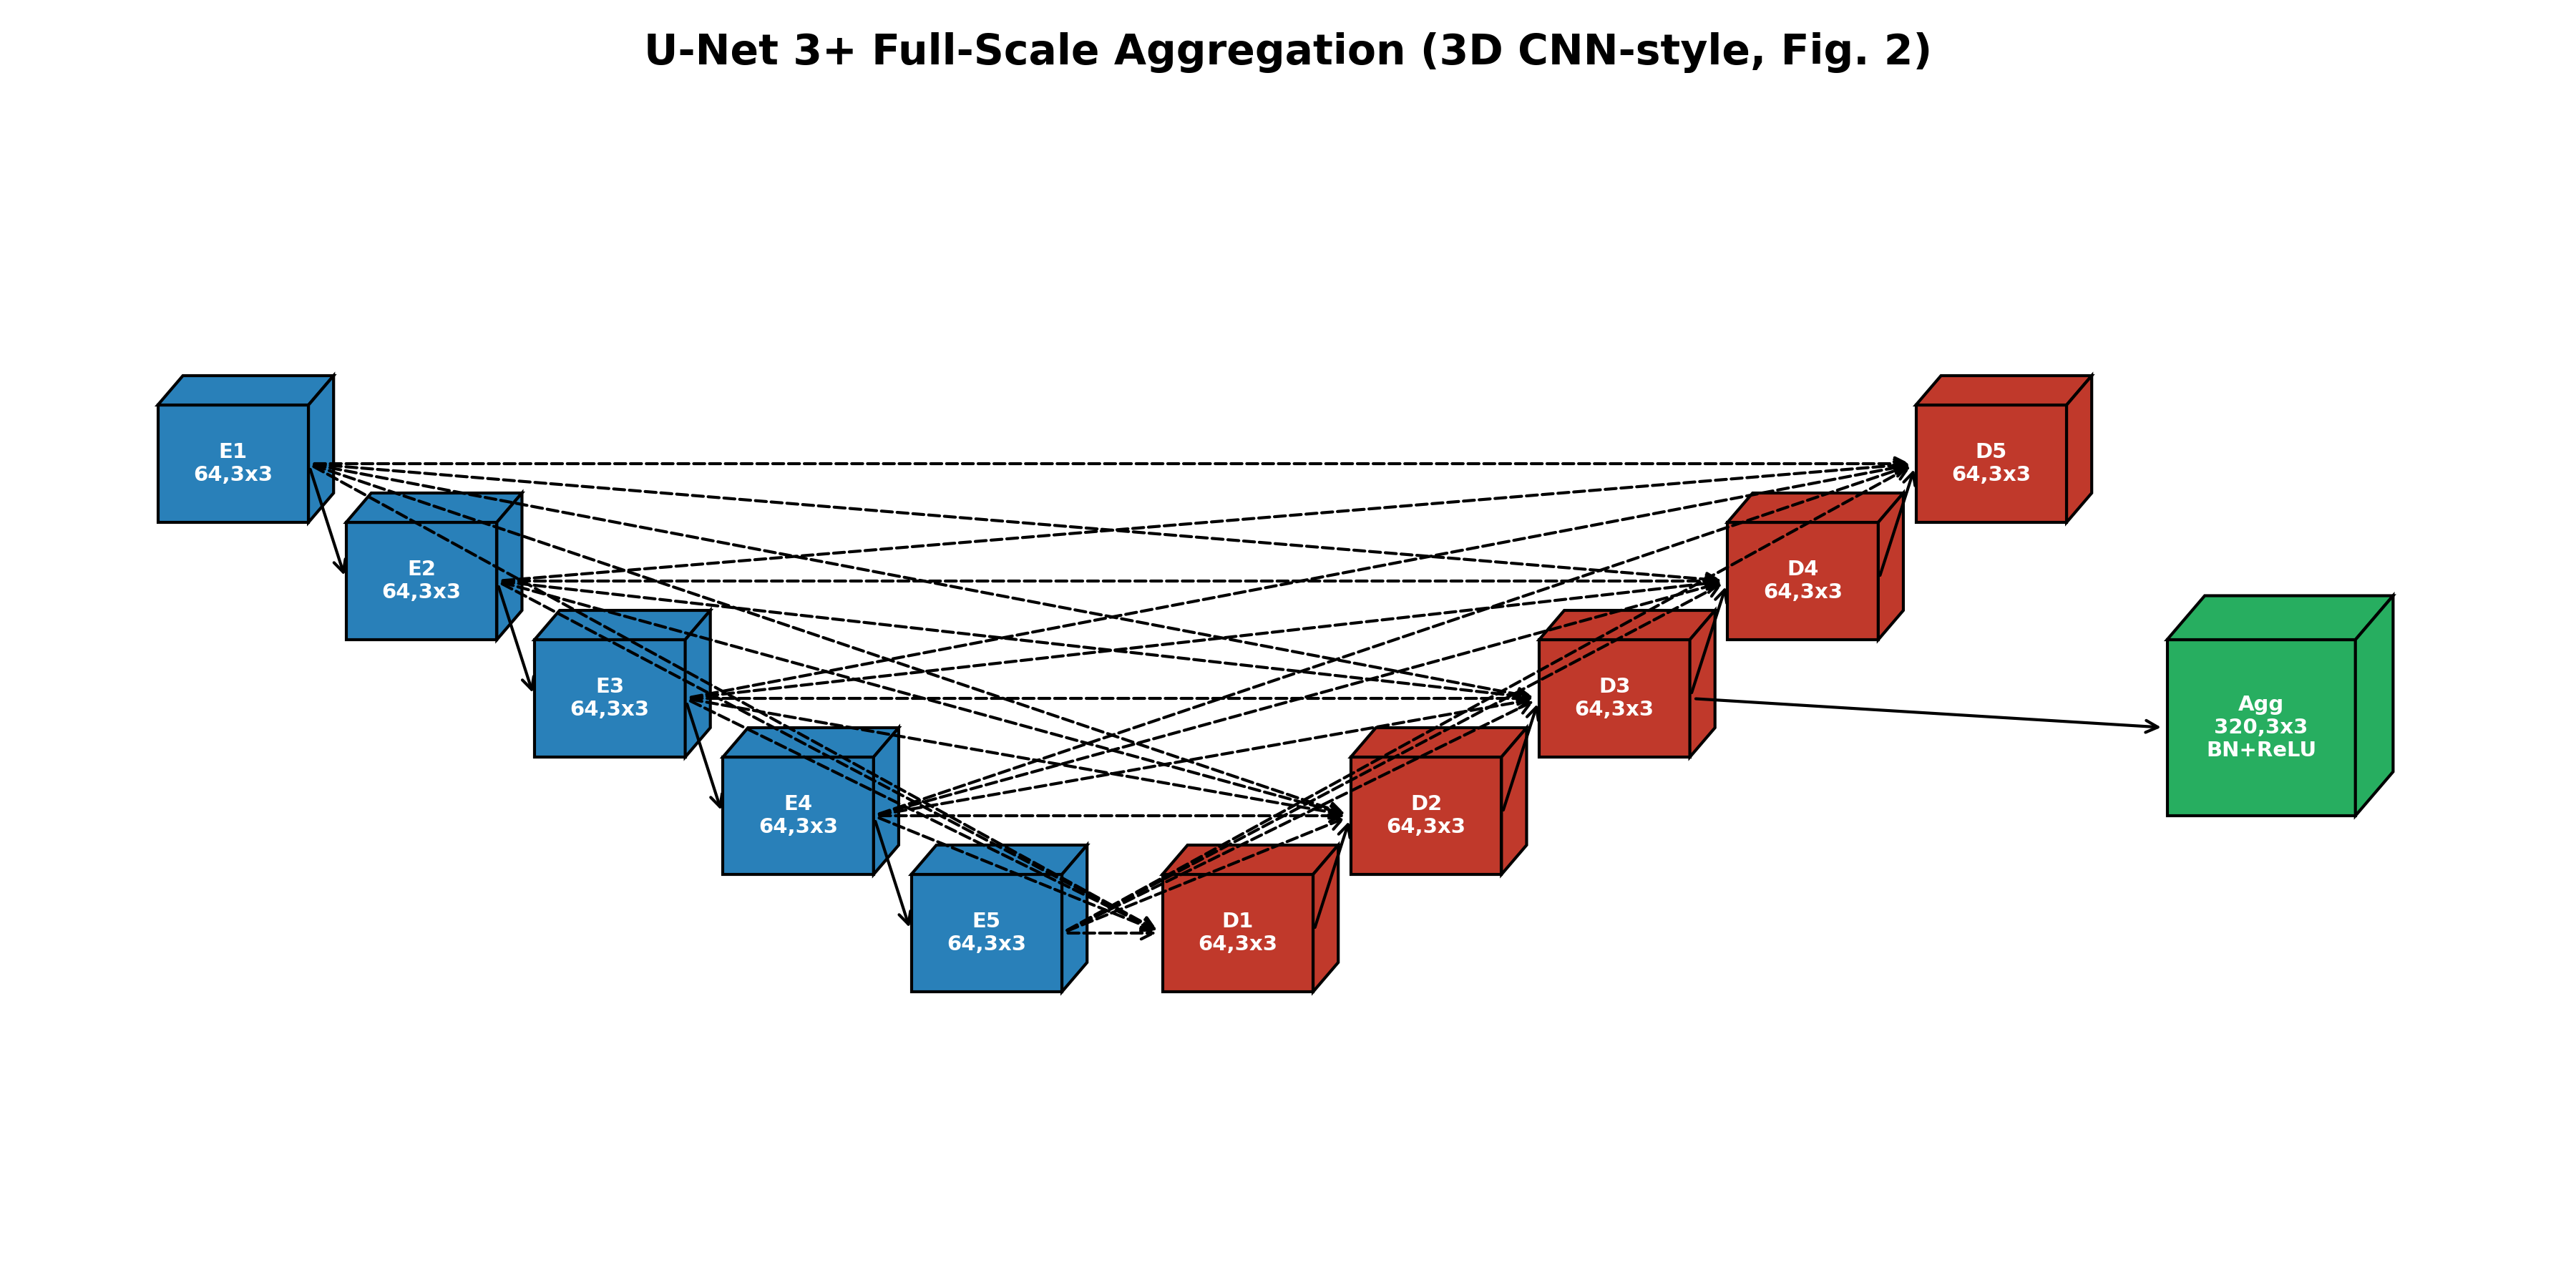


Figure 3: U-Net 3+ Classification-Guided Module (CGM)


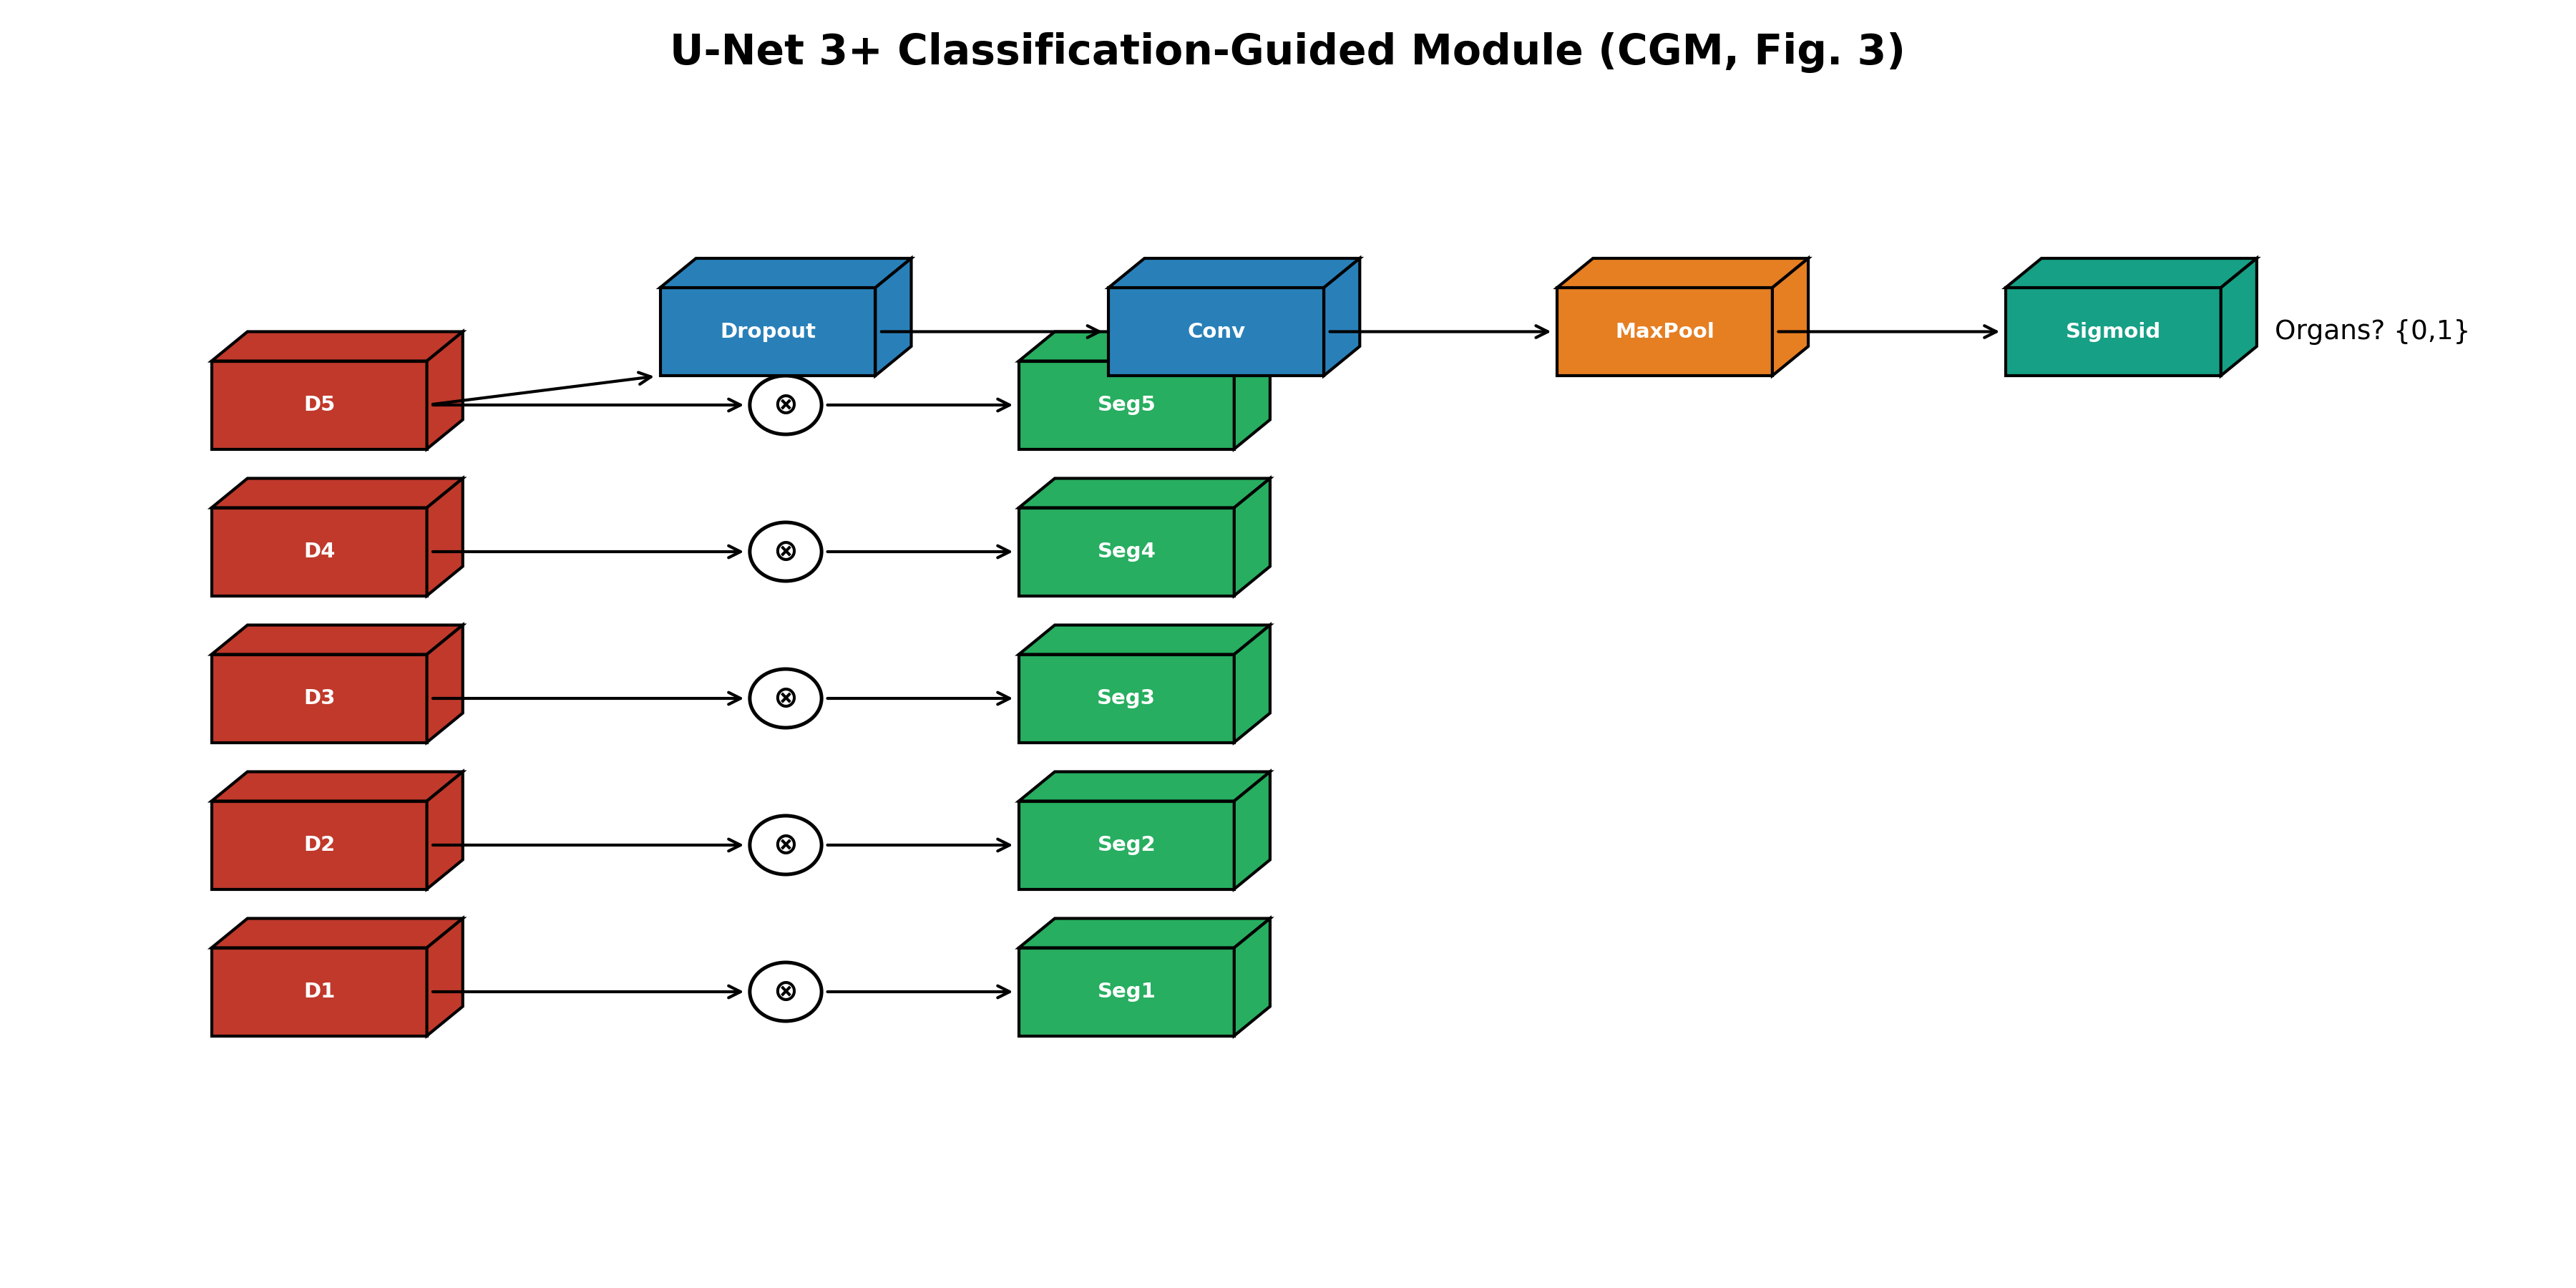

In [8]:
from IPython.display import display, Image

print("Figure 2: U-Net 3+ Full-Scale Aggregation")
display(Image("unet3p_fig2.png"))

print("\nFigure 3: U-Net 3+ Classification-Guided Module (CGM)")
display(Image("unet3p_fig3.png"))

Figure 3: U-Net 3+ Classification-Guided Module (CGM) - TractSeg Adaptation


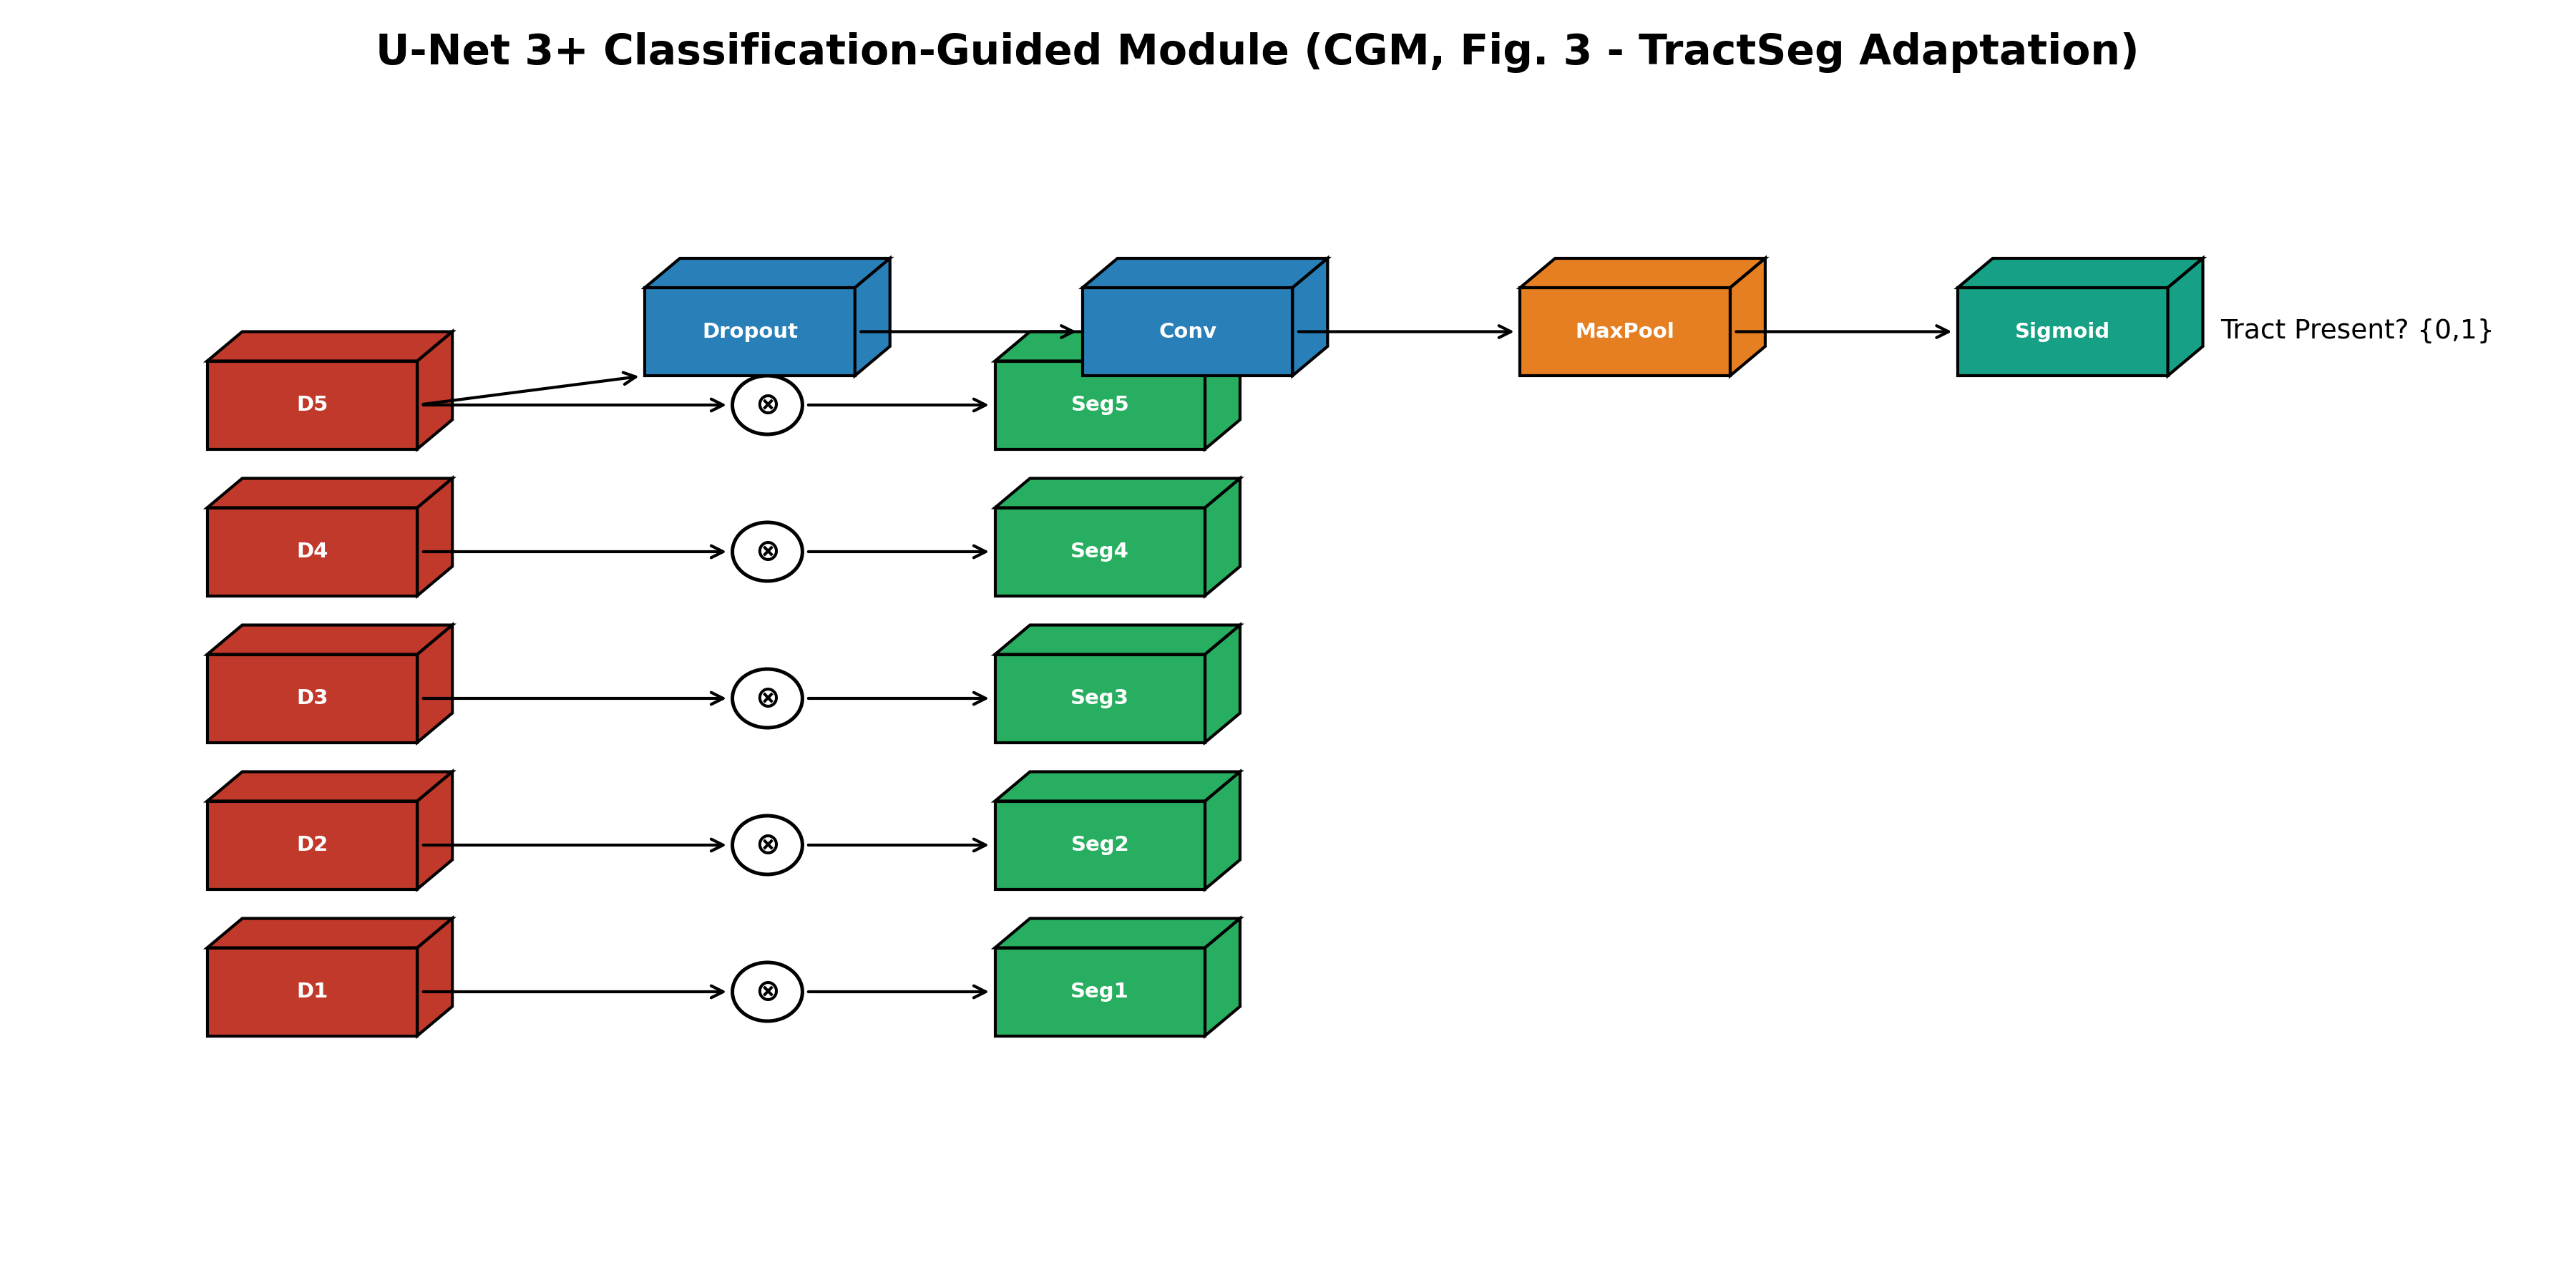

In [11]:
from IPython.display import display, Image

print("Figure 3: U-Net 3+ Classification-Guided Module (CGM) - TractSeg Adaptation")
display(Image("unet3p_fig3_tractseg.png"))

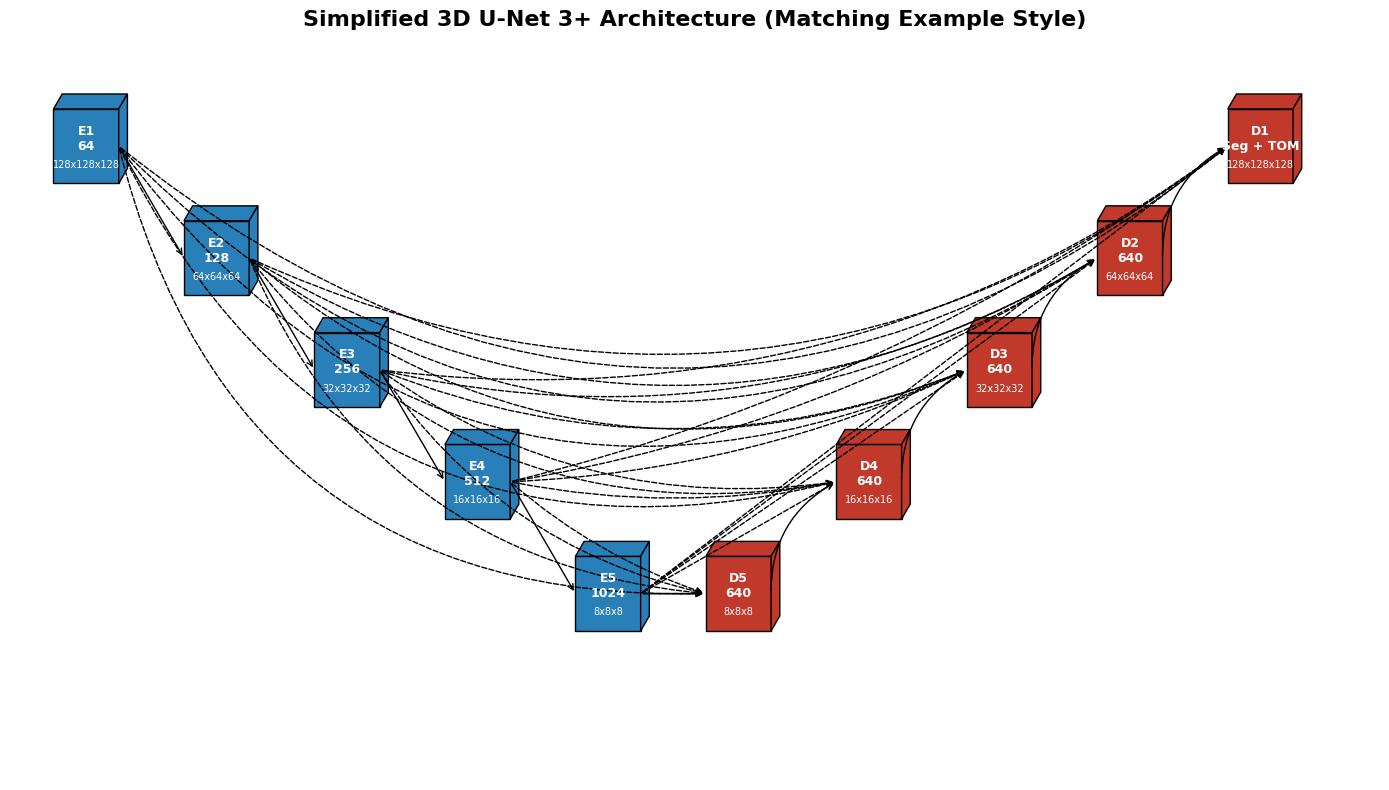

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Rectangle

# Re-define simple 3D block drawing to match the example image style more closely
def draw_example_3d_block(ax, x, y, w, h, depth=0.15, color="#1f77b4", label="", spatial_shape=""):
    # front face
    front = Rectangle((x, y), w, h, facecolor=color, edgecolor="black", lw=1)
    ax.add_patch(front)
    # top face
    ax.add_patch(plt.Polygon([[x,y+h],[x+depth,y+h+depth],[x+w+depth,y+h+depth],[x+w,y+h]],
                              closed=True, facecolor=color, edgecolor="black"))
    # side face
    ax.add_patch(plt.Polygon([[x+w,y],[x+w+depth,y+depth],[x+w+depth,y+h+depth],[x+w,y+h]],
                              closed=True, facecolor=color, edgecolor="black"))
    # label (main)
    ax.text(x+w/2, y+h/2 + h*0.1, label, ha="center", va="center", fontsize=9, color="white", weight="bold")
    # label (spatial shape)
    if spatial_shape:
         ax.text(x+w/2, y+h/2 - h*0.25, spatial_shape, ha="center", va="center", fontsize=7, color="white")


def draw_arrow(ax, start, end, connectionstyle="arc3,rad=0", linestyle="-", color="black"):
    ax.add_patch(FancyArrowPatch(start, end, arrowstyle="->",
                                 mutation_scale=10, lw=1, linestyle=linestyle, color=color,
                                 connectionstyle=connectionstyle))

fig, ax = plt.subplots(figsize=(14, 8))

# --- Encoder ---
enc_x_start = 1
enc_y_start = 6
block_w, block_h = 1.5, 1
depth_val = 0.2

# E1
e1_pos = (enc_x_start, enc_y_start)
draw_example_3d_block(ax, *e1_pos, block_w, block_h, depth=depth_val, color="#2980B9", label="E1\n64", spatial_shape="128x128x128")

# E2
e2_pos = (e1_pos[0] + block_w + 1.5, e1_pos[1] - block_h - 0.5)
draw_example_3d_block(ax, *e2_pos, block_w, block_h, depth=depth_val, color="#2980B9", label="E2\n128", spatial_shape="64x64x64")
draw_arrow(ax, (e1_pos[0] + block_w, e1_pos[1] + block_h/2), (e2_pos[0], e2_pos[1] + block_h/2)) # E1 to E2

# E3
e3_pos = (e2_pos[0] + block_w + 1.5, e2_pos[1] - block_h - 0.5)
draw_example_3d_block(ax, *e3_pos, block_w, block_h, depth=depth_val, color="#2980B9", label="E3\n256", spatial_shape="32x32x32")
draw_arrow(ax, (e2_pos[0] + block_w, e2_pos[1] + block_h/2), (e3_pos[0], e3_pos[1] + block_h/2)) # E2 to E3

# E4
e4_pos = (e3_pos[0] + block_w + 1.5, e3_pos[1] - block_h - 0.5)
draw_example_3d_block(ax, *e4_pos, block_w, block_h, depth=depth_val, color="#2980B9", label="E4\n512", spatial_shape="16x16x16")
draw_arrow(ax, (e3_pos[0] + block_w, e3_pos[1] + block_h/2), (e4_pos[0], e4_pos[1] + block_h/2)) # E3 to E4

# E5 (Bottleneck)
e5_pos = (e4_pos[0] + block_w + 1.5, e4_pos[1] - block_h - 0.5)
draw_example_3d_block(ax, *e5_pos, block_w, block_h, depth=depth_val, color="#2980B9", label="E5\n1024", spatial_shape="8x8x8")
draw_arrow(ax, (e4_pos[0] + block_w, e4_pos[1] + block_h/2), (e5_pos[0], e5_pos[1] + block_h/2)) # E4 to E5

# --- Decoder ---
dec_x_start = e5_pos[0] + block_w + 1.5
dec_y_start = e5_pos[1] # Align D5 with E5

# D5
d5_pos = (dec_x_start, e5_pos[1])
draw_example_3d_block(ax, *d5_pos, block_w, block_h, depth=depth_val, color="#C0392B", label="D5\n640", spatial_shape="8x8x8")
draw_arrow(ax, (e5_pos[0] + block_w, e5_pos[1] + block_h/2), (d5_pos[0], d5_pos[1] + block_h/2)) # E5 to D5 (Bottleneck connection)

# D4
d4_pos = (d5_pos[0] + block_w + 1.5, d5_pos[1] + block_h + 0.5)
draw_example_3d_block(ax, *d4_pos, block_w, block_h, depth=depth_val, color="#C0392B", label="D4\n640", spatial_shape="16x16x16")
draw_arrow(ax, (d5_pos[0] + block_w, d5_pos[1] + block_h/2), (d4_pos[0], d4_pos[1] + block_h/2), connectionstyle="arc3,rad=-0.3") # D5 to D4 (Upsample)

# D3
d3_pos = (d4_pos[0] + block_w + 1.5, d4_pos[1] + block_h + 0.5)
draw_example_3d_block(ax, *d3_pos, block_w, block_h, depth=depth_val, color="#C0392B", label="D3\n640", spatial_shape="32x32x32")
draw_arrow(ax, (d4_pos[0] + block_w, d4_pos[1] + block_h/2), (d3_pos[0], d3_pos[1] + block_h/2), connectionstyle="arc3,rad=-0.3") # D4 to D3 (Upsample)

# D2
d2_pos = (d3_pos[0] + block_w + 1.5, d3_pos[1] + block_h + 0.5)
draw_example_3d_block(ax, *d2_pos, block_w, block_h, depth=depth_val, color="#C0392B", label="D2\n640", spatial_shape="64x64x64")
draw_arrow(ax, (d3_pos[0] + block_w, d3_pos[1] + block_h/2), (d2_pos[0], d2_pos[1] + block_h/2), connectionstyle="arc3,rad=-0.3") # D3 to D2 (Upsample)

# D1 (Output Layer)
d1_pos = (d2_pos[0] + block_w + 1.5, d2_pos[1] + block_h + 0.5)
draw_example_3d_block(ax, *d1_pos, block_w, block_h, depth=depth_val, color="#C0392B", label="D1\nSeg + TOM", spatial_shape="128x128x128") # Final output block
draw_arrow(ax, (d2_pos[0] + block_w, d2_pos[1] + block_h/2), (d1_pos[0], d1_pos[1] + block_h/2), connectionstyle="arc3,rad=-0.3") # D2 to D1 (Upsample)

# --- Skip Connections (Full-Scale - simplified, matching example image style) ---
# The example image shows curved skip connections. Replicating that.

# E1 connections
draw_arrow(ax, (e1_pos[0] + block_w, e1_pos[1] + block_h/2), (d1_pos[0], d1_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.4")
draw_arrow(ax, (e1_pos[0] + block_w, e1_pos[1] + block_h/2), (d2_pos[0], d2_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.4")
draw_arrow(ax, (e1_pos[0] + block_w, e1_pos[1] + block_h/2), (d3_pos[0], d3_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.4")
draw_arrow(ax, (e1_pos[0] + block_w, e1_pos[1] + block_h/2), (d4_pos[0], d4_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.4")
draw_arrow(ax, (e1_pos[0] + block_w, e1_pos[1] + block_h/2), (d5_pos[0], d5_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.4")

# E2 connections
draw_arrow(ax, (e2_pos[0] + block_w, e2_pos[1] + block_h/2), (d1_pos[0], d1_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.3")
draw_arrow(ax, (e2_pos[0] + block_w, e2_pos[1] + block_h/2), (d2_pos[0], d2_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.3")
draw_arrow(ax, (e2_pos[0] + block_w, e2_pos[1] + block_h/2), (d3_pos[0], d3_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.3")
draw_arrow(ax, (e2_pos[0] + block_w, e2_pos[1] + block_h/2), (d4_pos[0], d4_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.3")
draw_arrow(ax, (e2_pos[0] + block_w, e2_pos[1] + block_h/2), (d5_pos[0], d5_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.3")

# E3 connections
draw_arrow(ax, (e3_pos[0] + block_w, e3_pos[1] + block_h/2), (d1_pos[0], d1_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.2")
draw_arrow(ax, (e3_pos[0] + block_w, e3_pos[1] + block_h/2), (d2_pos[0], d2_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.2")
draw_arrow(ax, (e3_pos[0] + block_w, e3_pos[1] + block_h/2), (d3_pos[0], d3_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.2")
draw_arrow(ax, (e3_pos[0] + block_w, e3_pos[1] + block_h/2), (d4_pos[0], d4_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.2")
draw_arrow(ax, (e3_pos[0] + block_w, e3_pos[1] + block_h/2), (d5_pos[0], d5_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.2")

# E4 connections
draw_arrow(ax, (e4_pos[0] + block_w, e4_pos[1] + block_h/2), (d1_pos[0], d1_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.1")
draw_arrow(ax, (e4_pos[0] + block_w, e4_pos[1] + block_h/2), (d2_pos[0], d2_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.1")
draw_arrow(ax, (e4_pos[0] + block_w, e4_pos[1] + block_h/2), (d3_pos[0], d3_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.1")
draw_arrow(ax, (e4_pos[0] + block_w, e4_pos[1] + block_h/2), (d4_pos[0], d4_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.1")
draw_arrow(ax, (e4_pos[0] + block_w, e4_pos[1] + block_h/2), (d5_pos[0], d5_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0.1")

# E5 connections (straight dashed)
draw_arrow(ax, (e5_pos[0] + block_w, e5_pos[1] + block_h/2), (d1_pos[0], d1_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0")
draw_arrow(ax, (e5_pos[0] + block_w, e5_pos[1] + block_h/2), (d2_pos[0], d2_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0")
draw_arrow(ax, (e5_pos[0] + block_w, e5_pos[1] + block_h/2), (d3_pos[0], d3_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0")
draw_arrow(ax, (e5_pos[0] + block_w, e5_pos[1] + block_h/2), (d4_pos[0], d4_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0")
draw_arrow(ax, (e5_pos[0] + block_w, e5_pos[1] + block_h/2), (d5_pos[0], d5_pos[1] + block_h/2), linestyle="--", connectionstyle="arc3,rad=0")


ax.set_xlim(0, d1_pos[0] + block_w + 2)
ax.set_ylim(e5_pos[1] - 2, e1_pos[1] + block_h + 1)
ax.axis("off")
plt.title("Simplified 3D U-Net 3+ Architecture (Matching Example Style)", fontsize=16, weight="bold")
plt.tight_layout()
plt.savefig("unet3p_example_diagram.png", dpi=300)
plt.show()

**Reasoning**:
Generate code to create a simplified diagram of the Classification-Guided Module (Figure 3) in the style of the previously generated simplified U-Net diagram.

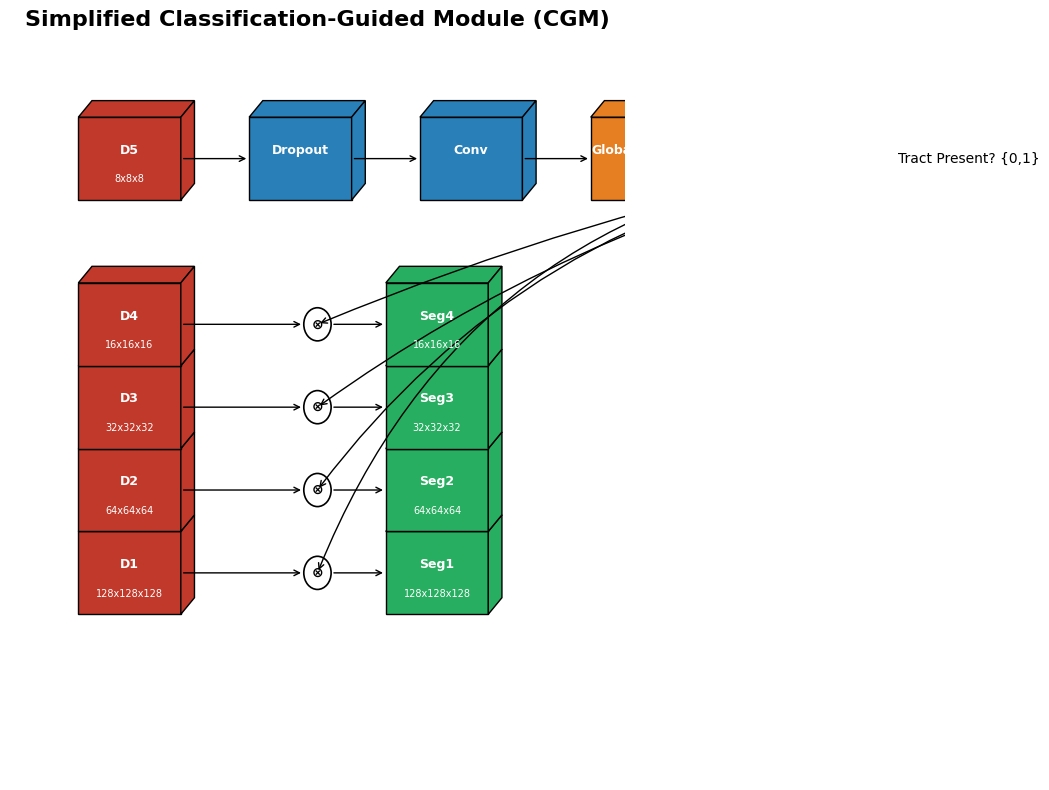

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Rectangle, Circle

# Reuse the simple 3D block drawing function from the previous diagram
def draw_simple_3d_block(ax, x, y, w, h, depth=0.15, color="#1f77b4", label="", spatial_shape=""):
    # front face
    front = Rectangle((x, y), w, h, facecolor=color, edgecolor="black", lw=1)
    ax.add_patch(front)
    # top face
    ax.add_patch(plt.Polygon([[x,y+h],[x+depth,y+h+depth],[x+w+depth,y+h+depth],[x+w,y+h]],
                              closed=True, facecolor=color, edgecolor="black"))
    # side face
    ax.add_patch(plt.Polygon([[x+w,y],[x+w+depth,y+depth],[x+w+depth,y+h+depth],[x+w,y+h]],
                              closed=True, facecolor=color, edgecolor="black"))
    # label (main)
    ax.text(x+w/2, y+h/2 + h*0.1, label, ha="center", va="center", fontsize=9, color="white", weight="bold")
    # label (spatial shape)
    if spatial_shape:
         ax.text(x+w/2, y+h/2 - h*0.25, spatial_shape, ha="center", va="center", fontsize=7, color="white")

# Reuse the arrow drawing function
def draw_arrow(ax, start, end, connectionstyle="arc3,rad=0", linestyle="-", color="black"):
    ax.add_patch(FancyArrowPatch(start, end, arrowstyle="->",
                                 mutation_scale=10, lw=1, linestyle=linestyle, color=color,
                                 connectionstyle=connectionstyle))

# Reuse the gate drawing function
def draw_gate(ax, x, y):
    circ = Circle((x,y), 0.2, facecolor="white", edgecolor="black", lw=1.2)
    ax.add_patch(circ)
    ax.text(x, y, "⊗", ha="center", va="center", fontsize=10, weight="bold")


fig, ax = plt.subplots(figsize=(12, 8))

# --- Classification-Guided Module (CGM) - Simplified ---
# Based on Figure 3, adapted for the simplified 3D block style

block_w, block_h = 1.5, 1
depth_val = 0.2
start_x = 1
start_y = 5 # Starting high for the D5 input

# Input from D5 (deepest decoder)
d5_input_pos = (start_x, start_y)
draw_simple_3d_block(ax, *d5_input_pos, block_w, block_h, depth=depth_val, color="#C0392B", label="D5", spatial_shape="8x8x8")

# CGM Branch (from D5)
cgm_dropout_pos = (d5_input_pos[0] + block_w + 1, start_y + block_h/2 - 0.5) # Slightly offset down
draw_arrow(ax, (d5_input_pos[0] + block_w, d5_input_pos[1] + block_h/2), (cgm_dropout_pos[0], cgm_dropout_pos[1] + 0.5))
draw_simple_3d_block(ax, *cgm_dropout_pos, block_w, block_h, depth=depth_val, color="#2980B9", label="Dropout")

cgm_conv_pos = (cgm_dropout_pos[0] + block_w + 1, cgm_dropout_pos[1])
draw_arrow(ax, (cgm_dropout_pos[0] + block_w, cgm_dropout_pos[1] + block_h/2), (cgm_conv_pos[0], cgm_conv_pos[1] + block_h/2))
draw_simple_3d_block(ax, *cgm_conv_pos, block_w, block_h, depth=depth_val, color="#2980B9", label="Conv")

cgm_pool_pos = (cgm_conv_pos[0] + block_w + 1, cgm_conv_pos[1])
draw_arrow(ax, (cgm_conv_pos[0] + block_w, cgm_conv_pos[1] + block_h/2), (cgm_pool_pos[0], cgm_pool_pos[1] + block_h/2))
draw_simple_3d_block(ax, *cgm_pool_pos, block_w, block_h, depth=depth_val, color="#E67E22", label="GlobalAvgPool") # Changed from MaxPool to GlobalAvgPool

cgm_sigmoid_pos = (cgm_pool_pos[0] + block_w + 1, cgm_pool_pos[1])
draw_arrow(ax, (cgm_pool_pos[0] + block_w, cgm_pool_pos[1] + block_h/2), (cgm_sigmoid_pos[0], cgm_sigmoid_pos[1] + block_h/2))
draw_simple_3d_block(ax, *cgm_sigmoid_pos, block_w, block_h, depth=depth_val, color="#16A085", label="Sigmoid")

# Classification output label
ax.text(cgm_sigmoid_pos[0] + block_w + 0.5, cgm_sigmoid_pos[1] + block_h/2, "Tract Present? {0,1}", fontsize=10, va="center")


# Segmentation Gating Branch (from various decoder levels)
seg_gate_y_start = d5_input_pos[1] - block_h - 1 # Start below D5 input
decoder_levels_y = [seg_gate_y_start, seg_gate_y_start - 1, seg_gate_y_start - 2, seg_gate_y_start - 3, seg_gate_y_start - 4]
decoder_levels_labels = ["D4", "D3", "D2", "D1"] # Corresponding decoder levels for gating (D1-D4 gated with D5)
decoder_levels_spatial = ["16x16x16", "32x32x32", "64x64x64", "128x128x128"]


# Input from other decoder levels (D1 to D4)
# D1 input
d1_input_pos = (start_x, decoder_levels_y[3])
draw_simple_3d_block(ax, *d1_input_pos, block_w, block_h, depth=depth_val, color="#C0392B", label="D1", spatial_shape="128x128x128")

# D2 input
d2_input_pos = (start_x, decoder_levels_y[2])
draw_simple_3d_block(ax, *d2_input_pos, block_w, block_h, depth=depth_val, color="#C0392B", label="D2", spatial_shape="64x64x64")

# D3 input
d3_input_pos = (start_x, decoder_levels_y[1])
draw_simple_3d_block(ax, *d3_input_pos, block_w, block_h, depth=depth_val, color="#C0392B", label="D3", spatial_shape="32x32x32")

# D4 input
d4_input_pos = (start_x, decoder_levels_y[0])
draw_simple_3d_block(ax, *d4_input_pos, block_w, block_h, depth=depth_val, color="#C0392B", label="D4", spatial_shape="16x16x16")

# --- Gating and Segmentation Outputs ---
gate_x = d1_input_pos[0] + block_w + 2 # X position for the gate symbol

# Gating and Seg output for D1
draw_arrow(ax, (d1_input_pos[0] + block_w, d1_input_pos[1] + block_h/2), (gate_x - 0.2, d1_input_pos[1] + block_h/2)) # Arrow to gate
draw_gate(ax, gate_x, d1_input_pos[1] + block_h/2) # Gate symbol
draw_arrow(ax, (gate_x + 0.2, d1_input_pos[1] + block_h/2), (gate_x + 1, d1_input_pos[1] + block_h/2)) # Arrow from gate
draw_simple_3d_block(ax, gate_x + 1, d1_input_pos[1], block_w, block_h, depth=depth_val, color="#27AE60", label="Seg1", spatial_shape="128x128x128") # Seg1 output

# Gating and Seg output for D2
draw_arrow(ax, (d2_input_pos[0] + block_w, d2_input_pos[1] + block_h/2), (gate_x - 0.2, d2_input_pos[1] + block_h/2)) # Arrow to gate
draw_gate(ax, gate_x, d2_input_pos[1] + block_h/2) # Gate symbol
draw_arrow(ax, (gate_x + 0.2, d2_input_pos[1] + block_h/2), (gate_x + 1, d2_input_pos[1] + block_h/2)) # Arrow from gate
draw_simple_3d_block(ax, gate_x + 1, d2_input_pos[1], block_w, block_h, depth=depth_val, color="#27AE60", label="Seg2", spatial_shape="64x64x64") # Seg2 output

# Gating and Seg output for D3
draw_arrow(ax, (d3_input_pos[0] + block_w, d3_input_pos[1] + block_h/2), (gate_x - 0.2, d3_input_pos[1] + block_h/2)) # Arrow to gate
draw_gate(ax, gate_x, d3_input_pos[1] + block_h/2) # Gate symbol
draw_arrow(ax, (gate_x + 0.2, d3_input_pos[1] + block_h/2), (gate_x + 1, d3_input_pos[1] + block_h/2)) # Arrow from gate
draw_simple_3d_block(ax, gate_x + 1, d3_input_pos[1], block_w, block_h, depth=depth_val, color="#27AE60", label="Seg3", spatial_shape="32x32x32") # Seg3 output

# Gating and Seg output for D4
draw_arrow(ax, (d4_input_pos[0] + block_w, d4_input_pos[1] + block_h/2), (gate_x - 0.2, d4_input_pos[1] + block_h/2)) # Arrow to gate
draw_gate(ax, gate_x, d4_input_pos[1] + block_h/2) # Gate symbol
draw_arrow(ax, (gate_x + 0.2, d4_input_pos[1] + block_h/2), (gate_x + 1, d4_input_pos[1] + block_h/2)) # Arrow from gate
draw_simple_3d_block(ax, gate_x + 1, d4_input_pos[1], block_w, block_h, depth=depth_val, color="#27AE60", label="Seg4", spatial_shape="16x16x16") # Seg4 output

# Connection from Sigmoid output to all Gates
sigmoid_output_center_y = cgm_sigmoid_pos[1] + block_h/2
gate_x_center = gate_x

draw_arrow(ax, (cgm_sigmoid_pos[0] + block_w, sigmoid_output_center_y), (gate_x_center, d1_input_pos[1] + block_h/2), connectionstyle="arc3,rad=0.3")
draw_arrow(ax, (cgm_sigmoid_pos[0] + block_w, sigmoid_output_center_y), (gate_x_center, d2_input_pos[1] + block_h/2), connectionstyle="arc3,rad=0.2")
draw_arrow(ax, (cgm_sigmoid_pos[0] + block_w, sigmoid_output_center_y), (gate_x_center, d3_input_pos[1] + block_h/2), connectionstyle="arc3,rad=0.1")
draw_arrow(ax, (cgm_sigmoid_pos[0] + block_w, sigmoid_output_center_y), (gate_x_center, d4_input_pos[1] + block_h/2), connectionstyle="arc3,rad=0.05")


ax.set_xlim(0, gate_x + block_w + 3)
ax.set_ylim(decoder_levels_y[-1] - 1, start_y + block_h + 1)
ax.axis("off")
plt.title("Simplified Classification-Guided Module (CGM)", fontsize=16, weight="bold")
plt.tight_layout()
plt.savefig("cgm_simplified_diagram.png", dpi=300)
plt.show()

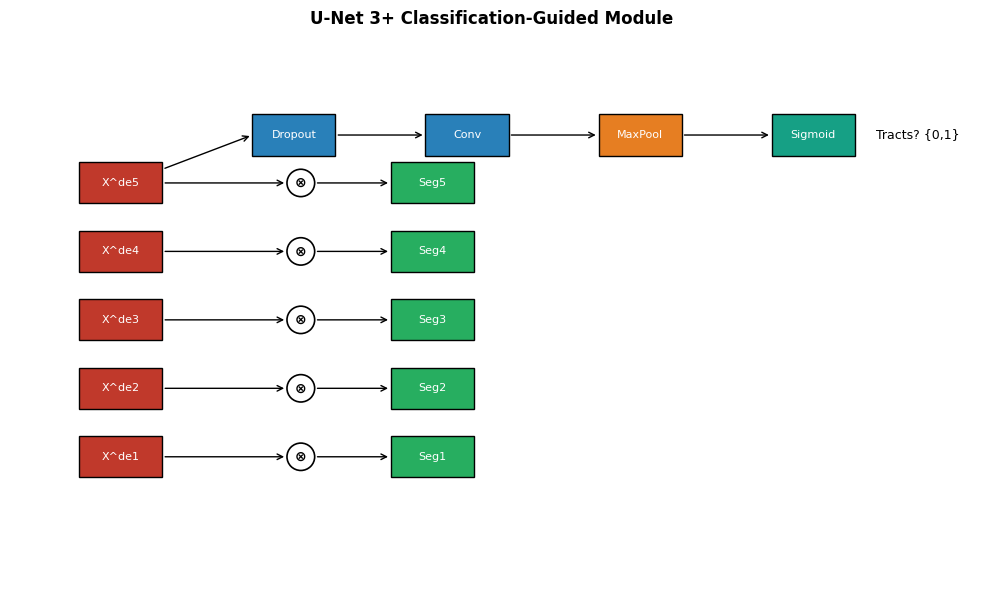

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch, Circle

def draw_block(ax, x, y, w, h, text, color="#3498db"):
    rect = Rectangle((x, y), w, h, facecolor=color, edgecolor="black", lw=1)
    ax.add_patch(rect)
    ax.text(x+w/2, y+h/2, text, ha="center", va="center", fontsize=8, wrap=True, color="white")

def draw_arrow(ax, start, end, style="-"):
    ax.add_patch(FancyArrowPatch(start, end, arrowstyle="->",
                                 mutation_scale=10, lw=1, linestyle=style))

def draw_gate(ax, x, y):
    circ = Circle((x,y), 0.2, facecolor="white", edgecolor="black", lw=1.2)
    ax.add_patch(circ)
    ax.text(x, y, "⊗", ha="center", va="center", fontsize=10, weight="bold")

fig, ax = plt.subplots(figsize=(10,6))

# Decoder outputs (left)
for i in range(5):
    y = 0.5 + i
    draw_block(ax, 0, y, 1.2, 0.6, f"X^de{i+1}", "#c0392b")
    draw_arrow(ax, (1.2,y+0.3), (3,y+0.3))
    draw_gate(ax, 3.2, y+0.3)
    draw_arrow(ax, (3.4,y+0.3), (4.5,y+0.3))
    draw_block(ax, 4.5, y, 1.2, 0.6, f"Seg{i+1}", "#27ae60")

# Classification branch (top path)
draw_arrow(ax, (1.2, 5), (2.5, 5.5))
draw_block(ax, 2.5, 5.2, 1.2, 0.6, "Dropout", "#2980b9")
draw_arrow(ax, (3.7,5.5), (5,5.5))
draw_block(ax, 5, 5.2, 1.2, 0.6, "Conv", "#2980b9")
draw_arrow(ax, (6.2,5.5), (7.5,5.5))
draw_block(ax, 7.5, 5.2, 1.2, 0.6, "MaxPool", "#e67e22")
draw_arrow(ax, (8.7,5.5), (10,5.5))
draw_block(ax, 10, 5.2, 1.2, 0.6, "Sigmoid", "#16a085")
ax.text(11.5, 5.5, "Tracts? {0,1}", fontsize=9, va="center")

ax.set_xlim(-1,13)
ax.set_ylim(-1,7)
ax.axis("off")
plt.title("U-Net 3+ Classification-Guided Module ", fontsize=12, weight="bold")
plt.tight_layout()
plt.savefig("unet3p_fig3.png", dpi=300)
plt.show()


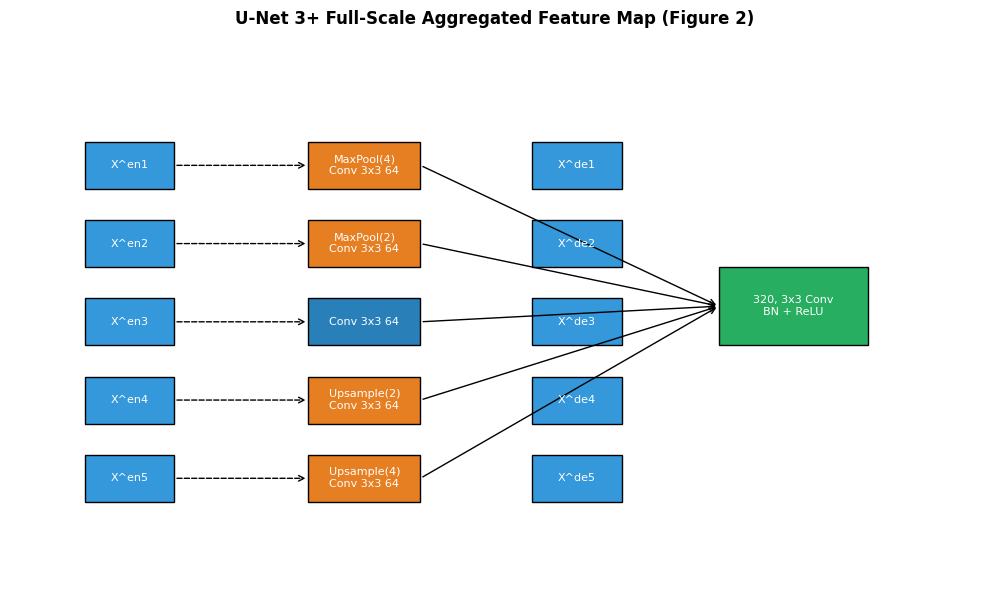

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

def draw_block(ax, x, y, w, h, text, color="#3498db"):
    rect = Rectangle((x, y), w, h, facecolor=color, edgecolor="black", lw=1)
    ax.add_patch(rect)
    ax.text(x+w/2, y+h/2, text, ha="center", va="center", fontsize=8, wrap=True, color="white")

def draw_arrow(ax, start, end, style="-"):
    ax.add_patch(FancyArrowPatch(start, end, arrowstyle="->",
                                 mutation_scale=10, lw=1, linestyle=style))

fig, ax = plt.subplots(figsize=(10,6))

# Encoder blocks (left side)
draw_block(ax, 0, 4, 1.2, 0.6, "X^en1")
draw_block(ax, 0, 3, 1.2, 0.6, "X^en2")
draw_block(ax, 0, 2, 1.2, 0.6, "X^en3")
draw_block(ax, 0, 1, 1.2, 0.6, "X^en4")
draw_block(ax, 0, 0, 1.2, 0.6, "X^en5")

# Decoder blocks (right side)
draw_block(ax, 6, 4, 1.2, 0.6, "X^de1")
draw_block(ax, 6, 3, 1.2, 0.6, "X^de2")
draw_block(ax, 6, 2, 1.2, 0.6, "X^de3")
draw_block(ax, 6, 1, 1.2, 0.6, "X^de4")
draw_block(ax, 6, 0, 1.2, 0.6, "X^de5")

# Operations in the middle (Pooling/Upsample/Conv)
draw_block(ax, 3, 4, 1.5, 0.6, "MaxPool(4)\nConv 3x3 64", "#e67e22")
draw_block(ax, 3, 3, 1.5, 0.6, "MaxPool(2)\nConv 3x3 64", "#e67e22")
draw_block(ax, 3, 2, 1.5, 0.6, "Conv 3x3 64", "#2980b9")
draw_block(ax, 3, 1, 1.5, 0.6, "Upsample(2)\nConv 3x3 64", "#e67e22")
draw_block(ax, 3, 0, 1.5, 0.6, "Upsample(4)\nConv 3x3 64", "#e67e22")

# Aggregation block
draw_block(ax, 8.5, 2, 2, 1, "320, 3x3 Conv\nBN + ReLU", "#27ae60")

# Arrows: encoder → ops → aggregation
for i in range(5):
    draw_arrow(ax, (1.2, 4-i+0.3), (3, 4-i+0.3), "--")
    draw_arrow(ax, (4.5, 4-i+0.3), (8.5, 2.5))

ax.set_xlim(-1, 12)
ax.set_ylim(-1, 6)
ax.axis("off")
plt.title("U-Net 3+ Full-Scale Aggregated Feature Map (Figure 2)", fontsize=12, weight="bold")
plt.tight_layout()
plt.savefig("unet3p_fig2.png", dpi=300)
plt.show()


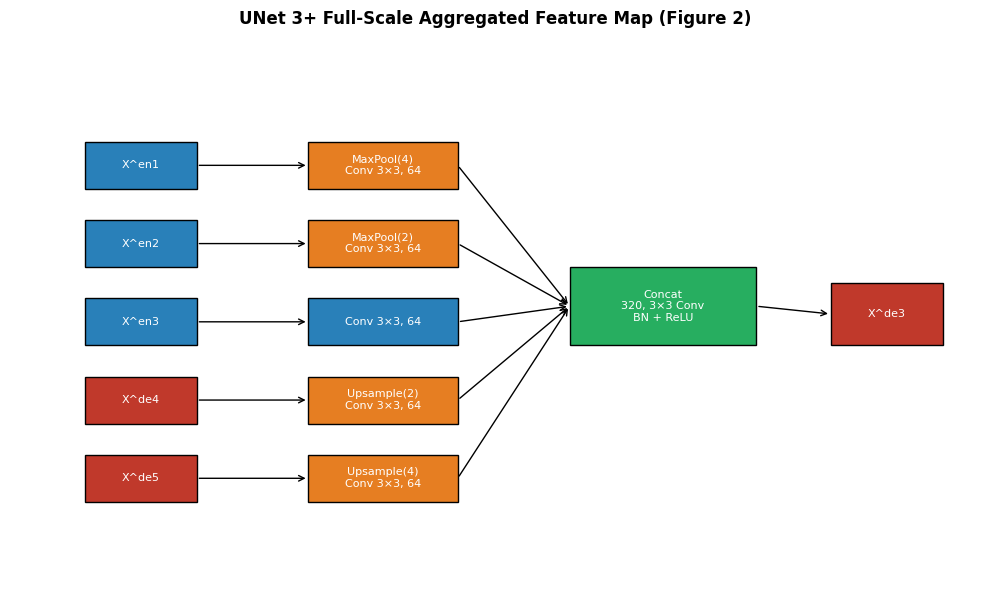

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

def draw_block(ax, x, y, w, h, text, color="#3498db"):
    rect = Rectangle((x, y), w, h, facecolor=color, edgecolor="black", lw=1)
    ax.add_patch(rect)
    ax.text(x+w/2, y+h/2, text, ha="center", va="center", fontsize=8, wrap=True, color="white")

def draw_arrow(ax, start, end, style="-"):
    ax.add_patch(FancyArrowPatch(start, end, arrowstyle="->",
                                 mutation_scale=10, lw=1, linestyle=style))

fig, ax = plt.subplots(figsize=(10,6))

# Encoder inputs
draw_block(ax, 0, 4, 1.5, 0.6, "X^en1", "#2980b9")
draw_block(ax, 0, 3, 1.5, 0.6, "X^en2", "#2980b9")
draw_block(ax, 0, 2, 1.5, 0.6, "X^en3", "#2980b9")

# Decoder inputs
draw_block(ax, 0, 1, 1.5, 0.6, "X^de4", "#c0392b")
draw_block(ax, 0, 0, 1.5, 0.6, "X^de5", "#c0392b")

# Operations
draw_block(ax, 3, 4, 2, 0.6, "MaxPool(4)\nConv 3×3, 64", "#e67e22")
draw_block(ax, 3, 3, 2, 0.6, "MaxPool(2)\nConv 3×3, 64", "#e67e22")
draw_block(ax, 3, 2, 2, 0.6, "Conv 3×3, 64", "#2980b9")
draw_block(ax, 3, 1, 2, 0.6, "Upsample(2)\nConv 3×3, 64", "#e67e22")
draw_block(ax, 3, 0, 2, 0.6, "Upsample(4)\nConv 3×3, 64", "#e67e22")

# Aggregation
draw_block(ax, 6.5, 2, 2.5, 1, "Concat\n320, 3×3 Conv\nBN + ReLU", "#27ae60")

# Output
draw_block(ax, 10, 2, 1.5, 0.8, "X^de3", "#c0392b")

# Arrows from encoder to ops
draw_arrow(ax, (1.5,4.3),(3,4.3))
draw_arrow(ax, (1.5,3.3),(3,3.3))
draw_arrow(ax, (1.5,2.3),(3,2.3))
draw_arrow(ax, (1.5,1.3),(3,1.3))
draw_arrow(ax, (1.5,0.3),(3,0.3))

# Arrows from ops to concat
for i in range(5):
    draw_arrow(ax, (5,4-i+0.3),(6.5,2.5))

# Arrow from concat to output
draw_arrow(ax, (9,2.5),(10,2.4))

ax.set_xlim(-1,12)
ax.set_ylim(-1,6)
ax.axis("off")
plt.title("UNet 3+ Full-Scale Aggregated Feature Map (Figure 2)", fontsize=12, weight="bold")
plt.tight_layout()
plt.savefig("unet3p_fig2_fixed.png", dpi=300)
plt.show()
